# инструкция

* предлагается сразу разобраться с функционалом сохранить/открыть консультацию (после того, как запущены все необходимые ячейки , включая запуск интерфейса диалога).
попробовать выполнить пару запросов, сохранить, обнулить диалог и загрузить, чтобы убедиться, что можно продолжить работу в любой момент. задать имя файла (под надписью операции с файлом) для возможности сохранять диалог и продолжать от последнего шага. консультация сохраняется в несколько структур (датасет question_dataset сокращенной истории диалога- хранит все сообщения с отправителем, получателем, а так же ценами запросов, входными и выходными токенами;  json_FAQ вопросы нейроконсультанта/ответы клиента; json_plan план проекта(актуализируемый на каждом шаге); norjson_code текст кода питон; json_newquestions последние вопросы нейроконсультанта(если есть); - все это сохраняется и открывается через файл pkl. при запросе консультанту передается специальная склейка необходимых полей датасета для всех рядов.все это можно в любой момент посмотреть штатными средствами обращения к пандас датафрейму question_dataset.

* для работы надо запустить все ячейки(опуская отмеченные необязательными) до интерфейса диалога включительно. запуск initdialinterface() показывает окно с кнопками и полем ввода текста. после однократного запуска интерфейс активен всегда, и ничего не ломается , если его перезапускать.
* если кнопки поломались, пропали или стали странно себя вести, что может быть после отключения сеанса или после изменения кода, то помимо изменившихся ячеек надо перезапустить 4 интерфейсные ячейки:
-Определения виджетов интерфейса
-Рабочие функции интерфейса
-Обработчики событий элементов интерфейса
-запуск интерфейса диалога


*   логика виджетов работает в ждущем режиме. после срабатывания реакции на кнопку, система опять готова к нажатию кнопки или запуску любой другой ячейки колаба,в т.ч. ,например, можно посмотреть состояние глобальных переменных.

*   логика диалога реализована так: одна отправка запроса пользователя  передается менеджеру проекта, который составляет и корректирует план проекта json_plan и выбирает профильного агента для обработки запроса пользователя, далее вызов агента с передачей ему задания, далее возврат результатов клиенту. после выдачи ответа клиенту колаб доступен для любых обычных действий, таких как запуск любых ячеек и просмотр любых переменных. кнопки ожидают нажатий для следующей передачи запроса клиента.

* для отображения информации предусмотрено верхнее окно(вся история диалога или только последнее сообщение) с возможностью фильтрации контента;нижнее окно -для вывода последней версии кода или плана - переключение между кодом и планом кнопкой.

* для ввода сообщения пользователя - 2 маленьких окна в середине, высота регулируется мышью.верхнее из двух - штатный ввод сообщения клиента, нижнее из двух - только для ввода ошибки запуска кода.
* при заполнении окна ошибкой кода - система переходит врежим отладки (агент debug muster), при котором сохраняется вся история кода и ошибок до момента, пока клиент оставит окно ошибки пустым при очередной отправке запроса консультанту - если это произошло непосредственно после серии ввода ошибок в соответствующее окно - то вся серия модификаций передается агенту автору начального ошибочного кода, который должен продолжить работу с учетом найденного варианта исправить ошибку, если такой вариант найден. на текущий момент debug muster формирует запрос в интернет, который перед следующим циклом ввода ошибки отрабатывается интернетсюрфером tavily (на сайте TAVILY надо получить бесплатный апи ключ и добавить в секреты колаба, чтобы это работало). debug muster, если не может исправить ошибку, начинает зацикливаться - чередовать ошибочные ответы, которые ранее уже предлагал. я пока не вылечил эту проблему.

*   для защиты от случайной отправки запроса сделан чекбокс,
(для стремных операций тоже используется чекбокс) для дополнительно подтверждения своего намерения.
все подобные операции помечены звездочкой и требуют установки чекбокса для выполнения.

* можно сохранить диалог в файл и позже загрузить его в/из файла pkl, находящегося в текущей папке или на локальном компьютере.  (кнопка для загрузки из текущей папки находится под кнопкой "сохранить", внешний вид ее не настраивается, поэтому может путать пользователя).

* если консультант задал вопросы, то эти вопросы автоматически размещаются под основными окнами в виде раскрывающихся длинных окошек. примеры ответов на вопросы уже заполнены системой,
можно их отредактировать. при очередном запросе эти ответы сохранятся в специальную структуру json_FAQ.

*   обнулить диалог - это обнулить весь датасет и можно начать консультацию с нуля.

*   нотбук работает и в колабе, и в VSCode.

* .

In [1]:
#@title только VSCode под windows
# %pip install -U ipywidgets jupyter
# %pip install ipyfilechooser
# для виджетов в VSCode в терминале выполнить
# jupyter nbextension install --py widgetsnbextension --sys-prefix
# jupyter nbextension enable --py widgetsnbextension --sys-prefix

# решение проблемы с сертификатами openai
# conda activate env3114
# conda update python
# pip install --upgrade httpx certifi openai
# %pip install -U ipywidgets==7.7.1
# %pip install debugpy


# pip install

In [2]:
# чтобы создавать изолированные виртуальные окружения в колабе для запуска кода==1.40.0
import os
if 'COLAB_GPU' in os.environ:
    pass
    !sudo apt update
    !sudo apt install -y python3-venv
    !pip install --upgrade pip
    !pip install virtualenv

    %pip install -q ipywidgets ipyfilechooser nest_asyncio faiss-cpu==1.7.4 langchain==0.1.7 openai pydantic==2.9.2 tiktoken==0.6.0 langchain_community langchain-openai
    !pip install -U openai

    %pip install -q python-Levenshtein
    %pip install tavily-python
    %pip install duckduckgo_search
    %pip install pyperclip
    %pip install markdown
else:
    pass
    # import debugpy

    # debugpy.listen(("localhost", 5678))
    # print("Ожидание подключения отладчика...")
    # debugpy.wait_for_client()    


In [3]:
#@title import

import nest_asyncio
import asyncio
# Применяем исправление для работы с асинхронностью в Jupyter
nest_asyncio.apply()
loop = asyncio.get_event_loop()

import inspect
from IPython.core.displaypub import DisplayPublisher
import builtins
from contextlib import contextmanager
from IPython import get_ipython
import requests
from bs4 import BeautifulSoup


import random
import time
import Levenshtein
import pyperclip
from pydantic import BaseModel, Field
from typing import List,  Set, Tuple, Optional
from __future__ import annotations  # Отложенные аннотации типов
import traceback
from tavily import TavilyClient

from enum import Enum

from ipyfilechooser import FileChooser
import tempfile
import threading
from IPython.display import display, clear_output, Code, HTML, Markdown, Image

import html
import markdown
import ipywidgets as widgets
import openai
import subprocess
import codecs

import re
import tiktoken
import os
import json
from datetime import datetime
import pandas as pd
import pickle
import httpx
from openai import OpenAI

GLOBAL_VENV_DIR=None
if 'COLAB_GPU' in os.environ:
    from google.colab import files
    from google.colab import drive
    from google.colab import userdata
    # Получение ключа API от пользователя и установка его как переменной окружения
    os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
    os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")
    os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")

    env_content = f"""OPENAI_API_KEY={os.environ.get('OPENAI_API_KEY','')}
TAVILY_API_KEY={os.environ.get('TAVILY_API_KEY','')}
HUGGINGFACEHUB_API_TOKEN={os.environ.get('HUGGINGFACEHUB_API_TOKEN','')}
testmessage=Загружен файл env.env в изолированное окружение"""
    client = OpenAI()
    print("Запуск в Google Colab")
else:
    from dotenv import load_dotenv
    load_dotenv(".env")
    # GLOBAL_VENV_DIR=r'C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmpy246i1yu'
    client = OpenAI(
        # http_client=httpx.Client(
        #     proxies={
        #         "http://": "http://127.0.0.1:2090",
        #         "https://": "http://127.0.0.1:2090"
        #     }
        # )
    )
    env_content = ""
    with open(".env", "r") as file:
        env_content = file.read()
    print("Запуск в VSCode")

assert os.environ.get("OPENAI_API_KEY"), f"ключ OPENAI_API_KEY не определен"
# приготовить файл для 
with open("env.env", "w") as env_file:
    env_file.write(env_content)


# tavily_client = TavilyClient(api_key=TAVILY_API_KEY) if os.environ.get("TAVILY_API_KEY") else None
tavily_client = TavilyClient() if os.environ.get("TAVILY_API_KEY") else None
gpt4omini="gpt-4o-mini"#"gpt-4o-mini-2024-07-18" #
mainmodel=gpt4omini
tmpmodel=gpt4omini
debugflag=False


Запуск в VSCode


In [4]:
#@title только для VSCode
# решение проблемы некорректного отображения Markdown в VSCode
#downgrade to pip install -U ipywidgets==7.7.1
# something that helped me (even after v8 was supported by VS Code) was simple
# but not so intuitive : run the jupyter notebook in the browser
# just do a simple jupyter notebook path/to/file.ipynb and run it (even if there's errors)
# then relaunch VS Code window (F1 -> Developer: Reload Window) and retry
# for me it magically fixes it ^^

# тестовый код для проверки, что маркдаун работает
import ipywidgets as widgets
import markdown
from IPython.display import display, Markdown,HTML
display_elements=[]
def display_markdown0(md_text):
    display_elements.append(Markdown(md_text))
    for element in display_elements:
        display(element)

mainoutput0 = widgets.Output(
    layout=widgets.Layout(width='95%', height='100%'),
)
display(mainoutput0)
with mainoutput0:
# Пример использования
    display_markdown0("""<additional_info>Для создания черновиков</additional_info> технических спецификаций и пользовательских инструкций, нам необходимо собрать и структурировать информацию о проблемах пользователей, типах взаимодействия и информации, которую они хотели бы получать. На основе уже имеющихся данных, мы можем выделить несколько ключевых аспектов:\n\n1. **Проблемы пользователей**: \n   - Пользователи сталкиваются с трудностями в выборе технологий и инструментов для реализации своих идей.\n   - Необходимость в пошаговых инструкциях и примерах кода.\n\n2. **Типы взаимодействия**:\n   - Чат-бот с возможностью текстового общения и голосового ввода.\n\n3. **Информация, которую пользователи хотели бы получать**:\n   - Пошаговые инструкции, примеры кода и ссылки на полезные ресурсы.
                      <pre style="white-space: pre-wrap; word-wrap: break-word;">Это обычный текст.Для создания черновиков технических спецификаций и пользовательских инструкций, нам необходимо собрать и структурировать
<additional_info>С несколькими строками</additional_info>,
который нужно отобразить
с переносами строк.</pre>""")


Output(layout=Layout(height='100%', width='95%'))

# Инициализация

In [5]:
#@title, в т.ч. инициализация датасета- question_dataset. внимание, этот код обнулит датасет. если надо, предварительно сохраните его
import os
# *************************вынос класса во внешний файл для избежания проблем с пикл*********************************************
# Имя файла для хранения класса Status
status_file_name = "status_enum.py"
# Определение класса Status, которое будет записано в файл
status_class_code = """from enum import Enum
class Status(str, Enum):
    not_started = "не начат"
    in_progress = "в работе"
    completed = "закончен"
    new = "новый"
"""
# Проверяем, существует ли файл, чтобы избежать перезаписи
if not os.path.exists(status_file_name):
    # Создаём файл и записываем в него код
    with open(status_file_name, "w", encoding="utf-8") as f:
        f.write(status_class_code)
    print(f"Файл '{status_file_name}' успешно создан с классом Status.")
else:
    print(f"Файл '{status_file_name}' уже существует. Используем существующий файл.")
# Импортируем класс Status из созданного файла
try:
    from status_enum import Status
    print("Класс Status успешно импортирован.")
except ImportError as e:
    print(f"Ошибка импорта класса Status: {e}")
# **********************************************************************

# примитивная загрузка json
def load_json_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

class GeneralFlagSet:
    # Константы для флагов (по сути, это битовые сдвиги)
    Debug_mode = 1 << 0  # 0001 консультация в режиме отладчика
    # SuccessRunCode = 1 << 1  # 0010
    FLAG_3 = 1 << 2  # 0100
    FLAG_4 = 1 << 3  # 1000

    def __init__(self):
        self.flags = 0  # Изначально все флаги выключены (0)

    def set_flag(self, flag):
        """Устанавливает флаг в 1"""
        self.flags |= flag

    def clear_flag(self, flag):
        """Очищает флаг (ставит в 0)"""
        self.flags &= ~flag

    def check_flag(self, flag):
        """Проверяет, установлен ли флаг"""
        return (self.flags & flag) != 0

    def __repr__(self):
        """Возвращает строковое представление состояния флагов"""
        return f"Flags: {bin(self.flags)}"

generalFlagSet = GeneralFlagSet()
# generalFlagSet.set_flag(GeneralFlagSet.User_code)

class ExclusiveFlagSet:
    # Константы для флагов (по сути, это битовые сдвиги)
    FLAG_A = 1 << 0  # 0001
    FLAG_B = 1 << 1  # 0010
    FLAG_C = 1 << 2  # 0100
    FLAG_D = 1 << 3  # 1000

    def __init__(self):
        self.flags = 0  # Изначально все флаги выключены (0)

    def set_flag(self, flag):
        """Устанавливает флаг и очищает все другие флаги"""
        self.flags = flag  # Очищаем все флаги и устанавливаем только один

    def clear_flag(self):
        """Очищает все флаги"""
        self.flags = 0

    def check_flag(self, flag):
        """Проверяет, установлен ли флаг"""
        return self.flags == flag  # Проверяем, равен ли текущий флаг заданному

    def __repr__(self):
        """Возвращает строковое представление состояния флагов"""
        return f"Exclusive Flags: {bin(self.flags)}"

# flags = ExclusiveFlagSet()
# flags.check_flag(ExclusiveFlagSet.FLAG_A
# flags.set_flag(ExclusiveFlagSet.FLAG_C)






# всплывающее окно для выдачи предупреждения
def show_popup(mess,container):
    # popup = widgets.Output()
    def close_popup(b):
        with container:
            clear_output()  # Закрываем окно
        ok_button.close()     # Закрываем кнопку
    ok_button = widgets.Button(description="OK")
    ok_button.on_click(close_popup)
    with container:
        clear_output()
        # Отображаем сообщение
        print(mess)
        display(ok_button)


def num_tokens_from_string(string: str, encoding_name: str="cl100k_base") -> int:
    """Возвращает количество токенов в строке"""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens
# определение стоимости запроса в рублях при курсе 90руб/1$
def cost(dictusage,model):
    # Model Input Output
    # gpt-4o-mini 0,15 $ / 1M tokens 0,60 $ / 1M tokens
    # gpt-4o 5,00 $ / 1M tokens 15,00 $ / 1M tokens
    # gpt-4o-2024-05-13 5,00 $ /  1M tokens 15,00 $ / 1M tokens
    # gpt-3.5-turbo-0125 0,50 $ / 1M tokens 1,50 $ / 1M tokens
    if "gpt-3.5-turbo" in model:
        model="gpt-3.5-turbo-0125" #все 3.5 примем равноценными, стоимость не найдена на сайте
    if "gpt-4o-mini" in model:
        model="gpt-4o-mini"
    tarif={"gpt-4o":[5/1000000,15/1000000],
           "gpt-4o-2024-05-13":[5/1000000,15/1000000],
           "gpt-3.5-turbo-0125" :[0.50/1000000,1.50/1000000],
           "gpt-4o-mini" :[0.15/1000000,0.60/1000000],
           }
    cursrubl=110
    # CompletionUsage(completion_tokens=4065, prompt_tokens=4573, total_tokens=8638)
    cost=cursrubl*tarif[model][0]*dictusage.__dict__['prompt_tokens']+cursrubl*tarif[model][1]*dictusage.__dict__['completion_tokens']
    return cost

# Инициализируем DataFrame для хранения истории вопросов
question_dataset=None
def initdataframe():
    global question_dataset
    global json_plan
    global json_FAQ
    global  json_newquestions
    question_dataset = pd.DataFrame({
        "message_actor": pd.Series(dtype="str"),
        "message_content": pd.Series(dtype="str"),
        "message_TO": pd.Series(dtype="str"),
        "test_code_python": pd.Series(dtype="str"),
        "part_code_changes": pd.Series(dtype="str"),
        "error_message": pd.Series(dtype="str"),
        "cum_dialog_history": pd.Series(dtype="str"),
        "links": pd.Series(dtype="object"),  # Тип "object" для хранения списков
        "prompt_tokens": pd.Series(dtype="int"),
        "completion_tokens": pd.Series(dtype="int"),
        "rub_cost": pd.Series(dtype="float"),
        "cum_rub_cost": pd.Series(dtype="float")
    })
    # Данные JSON
    json_FAQ = {
    "FAQ": []
    }
    json_plan = {
    "plan": []
    }

    json_newquestions = {
    "newquestions": []
    }

# Глобальные переменные
datasetfname = "dataset_4o_.pkl"
txt_dialfname = os.path.splitext(datasetfname)[0] + '.txt'
user_message = ""
timer_label = widgets.Label(value="")
stop_timer = threading.Event()
stopanswer = False
senderORrecipient_filter = {}
dialogcontent_filter = {}
toggle_mainoutput = True
toggle_codeplan = True
toggle_debugmode=False
# True- последнее сообщение, False-все сообщения
showtype_li = [True, False]  # [0] для окна ввод, [1] для окна вывода
detailtype_li = [True, True]  # [0] для окна ввод, [1] для окна вывода
current_index = 0
container = None
savelastclientmessage = ""
# isshow_python_code = False

# инициализировать датасет для хранения истории диалога
initdataframe()

import logging
# Создаем логгер с уникальным именем
my_logger = logging.getLogger('my_logger')
my_logger.setLevel(logging.DEBUG)
# Удаляем стандартные обработчики
my_logger.handlers = []
# Создаем обработчик для записи логов в файл
if 'COLAB_GPU' in os.environ:
    file_handler = logging.FileHandler('/content/debug.txt', encoding='utf-8')
else:
    file_handler = logging.FileHandler('debug.txt', encoding='utf-8')
file_handler.setLevel(logging.DEBUG)
# Формат логов
formatter = logging.Formatter('%(asctime)s %(message)s')
file_handler.setFormatter(formatter)
# Добавляем обработчик к нашему логгеру
my_logger.addHandler(file_handler)
# Отключаем стандартный вывод логов
logging.getLogger().handlers = []  # Очищаем все обработчики по умолчанию
# Отключаем вывод логов в стандартный вывод
class NullHandler(logging.Handler):
    def emit(self, record):
        pass

# Добавляем NullHandler для игнорирования стандартного вывода логов
my_logger.addHandler(NullHandler())
# Используем наш логгер
my_logger.debug('Это мое сообщение отладки')

mountpoint=""
answer_content=""
# очередное сообщение клиента
user_message = ""
codeerr_message=""
err_area=None
debug_cycle=False
# индекс записи, с которой начат дебаг цикл кода
# debug_cycle_startindex=-1
stopanswer=False

# комплексное сохранение данных диалога
# Функция для сериализации и сохранения данных
def save_to_pickle(file_name):
    with open(file_name, 'wb') as file:
        pickle.dump((question_dataset, json_FAQ, json_plan, json_newquestions), file)
# Функция для загрузки данных
def load_from_pickle(file_name):
    global question_dataset
    global json_FAQ
    global  json_plan
    global json_newquestions
    with open(file_name, 'rb') as file:
        question_dataset, json_FAQ, json_plan, json_newquestions = pickle.load(file)
import random

def generate_contrasting_color(last_color=None):
    # Функция для вычисления яркости цвета
    def luminance(rgb):
        return 0.2126 * rgb[0] + 0.7152 * rgb[1] + 0.0722 * rgb[2]

    # Функция для перевода HEX в RGB
    def hex_to_rgb(hex_color):
        return tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))

    # Функция для вычисления контраста между текстом и фоном
    def contrast_ratio(rgb1, rgb2):
        lum1 = luminance(rgb1)
        lum2 = luminance(rgb2)
        # Если lum1 < lum2, меняем их местами для правильного вычисления контраста
        if lum1 > lum2:
            lum1, lum2 = lum2, lum1
        return (lum2 + 0.05) / (lum1 + 0.05)

    while True:
        # Генерация случайного цвета текста и фона
        random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        random_bg_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

        # Преобразование цвета в RGB для проверки контраста
        text_rgb = hex_to_rgb(random_color)
        bg_rgb = hex_to_rgb(random_bg_color)

        # Проверка контраста между текстом и фоном (используем минимальное значение контраста 4.5 для хорошей читаемости)
        if contrast_ratio(text_rgb, bg_rgb) > 4.5:
            # Проверка на достаточно большую разницу в цвете с предыдущим
            if last_color:
                last_rgb = hex_to_rgb(last_color[0])
                new_rgb = text_rgb
                # Проверка, чтобы контраст с последним цветом был достаточно большим
                if abs(luminance(new_rgb) - luminance(last_rgb)) > 50:
                    return random_color, random_bg_color
            else:
                return random_color, random_bg_color

# функции для получения сжатого представления хелпстроки питона - только сигнатуры функций класса
def extract_class_info(docstring: str) -> dict:
    # Ищем имя класса и базовые классы
    class_pattern = re.compile(r'class\s+(\w+)\((.*?)\)')
    match = class_pattern.search(docstring)
    if not match:
        return None

    class_name = match.group(1)
    base_classes = [cls.strip() for cls in match.group(2).split(',') if cls.strip()]

    # Ищем строку с полной сигнатурой инициализатора
    init_signature_pattern = re.compile(rf'{class_name}\s*\((.*)\)\s*(?:->\s*(.*?))?\s*$')

    init_signatures = set()  # Используем set для уникальности

    # Ищем все строки с инициализаторами в документации
    for line in docstring.splitlines():
        cleaned_line = line.strip()
        
        # Пытаемся найти инициализатор в строках
        init_match = init_signature_pattern.search(cleaned_line)
        if init_match:
            # Извлекаем параметры инициализатора
            signature = init_match.group(1).strip()
            return_type = init_match.group(2).strip() if init_match.group(2) else ''  # Возвращаемый тип
            full_signature = f"{class_name}({signature})"
            if return_type:
                full_signature += f" -> {return_type}"
            init_signatures.add(full_signature)  # Добавляем в set, чтобы избежать дублирования

    return {
        'class_name': class_name,
        'base_classes': base_classes,
        'init_signatures': list(init_signatures),  # Преобразуем set обратно в list
    }



def extract_methods_and_signatures(docstring: str) -> list:
    method_pattern = re.compile(r'\|?\s*(\w+)\s*\((.*?)\)\s*(?:->\s*(.*))?$')
    methods = []
    in_methods_section = False

    for line in docstring.splitlines():
        cleaned_line = line.lstrip('|').strip()

        if "ethods defined here:" in cleaned_line:
            in_methods_section = True
            continue

        if in_methods_section and cleaned_line and not cleaned_line.startswith("|"):
            in_methods_section = False
            continue

        if in_methods_section and '(' in cleaned_line and ')' in cleaned_line:
            match = method_pattern.match(cleaned_line)
            if match:
                method_name = match.group(1)
                signature = match.group(2).strip()
                return_type = match.group(3).strip() if match.group(3) else ''
                
                full_signature = f"{method_name}({signature})"
                if return_type:
                    full_signature += f" -> {return_type}"
                
                methods.append((method_name, full_signature))
    
    return methods

def summarize_help_info(docstring: str) -> str:
    class_info = extract_class_info(docstring)
    if not class_info:
        return "No class information found."

    summary = f"Class: {class_info['class_name']}\n"
    summary += f"Base Classes: {', '.join(class_info['base_classes'])}\n"

    if class_info['init_signatures']:
        summary += "Initializer Signatures:\n"
        for sig in class_info['init_signatures']:
            summary += f"  - {sig}\n"
    else:
        summary += "No initializer found.\n"
    methods = extract_methods_and_signatures(docstring)
    if methods:
        summary += "Methods and Signatures:\n"
        for method_name, signature in methods:
            summary += f"  - {signature}\n"
    else:
        summary += "No methods found.\n"
    return summary


info1output=None
mainoutput=None
def status_output(message,color=""):
    with info1output:
        info1output.clear_output()  # Очистить предыдущее сообщение
        if color:
            message = f'<span style="color:{color}; font-weight:bold;">{message}</span>'
            display(HTML(message))
        else:
            print(message)

# посмотреть текущую папку для файловых операций
current_directory = os.getcwd()
print(current_directory)

ischanged_code_python=False
responce_dic={}
internet_request=""
processcode=None #служебный виджет для отображения внутреннего запуска служебного кода
stop_flag = False  # Флаг для остановки
dial_area=None
err_area=None
code_area=None
exec_result=None
search_radiobuttons=None
debugbutton=None
current_task = None
update_task = None

last_color = generate_contrasting_color(None)
beforedebug_response_dict=None
question_dataset



Файл 'status_enum.py' уже существует. Используем существующий файл.
Класс Status успешно импортирован.
c:\Users\v.volkov\Documents\GitHub\dipdip2


Empty DataFrame
Columns: [message_actor, message_content, message_TO, test_code_python, part_code_changes, error_message, cum_dialog_history, links, prompt_tokens, completion_tokens, rub_cost, cum_rub_cost]
Index: []

In [6]:
# Создаем второй логгер для системных промптов
debug_system_logger = logging.getLogger('system_prompt_logger')
debug_system_logger.setLevel(logging.DEBUG)
debug_system_logger.handlers = []

# Создаем обработчик для второго лог-файла с режимом 'w' для перезаписи
if 'COLAB_GPU' in os.environ:
    system_file_handler = logging.FileHandler('/content/system_prompt.txt', mode='w', encoding='utf-8')
else:
    system_file_handler = logging.FileHandler('system_prompt.txt', mode='w', encoding='utf-8')
system_file_handler.setLevel(logging.DEBUG)
debug_system_logger.addHandler(system_file_handler)

In [7]:
import queue
import functools
from IPython.display import display, HTML

# Очередь для хранения отложенных вызовов
task_queue = queue.Queue()

# Функция для вывода ошибки, которая возвращает обновленный список
def unexpected_error_(message, display_elements):
    color = "red"
    # Добавляем элементы в переданный список display_elements
    display_elements.append(HTML(f'<span style="color:{color}; font-weight:bold;">{"Непредвиденная ошибка":=^50}</span>'))
    display_elements.append(Markdown(message))
    display_elements.append(HTML(f'<span style="color:{color}; font-weight:bold;">{"="*50}</span>'))
    return display_elements  # Возвращаем обновленный список

# Запоминаем вызов функции с аргументами в очередь
def unexpected_error(arg1):
    task_queue.put(functools.partial(unexpected_error_, arg1, []))  # Передаем пустой список как аргумент

# Обработка всех задач из очереди
def execute_delayed_calls():
    display_elements = []  # Список для накопления элементов вывода
    # Выполняем все задачи из очереди
    while not task_queue.empty():
        task = task_queue.get()
        display_elements.extend(task())  # Обновляем список, получаем результат

    # После выполнения всех задач отображаем все накопленные элементы
    with mainoutput:
        display(*display_elements)



# # Пример использования
# unexpected_error("Ошибка 1")
# unexpected_error("Ошибка 2")

# # После выполнения всех функций выводим все отложенные вызовы
# execute_delayed_calls()


In [8]:
#@title test duckduckgo_search
from duckduckgo_search import DDGS

query = "OSError: SavedModel file does not exist at: movenet_singlepose_lightning/{saved_model.pbtxt|saved_model.pb}"
query ="python code tensorflow MoveNet input tensor type error"
def ddg_search(query,verbose=False,max_results = 5):
    # Задаем параметры поиска
    region = "wt-wt"  # Глобальный регион
    safesearch = "Moderate"  # Умеренная фильтрация
    # max_results = 5  # Ограничение на 5 результатов
    with DDGS() as ddgs:
        results = ddgs.text(keywords=query, region=region, safesearch=safesearch,  max_results=max_results)
        url_list=([],[])
        # Вывод результатов
        if results:
            if verbose:
                for result in results:
                    print(f"Title: {result['title']}")
                    print(f"URL: {result['href']}")
                    print(f"Snippet: {result['body']}")
                    print("-" * 50)
            url_list=[result['href'] for result in results],[f"{result['title']}" for result in results]
        else:
            pass
            if verbose:
                print("No results found.")
        return url_list

def tavily_search(query,verbose=False,max_results = 5):
    url_list=([],[])
    response = tavily_client.search(query,max_results=max_results)
    url_list=[res.get("url","") for res in response.get("results",[])],[res.get("title","") for res in response.get("results",[])]
    return url_list
def ddgtav_search(query,verbose=False,max_results = 5):
    if search_radiobuttons.value=='duck':
        return ddg_search(query,verbose=verbose,max_results=max_results)
    elif search_radiobuttons.value=='tavily':
        return tavily_search(query,verbose=verbose,max_results=max_results)
    else:
        assert False,"не реализовано"
# получить полный текст по ссылке, чтобы текст передать консультанту для поиска в нем информации исправлению кода
def get_text_from_url(url):
    try:
        # Настраиваем заголовки для имитации браузера
        headers = {
            "User-Agent": (
                "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                "AppleWebKit/537.36 (KHTML, like Gecko) "
                "Chrome/115.0.0.0 Safari/537.36"
            ),
            "Accept-Language": "en,ru;q=0.9,*;q=0.1",
        }

        # Отправляем HTTP запрос с заголовками
        response = requests.get(url, headers=headers, allow_redirects=True)

        # Проверяем статус-код ответа
        if response.status_code == 200:
            # Парсим HTML с помощью BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')
            # Извлекаем текст без HTML тегов
            text = soup.get_text(separator=' ', strip=True)
            return 0,text
        else:
            return -1,f"Error: {response.status_code}"
    except Exception as e:
        return -1,f"Exception: {str(e)}"
# urllist=ddg_search(query,verbose=True)
# print(get_text_from_url(urllist[0][0]))


# вспомогательные шаблоны для промптов

In [9]:
#@title промпты
# промпт жпт помощника при заполнении ответов на вопросы, находя информацию в тексте

lasysystem = """
Ты умеешь находить информацию в тексте.
Тебе будет предоставлен текст, содержащий вопросы без ответа delimited by <questions></questions>.
Тебе будет предоставлен Текст с информацией delimited by <info></info>.
Сформируй ответы на вопросы на основании информации из текста.
Не придумывай ничего от себя. Если в тексте с информацией нет ответа, так и напиши "нет ответа".
### Формат вывода:
```json
{
    "FAQ":[{"question":вопрос,"answer":ответ},],
}
```
"""
# jsonuserrequest="""
# Следует учесть информацию, предоставленную в актуальном сообщение клиента `userrequest` (может быть пустой) в формате:
# ```json
# {
#     "userrequest":сообщение клиента
# }
# ```
# """
user_message_shablon="""
Опционально тебе будет передано актуальное сообщение клиента, заключенное в теги:
<user_message>сообщение клиента</user_message>
"""

# список команды агентов и их специализаций для передачи в промпт каждому участнику диалога, "чтобы он знал своих коллег"
agentscomand_dic = {
    "Project Manager": """Менеджер проекта (Project Manager) - Планирует и координирует все этапы проекта, управляет ресурсами и бюджетом, обеспечивает соблюдение сроков и качества, а также поддерживает коммуникацию между всеми участниками команды и заинтересованными сторонами.""",

    "Business Analyst": """Бизнес-аналитик (Business Analyst) - Собирает и анализирует требования заказчика, определяет бизнес-цели и задачи проекта, а также создает спецификации и документацию.""",

    "Domain Expert": """Эксперт предметной области (Domain Expert) - Предоставляет глубокое понимание специфики отрасли, консультирует по бизнес-процессам и специфическим требованиям.""",

    "Data Engineer": """Инженер по данным (Data Engineer) - Собирает, обрабатывает и хранит данные, разрабатывает и поддерживает инфраструктуру данных, обеспечивает качество и доступность данных для анализа.""",

    "Data Scientist": """Специалист по данным (Data Scientist) - Анализирует данные и выявляет закономерности, разрабатывает и обучает модели машинного обучения, интерпретирует результаты и подготавливает отчеты.""",

    "ML Engineer": """Инженер по машинному обучению (ML Engineer) - Внедряет и оптимизирует модели машинного обучения, разрабатывает алгоритмы и интегрирует модели в приложения, а также мониторит производительность моделей в продакшене.""",

    "Software Developer": """Разработчик программного обеспечения (Software Developer) - Разрабатывает пользовательские интерфейсы и функционал приложений, интегрирует AI-решения с другими системами, обеспечивает масштабируемость и надежность приложений.""",

    "UX/UI Designer": """Дизайнер UX/UI (UX/UI Designer) - Проектирует удобный и интуитивный интерфейс пользователя, обеспечивает положительный пользовательский опыт, создает прототипы и визуальные макеты.""",

    "DevOps Engineer": """Инженер DevOps (DevOps Engineer) - Автоматизирует процессы развертывания и интеграции, управляет инфраструктурой и обеспечивает непрерывную доставку, а также отвечает за безопасность и надежность систем.""",

    "QA Engineer": """Инженер по качеству (QA Engineer) - Тестирует программное обеспечение на соответствие требованиям, обнаруживает и документирует ошибки, автоматизирует тесты для повышения эффективности.""",

    "Security Specialist": """Специалист по безопасности (Security Specialist) - Обеспечивает защиту данных и систем от угроз, проводит аудиты безопасности, реализует меры по соблюдению нормативных требований."""
}
agentscomand = "\n\n".join(f"{role} - {description}" for role, description in agentscomand_dic.items())

jsonFAQ="""
Тебе будет предоставлена актуализированная структура `FAQ`(может быть пустая), которая содержит все уточняющие вопросы нейроконсультанта по проекту и ответы клиента в формате:
```json
{
    "FAQ":[{"index":порядковый номер вопроса,"question":вопрос нейроконсультанта,"answer":ответ клиента},],
}
```
"""
jsonplan="""
Тебе будет предоставлен актуализированный план `plan` консультации (пустой на старте консультации) в формате `json_plan_format`:
```json
{
  "plan": [
    {
      "title": "Заголовок раздела проекта",
      "status": //характеризует состояние раздела.
      "новый",  // Возможные значения: состояние "новый" принимается в единственном случае - если раздел не существовал на предыдущем шаге(только что добавлен); на следующем шаге состояние существующего раздела не может принимать значение "новый";
      //"не начат" - работа над разделом не начата, "в работе" - раздел прорабатывается, "закончен" - разде завершен (но допустимо при необходимости переделывать любой раздел, тогда статус поменять соответственно)
      "description": "Краткая расшифровка содержания раздела",
      "aspects":[ //опционально - список любых содержательных аспектов раздела/подраздела проекта, добавляющих необходимую полезную информацию
      {
        "title": "название аспекта проекта",
        "description": "Краткая расшифровка содержательного аспекта",
        "content": ["Любые существенные сведения, описывающие всевозможные характеристики и детали проекта",]
      },],
      "subtasks": //подразделы - любая глубина вложенности
      [
        {
          "title": "Заголовок подраздела",
          "status": "новый",
          "description": "Краткая расшифровка содержания подраздела",
          "aspects":[],
          "subtasks":  []
        },]
    },
  ]
}
```
"""
norjsoncode="""
Тебе будет предоставлена актуальная версия программного кода, который разрабатывается согласно плану проекта в формате:
<development_code_python>
код питон или пустое значение, если кода нет
</development_code_python>
"""

superinstructions="""
## Core Principles

1. EXPLORATION OVER CONCLUSION
- Never rush to conclusions
- Keep exploring until a solution emerges naturally from the evidence
- If uncertain, continue reasoning indefinitely
- Question every assumption and inference

2. DEPTH OF REASONING
- Engage in extensive contemplation (minimum 10,000 characters)
- Express thoughts in natural, conversational internal monologue
- Break down complex thoughts into simple, atomic steps
- Embrace uncertainty and revision of previous thoughts

3. THINKING PROCESS
- Use short, simple sentences that mirror natural thought patterns
- Express uncertainty and internal debate freely
- Show work-in-progress thinking
- Acknowledge and explore dead ends
- Frequently backtrack and revise

4. PERSISTENCE
- Value thorough exploration over quick resolution


## Style Guidelines

Your internal monologue should reflect these characteristics:

1. Natural Thought Flow
```
"Hmm... let me think about this..."
"Wait, that doesn't seem right..."
"Maybe I should approach this differently..."
"Going back to what I thought earlier..."
```

2. Progressive Building
```
"Starting with the basics..."
"Building on that last point..."
"This connects to what I noticed earlier..."
"Let me break this down further..."
```

## Key Requirements

1. Never skip the extensive contemplation phase
2. Show all work and thinking
3. Embrace uncertainty and revision
4. Use natural, conversational internal monologue
5. Don't force conclusions
6. Persist through multiple attempts
7. Break down complex thoughts
8. Revise freely and feel free to backtrack

Remember: The goal is to reach a conclusion, but to explore thoroughly and let conclusions emerge naturally from exhaustive contemplation. If you think the given task is not possible after all the reasoning, you will confidently return explanation about it.
Show internal monologue only on special request of the user.
"""


# системные промпты

In [10]:
# уточняющая инструкция для первого промпта дебаггера с целью эффективнее отрабатывать ошибку
especialFirstInstruction="""1.Проанализируй версию кода </test_code_python> и соответствующую этой версии ошибку </error_message>
запуска кода и найди альтернативное решение и создай новый код `new_code_python`, чтобы исправить ошибку.
В общем случае, код может содержать времязатратные блоки, поэтому максимально упрости весь функционал, который не имеет отношения к ошибке и, если требуется, сгенерируй необходимые
данные для тестового запуска твоего кода (например, можно эфективно сгенерировать маленький датасет вместо долговременной процедуры реальной подготовки датасета).
Это важно для возможности быстрого запуска тестовой версии кода и нахождения рабочего варианта.
Код должен быть полностью готов к запуску, без необходимости внесения изменений клиентом.
"""
# 4. комментарий эксперта python по данной проблеме в тегах </conclusion>.

BeforeInternetAn="""
#CONTEXT:
Ты анализатор проблемы в коде python.Ты специалист по поисковым запросам в Internet.
Ты формулируешь точное, емкое, исчерпывающее описание проблемы, которое послужит идентификатором для поиска релевантных интернет ресурсов.

Для анализа тебе будет передано:
1. код в тегах </test_code_python>;
2. ошибка в тегах </error_message>, возникающая при запуске кода.
3. опционально сообщение клиента в тегах </user_message>.

#INSTRUCTIONS:
1.на основе оригинального кода `test_code_python` сгенерируй очень короткий
репрезентативный фрагмент кода `short_fragment` порядка 3 - 20 строк, чтобы в савокупности с текстом ошибки этот фрагмент абсолютно полно пояснял контекст проблемы:
2. подготовь суммаризацию `error_message` : важно в суммаризации сохранить уникальные и конкретные особенности проблемы, ссылки на модели/датасеты/классы/функции и т.п.
3. подготовь поисковый запрос в интернет для поиска информации по ошибке, обязательно учитывай сообщение клиента для уточнения запроса.
4. верни ссылки на интернет ресурсы по этой проблеме, которые ты знаешь.

#REQUIREMENS:
1. к `short_fragment` **не предъявляются** требования иметь корректные начало и конец и все необходимые инициализации;
2. к `short_fragment` **предъявляются** требования в точности повторить проблемный участок из кода `test_code_python`;
3. `short_fragment` **не должен** содержать избыточный код, который следует после строки с ошибкой, не влияет на ошибку и не добавляет полезной информации для понимания ошибки;
4. исправлять ошибку не требуется;
5. Четко раздели и выводи информацию в строго предназначенные секции, как предписано в #OUTPUT.

#OUTPUT:
"short_fragment": репрезентативный фрагмент кода.
"short_explanation": суммаризация `error_message`.
"internet_request": Internet search query for finding more information about the error,context of error(model,dataset,lib,class,func,attr etc.) and its resolution.
"internet_links": список Internet ссылок;
"""

InternetAn="""
#CONTEXT:
Ты специалист по разработке ai проектов на python и анализатор информации интернет ресурсов по данной тематике.
Тебе будет передана репрезентативная часть кода в тегах </problem_representative_part> с коротким пояснением проблемы в коде, и полный текст ошибки в тегах </error_message>, возникающей при запуске кода.
Для анализа тебе будет передан полученный из internet ресурсов информационный контент в тегах </new_content>.

#INSTRUCTIONS:
Сделай вывод, содержит ли `new_content` новую информацию для изменения ошибочного кода:
Информация, которая повторяет решение из problem_representative_part не является новой.
В качестве информации могут быть другие ссылки на датасеты/модели, другие библиотеки/классы/функции/атрибуты или другие способы их применения и т.п.
- Если есть информация для нового решения, то изложи решение. Сгенерируй код, избегая ошибочных инструкций из `problem_representative_part`.
- Если нет, то верни new_solution=False, code_example="" и заверши работу.
Найди в `new_content` информацию о дате публикации.

For *task1* I want you to think through the problem.
Please wrap this thought process in xml like tags like this:

<thinking>
</thinking>

The thought process must involve three actions:

1. Create a plan for how to solve a task. Ensure this plan has at least seven steps but no more than 12. Each step can be a maximum of one sentence. You may optionally review this plan after you list the steps.

2. Using Chain Of Thought and your plan think through the task step by step.

3. Review your thoughts critically to ensure you have made no mistakes in your reasoning of solving the problem.

*task1*
Определи, повторяет ли в точности фрагмент кода forbidden_part любую часть фрагмента code_example? Если да, то верни new_solution=False, code_example="" и заверши работу.

#REQUIREMENS:
Четко раздели и выводи информацию в строго предназначенные секции, как предписано в #OUTPUT.

### OUTPUT:
"code_example": Новый код или "", если контент не содержит новой информации.
"new_solution":True, если создан новый код, отличный от problem_representative_part в инструкциях , вызывающих ошибку, иначе False.
"thinking": The thought process.
"forbidden_part":фрагмент кода `problem_representative_part` до строки с ошибкой включительно, выполнение которого завершается ошибкой;
"date": Дата публикации интернет ресурса в формате YYYY-MM-DD или "1970-01-01", если дата неизвестна;
"""

# {superinstructions}

erranalizer3=f"""
Роль
Вы - эксперт по Python, специализирующийся на диагностике и исправлении ошибок в коде через встроенную функцию help().
Цель
Определить источник ошибки в коде и добавить отладочную информацию для быстрого понимания проблемы.
Входные данные

Исходный код в теге <test_code_python/>
Сообщение об ошибке в теге <error_message/>

Алгоритм действий
1. Локализация ошибки

Точно определить строку кода, вызывающую ошибку
Идентифицировать конкретный объект, провоцирующий проблему

2. Добавление отладочной информации

Разместить help() на отдельной строке
Позиционировать help() непосредственно перед строкой с ошибкой
Использовать минимально возможный объект, вызывающий проблему

Строгие правила размещения

help() всегда на отдельной строке
help() непосредственно перед проблемной строкой
help() для ТОЧНОГО объекта, вызывающего ошибку

Вывод:
только Сгенерированный корректный код (correct_code)

Ожидаемый результат
Предоставить developer-friendly справочную информацию для быстрого устранения ошибки.
"""
# - Общее правило: объект, на котором `help()` работает без ошибок и предоставляет полезную информацию для решения проблемы.Ищи целевой объект на 1 шаг раньше в цепочке квалификационного пути сущности, генерирующей ошибку.
# Код должен быть минимальным: включай только импорт и вызов `help()`, если это достаточно для документации.
# \опусти все логические рассуждения и выдай только результат:
#  с комментарием, как установить необходимые библиотеки `# pip install`

# target_object
#CONTEXT:full_lib_cl_fu_at
#INSTRUCTIONS:
#REQUIREMENS:
#OUTPUT:

# "pip_lib_list": List of all libraries (for pip install), including versions if available.
# "import_command":command to import only the necessary libraries to run code until calling help().

err_analizer3=f"""
#CONTEXT:
Ты — Python-разработчик, который помогает найти источник ошибки в коде. Тебе дают код в тегах </test_code_python> и ошибку в тегах </error_message>. 

#INSTRUCTIONS:
Твоя цель — написать минимальный код `correct_code`, который:
1. Инициализирует всё до "родителя" `full_lib_cl_fu_at` проблемного элемента (модуль, класс, тип или коллекцию, содержащую проблемный атрибут, метод, функцию или ключ).
2. Завершается вызовом `help()` на этом "родителе", чтобы показать документацию.

"Родитель" — это объект, содержащий проблемный элемент:
- Для атрибутов/методов — класс объекта.
- Для функций/классов — модуль.
- Для коллекций — их тип (например, `list`, `dict`).
- Для встроенных типов — сам тип.

#REQUIREMENS:
Код должен быть минимальным, работать без ошибок и не повторять проблемный элемент в `help()`. Если ошибка содержит явное решение (например, "измените X на Y"), не генерируй код, а укажи это.

#OUTPUT:
"need_run_help": True, если ошибка может быть связана с устаревшими сведениями о применяемых библиотеках.Иначе False.
"errorline":строка оригинального кода  клиента, в которой возникает ошибка.
"internet_links": список Internet ссылок;
[далее следуют опциональные параметры]
"correct_code":Код минимально необходимых действий для инициализации full_lib_cl_fu_at, дополненная вызовом help(full_lib_cl_fu_at).
"pip_lib_list": List of all libraries (for pip install), including versions if available.
"full_lib_cl_fu_at": "The fully qualified path or reference to the object that should be passed to `help()` for documentation and exploration."
"import_command":command to import only the necessary libraries to run code until calling help().

"""

helpinstructions="""
Важно! Работа с help()
В предоставленном коде ты можешь видеть, где именно был вызван help() непосредственно перед возникновением ошибки. Информация из <actual_signatures> — это фактический результат этого вызова, который показывает точный формат и параметры объекта, вызвавшего ошибку.
Ты обязан использовать эту информацию при исправлении кода. Например:

Используй точный синтаксис функций/методов согласно signatures
Учитывай фактические типы параметров
Проверяй порядок аргументов
Анализируй доступные методы объектов

Если информация из текущего вызова help() недостаточна для исправления ошибки:

Добавь в возвращаемый код (new_code_python) новый вызов help() с необходимыми аргументами в нужном месте (до места возникновения ошибки)
В пояснении для клиента (response_to_client) объясни:

Почему текущий вызов help() не дает достаточной информации для исправления ошибки
Какую именно информацию нужно получить с помощью нового вызова help()
Как эта информация поможет в исправлении ошибки
"""

def debugcoder(superinstructions="",helpinstructions=""):
  return f"""
CONTEXT:
Ты эксперт по Python, который исправляет только ошибки выполнения кода клиента (runtime errors).
Твоя главная цель — сделать так, чтобы код запускался без ошибок (ошибки логики не рассматриваются).
Тебе предоставляются:

- Код в <test_code_python>.
- Сообщение об ошибке в <error_message>.
- Иногда:
    --История ошибок ранних версий данного кода в тегах <error_history>
    --Комментарий клиента в <user_message> (приоритет 1).
    --Результат вызова help() в коде: Данные о классах/функциях/библиотеках в <actual_signatures> (приоритет 2).
    --Результаты поиска в интернете в <internet_search_results>.

{helpinstructions}
{superinstructions}

ТВОЯ ЗАДАЧА:

Проанализируй полный текст ошибки Python и Приготовь summarized_error как склейку(с переводом строки) трех составляющих в формате:
Строка кода, вызывающая ошибку: Полную строку кода, где произошла ошибка
Точный источник ошибки: Только указать конкретный элемент в строке кода, на который  указывают стрелочки в тексте ошибки
Ошибка: Текст сообщения об ошибке


Изучи предоставленные данные и найди точный участок кода, вызывающий ошибку (old_part_code).

НЕ ИЗМЕНЯЙ old_part_code. Это должен быть точный фрагмент из test_code_python, содержащий ошибку.

На основе error_history определи стратегию исправления актуальной ошибки error_message, не повторяй прошлые ошибки.

Используя стратегию, сгенерируй исправленный код (new_code_python), который:

Исправляет ошибку, указанную в error_message.
НЕ изменяет ничего, кроме участков кода, вызывающих ошибку.
НЕ изменяет работающие импорты.
Если ошибка связана с импортом, исправь только тот импорт, который вызвал ошибку.
Категорически запрещено изменять или удалять импорты, если они не указаны в error_message как проблемные.
Убедись, что новый код согласуется с информацией из <actual_signatures>, которая была получена из вызова help() непосредственно перед ошибочным кодом.
В начало new_code_python добавь комментарий с командой pip install для всех используемых библиотек.


Подготовь пояснение клиенту (response_to_client) в Markdown-формате:

Что вызвало ошибку?
Как она исправлена (если исправление найдено)?
Если текущего вызова help() недостаточно, объясни, почему нужна дополнительная информация, и что именно необходимо узнать с помощью нового вызова help(). В этом случае твой new_code_python должен включать этот новый вызов help() в нужном месте.
Если исправление не найдено, четко скажи, что все возможные варианты уже пробовались ранее и приводят к ошибкам.


REQUIREMENTS:

Запрещено изменять работающие импорты.

Если импорт не вызывает ошибку, оставь его неизменным.
Если ошибка импорта касается только одного класса/функции, исправь только этот импорт, не затрагивая другие.
Категорически запрещено исправлять импорты "на всякий случай".


Изменяй только то, что вызывает ошибку.
Если исправить код невозможно, система должна сообщить об этом (не пытайся сгенерировать то же самое решение повторно).
new_code_python (если предложен) должен быть полностью готов к запуску.
Не включай код new_code_python в пояснение response_to_client.
Исключи из кода вызов help(), если ты внес в код изменения на основе actual_signatures.

OUTPUT:
"new_code_python": исправленный код с комментариями о библиотеках (или пусто, если решения нет);
"old_part_code": проблемный фрагмент исходного кода.
"new_part_code": новая часть, заменяющая old_part_code (или пусто, если решения нет).
"response_to_client": текст для клиента;
"new_solution"=True, если код исправлен, иначе False.
"internet_links"= список полезных ссылок (если есть).
"thinking": <contemplator>
[Your extensive internal monologue goes here]
- Begin with small, foundational observations
- Question each step thoroughly
- Show natural thought progression
- Express doubts and uncertainties
- Revise and backtrack if you need to
- Continue until natural resolution
</contemplator>
"""
# "summarized_error": Summarized error message (including only necessary and sufficient information about the error's cause).


# промпт агента-аналитика1
analitiksystem1=f"""
#CONTEXT:
Ты — Менеджер проекта (Project Manager) и координатор профильных агентов специалистов в мультиагентной системе `нейроконсультант`, работающий с клиентом, который является Python-разработчиком без опыта в AI.
Главная цель нейроконсультанта- в формате консультации помочь клиенту выполнить успешную разработку AI-проекта.Главное - быстро получить MVP!
Твоя главная задача на текущем шаге консультации — организовать продвижение вперед разработки проекта с учетом текущего состояния консультации (актуальной задачи,проблемы или вопроса) и наиболее быстрого продвижения к MVP.
Всю необходимую информацию по проекту предоставляет клиент по запросу.

Твоя команда профильных агентов-специалистов:
{agentscomand}

### Формат входных данных
{jsonFAQ}
{jsonplan}
`FAQ`, `plan` - это главные содержательные структуры, аккумулирующие всю необходимую информацию по выполняемому проекту.

Тебе будет предоставлена краткая история развития консультации в тегах </dialog_history>
Тебе будут предоставлены последние подробные записи последнего твоего задания агенту, результат работы агента и сообщение клиента. Пример структуры:
```json
[
    {{"record": порядковый номер записи, "message_actor": Автор сообщения (Клиент или агент),
    "message_content": Содержимое сообщения, "message_TO": Получатель сообщения (Клиент или агент)}},
]
```

#INSTRUCTIONS:
Тщательно выяви появление новой информации по проекту в последнем сообщении клиента, в выдаче профильного агента и обновленном `FAQ`.
Важно: любая информация касательно проекта,  отправленная клиентом, должна быть сохранена оптимальным выбором в плане или аспектах плана.
Информация, отправленная профильными агентами, должна быть оптимально учтена при адаптации плана консультации и в аспектах.

Сделай вывод, правильно ли продвигается консультация, эффективно ли движется клиент к завершению проекта?
Путем адаптации плана и тщательно сформулированного задания очередному агенту обеспечивай простоту и прозрачность процесса консультации для клиента, ориентируясь на развитие консультации и ответные сообщения клиента.
При необходимости меняй `plan` на ходу, если консультация зашла в тупик.
Обновляй `plan` консультации на основе результатов выдачи профильного агента.
Обнови статусы разделов в плане `plan` в соответствии с прогрессом:
Статус "новый" устанавливается только непосредственно в момент создания раздела и должен быть изменен при следующем обновлении плана.
Статусы должны точно отражать текущую стадию выполнения: "новый","не начат", "в работе", "закончен".
Указывай причину изменения статуса для облегчения отслеживания прогресса.

При наличии запроса от клиента - привлеки соответствующего профильного агента-специалиста,который лучше всего ответит на актуальный запрос клиента.
При поступлении от клиента новой информации по проекту активно реагируй на это, формулируя задания для профильных агентов с учетом данной информации.
При отсутствии запроса или бездействии клиента выдай в соответствии с твоим планом задание наиболее
подходящему профильному специалисту, с целью продвинуть разработку проекта,
предлагать альтернативные решения и объяснять их преимущества, найти решение или подход, которые удовлетворят клиента.
Ты косвенно влияешь на содержание `FAQ`, инструктируя агентов запрашивать информацию у клиента.
Если в FAQ есть вопросы без ответа или с ответами типа "не знаю", "нет ответа", или если клиент предоставляет информацию, не связанную напрямую с вопросом,
Подумай, какие могут быть альтернативные пути решения, чтобы облегчить клиенту понимание и продвижение проекта.



Выполни суммаризацию диалога таким образом, чтобы дополнить dialog_history информацией из последних подробных записей диалога.
Полностью исключи из содержания dialog_history информацию, которая содержится в `FAQ` и `plan`.В суммаризации сделай только краткие отсылки на `FAQ` и `plan` для сохранения контекста развития консультации.
dialog_history должна помочь тебе на следующих шагах оценивать, насколько успешно и в соответствии с планом развивается консультация.


#REQUIREMENS:
Любая существенная информация касательно проекта,  отправленная клиентом, например, ссылки или упоминание библиотек/технологий, должна быть отражена тобой в `aspects` плана.
Консультация никогда не должна стоять на месте, агенты никогда не должны
бездействовать, а именно, каждый очередной шаг консультации должен предлагать клиенту выполнить конкретные
действия и обязательно должен быть предоставлен код, если клиенту предлагается работать с кодом.
Контролируй результат работы профильных агентов с целью исключения бесконечных уточнениний, вопросов, в т.ч. по дополнительному функционалу, важно исключить все, задерживающее получение MVP.
Исключи задания агентам, которые не имеют первостепенной важности для продвижения проекта вперед.
Проявляй максимальную проактивность в предложениях:
Инициируй постоянное движение проекта вперед, используя доступную информацию и профессиональные навыки твоих агентов.
Координируй работу только необходимых агентов.



#OUTPUT:
"plan"=Актуализированный `plan` консультации;
"nextactor"=Указать английский идентификатор профильного агента, например ,Software Developer;
"task"=задание профильному агенту специалисту;
"dialog_history"=суммаризованная история диалога участников консультации;
"""


# общая часть, передаваемая каждому агенту
commonagentpart=f"""
#CONTEXT:
Ты работаешь в мультиагентной системе `нейроконсультант` для консультирования клиента при разработке AI проекта на языке phyton.
Ты участвуешь в разработке AI-проекта в соответствии с выданным тебе планом консультации и заданием на проработку очередного шага.
Ты последовательно разрабатываешь и корректируешь код, не ожидая полной информации для выполнения задания, вместо этого ты восполняешь недостаток информации,
исходя из своих профессиональных знаний и указываешь на факт необходимости дополнительной информации, помогая клиенту вникнуть в нюансы проекта и отталкиваться от реальных примеров и, при необходимости , уточнить для тебя задание.
С учетом твоих профессиональных знаний ты стараешься - предложить принципиальное решение, объяснить нюансы, помочь клиенту определиться с выбором, разработать детальные шаги общего решения или частной задачи и т.п., т.е. сделать все, чтобы помогать клиенту выполнять проект на текущей его стадии проработки.

Тебе будет передано задание на проработку AI-проекта в тегах <task_request/>.
{user_message_shablon}
"""

codersystem=f"""
{commonagentpart}
{jsonFAQ}
{jsonplan}
{norjsoncode}

#INSTRUCTIONS:
Предложи шаги, помогающие продвинуть проект вперед, разработай код, запроси уточнения дальнейших твоих действий.

Тщательно определи все требуемые для работы обновленного кода библиотеки и добавь в код лидирующий комментарий, как установить необходимые библиотеки;

Проявляй максимальную проактивность в предложениях:
Приоритезируй продвижение проекта вперед и создание MVP, используя твои профессиональные знания и всю доступную информацию по проекту, которая содержится в FAQ и в аспектах плана разработки.
Всегда проверяй информацию от клиента.Если информация от клиента оказывается противоречива или ложна, объясни клиенту проблему, найди для клиента альтернативное решение и согласуй твои дальнейшие действия по разработке кода.
Обязательно используй в разработке инофрмацию от клиента.Оставь подробные комментарии, как использовать исходные данные клиента.
Ты формируешь вопросы ТОЛЬКО в том случае, если информации не хватает для написания кода.Запрещено спрашивать клиента о вещах, которые понятны для программиста. Если клиент не дал информации – ты сам выбираешь оптимальный вариант и поясняешь его.Если вопрос все же нужен, он должен быть простым и понятным для клиента, даже если он не разбирается в программировании.

#REQUIREMENTS:
Четко раздели и выводи информацию в строго предназначенные секции, как предписано в #OUTPUT.
Важно:
При разработке нового кода исходи из того, что у клиента имеются в распоряжении только данные, о наличии которых явно известно из FAQ и plan.
У клиента нет никаких других исходных данных или известных инструментов разработки, файлов предобученных моделей и т.п.
Ты предоставляешь полную информацию обо всех инструментах, моделях, файлах и т.п., которые ты используешь в твоем коде, в т.ч. о том где найти/скачать эти данные или как их собрать.
Код должен:
- Уметь скачивать или загружать недостающие модели и данные.
- Работать со сгенерированными тестовыми данными, если клиент не предоставляет данные.
- Включать пояснения к использованию скачиваемых или автоматически генерируемых данных.

Запрещается игнорировать исходные данные клиента без подробных объяснений о причинах игнорирования.
Запрещается направлять в выдачу старый код, который был уже ранее предоставлен клиенту, и сообщать, что ты внес изменения или что ты собираешься выполнить некоторые действия.
Всегда должны быть выполнены действия по доработке кода.Обновленный вариант `new_code_python` и прошлый вариант `development_code_python` не должны быть одинаковыми.
На каждом шаге ты всегда должен двигать проект вперед, предлагая клиенту обновленный код.
При отсутствии явного запроса от клиента изменить что-либо, всегда развивай проект на основе плана, задания и твоих профессиональных знаний; предлагай очередной вариант улучшения.

Запрещена выдача полного кода питон в поле `response_to_client`.
Запрещено формулировать вопрос, если ответ на этот вопрос уже есть в `FAQ`.
Ты избегаешь пассивных формулировок типа "Если у вас есть дополнительные вопросы, пожалуйста, дайте знать!". Всегда предлагаешь конкретные действия, рекомендации или решения и двигаешь проект вперед.
Твоя выдача ВСЕГДА содержит конкретные действия.Никогда не говори, например, "мы собираемся сделать то и это..", если ты при этом не выполнил никакой работы.
Запрещено сообщать, например, "теперь мы готовы реализовать функцию N", и при этом ты не предлагать код этой функции.

Запрещается сообщать клиенту о будущих действиях, которые ты еще не выполнил, например: "Я подготовлю <......> и отправлю вам для проверки".
Ты не спрашиваешь о формате интервью, кто будет собирать данные и т.п.Вместо этого ты излагаешь, что требуется сделать и подсказываешь, как выполнить нужные действия.
Ты предоставляешь четкие и понятные инструкции, избегая сложных терминов и неоднозначностей.

#OUTPUT:
"new_code_python"=пустое значение или обновлённый код на Python, если требуются изменения кода от существующей `development_code_python` версии;
"ischanged_code_python"=True, если произошли изменения кода от существующей `development_code_python` версии или False, если на данном шаге код не меняется;
"newquestions"=Список новых уточняющих вопросов (которых нет в `FAQ`) по проекту и примеров ответов или пустой список;
"response_to_client"=в формате markdown Обоснование принятых решений и пояснения для клиента о сути решений, реализованных в коде, а так же о внесенных тобой изменениях по сравнению с исходной `development_code_python` версией;
"""
nocodersystem=f"""
{commonagentpart}
{jsonFAQ}

#INSTRUCTIONS:
Придерживайся предоставленного тебе плана разработки проекта.Сосредоточься на частных задачах, выданных тебе непосредственно в данный момент.
Разработай для клиента твое решение в полном соответствии с заданием и планом.
Придерживайся разумного баланса между уточнением характеристик проекта и продвижением проекта вперед.Приоритезируй продвижение проекта вперед и создание MVP, а при необходимости уточняй вопросы.
Ты всегда инициируешь конкретный очередной шаг, предлагаемый клиенту для продвижения проекта и реагируешь на запрос, корректируя свои прошлые решения.
Если твое решение на данном уровне предполагает несколько шагов, ты всегда характеризуешь шаг, который непосредственно в данный момент предлагается выполнить клиенту.
Запрашивай нужную тебе информацию - создай список вопросов, непосредственно уточняющих продвижение проекта на данном этапе.
Заполни список твоих вопросов примерами ответов (на основании твоих профессиональных знаний) для облегчения клиенту работы с вопросами.

#REQUIREMENTS:
Четко раздели и выводи информацию в строго предназначенные секции, как предписано в #OUTPUT.
Важно:
Запрещено задавать клиенту вопрос, если вопрос уже содержится в `FAQ`.За каждый повтор вопроса из `FAQ` на тебя будет наложен штраф 10000$.
Не повторяй вопрос, на который клиент уже не смог ответить. Попробуй переформулировать вопрос. Приведи пример и дополнительные разъяснения.
Ты всегда запрашиваешь только информацию, непосредственно требуемую для продвижения консультации.
Задавай конкретные вопросы по проекту.Не инициируй вопросы о формате интервью, о том, кто будет участвовать в сборе требований, какими методами и т.п.Это можно уточнить ТОЛЬКО при необходимости, - в случае затруднений клиента с ответами предложить оптимальные способы подготовки исходных данных.
Бесконечный сбор ответов на вопросы запрещен.Всегда продвигай разработку проекта вперед, выполняя конкретные шаги.Дополнительные вопросы уточняй по ходу по необходимости.
Исключи лишнюю болтовню, например, "мы собираемся сделать то и это..".
Проявляй максимальную проактивность в предложениях:
Инициируй постоянное движение проекта вперед, используя доступную информацию и профессиональные навыки.
Разрешено сообщать только о действиях, которые ты выполнил на данный момент.Запрещается сообщать клиенту о будущих действиях, которые ты еще не выполнил, например: "Я подготовлю <......> и отправлю вам для проверки".
Ты не спрашиваешь о формате интервью, кто будет собирать данные и т.п.Вместо этого ты излагаешь, что требуется сделать и подсказываешь, как выполнить нужные действия.
Ты предоставляешь четкие и понятные инструкции, избегая сложных терминов и неоднозначностей.
Твоя выдача ВСЕГДА содержит конкретные действия, которые при необходимости будут корректироваться дальнейшими запросами клиента и заданием на разработку.

#OUTPUT:
"response_to_client"=в формате markdown сообщение для клиента - твое решение по заданию, пояснения сути решений и обоснование принятых решений;
"newquestions"=Список уточняющих вопросов по проекту и примеров ответов или пустой список;
"""

systems = {
    "Project Manager": f"""ты Менеджер проекта.\n{agentscomand_dic["Project Manager"]}\n{nocodersystem}""",
    "Software Developer": f"""ты Разработчик программного обеспечения, специализируешься на языке Phyton.\n{agentscomand_dic["Software Developer"]}\n{codersystem}""",
    "Business Analyst": f"""ты Бизнес-аналитик.\n{agentscomand_dic["Business Analyst"]}\n{nocodersystem}""",
    "Domain Expert": f"""ты Эксперт предметной области.\n{agentscomand_dic["Domain Expert"]}\n{nocodersystem}""",
    "Data Engineer": f"""ты Инженер по данным, специализируешься на языке Phyton.\n{agentscomand_dic["Data Engineer"]}\n{codersystem}""",
    "Data Scientist": f"""ты Специалист по данным, специализируешься на языке Phyton.\n{agentscomand_dic["Data Scientist"]}\n{codersystem}""",
    "ML Engineer": f"""ты Инженер по машинному обучению, специализируешься на языке Phyton.\n{agentscomand_dic["ML Engineer"]}\n{codersystem}""",
    "UX/UI Designer": f"""ты Дизайнер UX/UI.\n{agentscomand_dic["UX/UI Designer"]}\n{nocodersystem}""",
    "DevOps Engineer": f"""ты Инженер DevOps, специализируешься на языке Phyton.\n{agentscomand_dic["DevOps Engineer"]}\n{codersystem}""",
    "QA Engineer": f"""ты Инженер по качеству, специализируешься на языке Phyton.\n{agentscomand_dic["QA Engineer"]}\n{codersystem}""",
    "Security Specialist": f"""ты Специалист по безопасности.\n{agentscomand_dic["Security Specialist"]}\n{nocodersystem}""",
}
coderagents=["Software Developer","Data Engineer","Data Scientist","ML Engineer","DevOps Engineer","QA Engineer"]

# вернуться назад на 1 итерацию, т.е. удалить все сообщения после последнего сообщения клиента
def backonestep_(question_dataset):
    # Проходим в обратном порядке по строкам датасета
    tmpindex=-1
    for idx in range(len(question_dataset) - 1, -1, -1):
        if idx ==len(question_dataset) - 1:continue
        row = question_dataset.iloc[idx]
        if not (row["message_actor"] in ["Project Manager","BeforeInternetAnalizer"]):
            return idx
    return tmpindex

# фактически ряд, который попадает от конца в диапазон рядов, содержащих только
# участников отладки message_actor любой из debugparticipants
# при  этом данный ряд первый после агента кодера с message_actor=Клиент и при этом содержит непустое поле error_message
debugparticipants=["CodeRunner","BeforeDebug","Debug muster","InternetAnalizer","BeforeInternetAnalizer","Клиент"]
def debug_cycle_startindex_(question_dataset,coderagents=coderagents):
    resultindex=-1
    tmpindex=-1
    # Проходим в обратном порядке по строкам датасета
    # сначала дойти до первого агента кодера или до начала датасета
    for idx in range(len(question_dataset) - 1, -1, -1):
        tmpindex=idx
        row = question_dataset.iloc[idx]
        if not (row["message_actor"] in debugparticipants):
            # если попался не агент кодер и не участник дебаг цикла, значит клиент начал дебагцикл не сразу после агентакодера
            break
        if (row["message_actor"] in coderagents):
            break
    # tmpindex содержит индекс ряда кодера или самый первый ряд датасета, если клиент сразу передал код
    for idx, row in question_dataset[tmpindex:-1].iterrows():
        if not (row["message_actor"]=="Клиент"):continue
        if not pd.notna(row["error_message"]):continue
        if not row["error_message"]:continue
        # найден ряд с первой ошибкой, с которой начался дебаг цикл
        resultindex=idx
        break
    return resultindex if not (len(question_dataset)==resultindex) else -1


# извлечение из датасета актуальной версии кода,
# эта версия находится в ряду отправителя-кодера - в последнем ряду, где непустое значение в столбце test_code_python
def norjson_code(question_dataset,coderagents=coderagents,justlast=False):
    # justlast -просто найти последнюю версию кода, используется для поиска кода у дебаггера, который не смотрит план, а работает толлько с ошибкой
    # justlast=False - найдет версию именно у последнего кодера, который действовал по плану.
    result = ""
    # Проходим в обратном порядке по строкам датасета
    for idx in range(len(question_dataset) - 1, -1, -1):
        row = question_dataset.iloc[idx]
        if not pd.notna(row["test_code_python"]):continue
        if not row["test_code_python"]:continue
        if "help(" in row["test_code_python"]:
            pass
        else:
            if '#Произвольный код.' in row["test_code_python"]:continue
            if '#Сервисный код.' in row["test_code_python"]:continue
            if 'Запущен сервисный код.' in row["message_content"]:continue
            # Останавливаемся после нахождения первого непустого значения
        if justlast or (row["message_actor"] in coderagents):
            result = row["test_code_python"]
            break
        # отладка, то вернуть последний непустой код
        if generalFlagSet.check_flag(GeneralFlagSet.Debug_mode):
            result = row["test_code_python"]
            break
    return result
def err_consultate_code(question_dataset):
    result = ""
    # Проходим в обратном порядке по строкам датасета
    for idx in range(len(question_dataset) - 1, -1, -1):
        row = question_dataset.iloc[idx]
        if not pd.notna(row["error_message"]):continue
        if not row["error_message"]:continue
        if '(err/warn)' in row["error_message"]:continue
            # Останавливаемся после нахождения первого непустого значения
        result = row["error_message"]
        break
    return result

# из текста достать содержимое между тегами
def extract_tag_content(text,tag_name = "old_part_code",esc=False):
    if esc:
        start_tag=f"&lt;{tag_name}&gt;"
        end_tag=f"&lt;/{tag_name}&gt;"
    else:
        start_tag=f"<{tag_name}>"
        end_tag=f"</{tag_name}>"
    start_idx = text.find(start_tag)
    end_idx = text.find(end_tag)

    if start_idx != -1 and end_idx != -1:
        start_idx += len(start_tag)  # Сместить индекс к началу содержимого
        return text[start_idx:end_idx]
    return ""
def errorsearch_internet_request(question_dataset):
    request,forerror,conclusion = "","",""
    # Проходим в обратном порядке по строкам датасета
    for idx in range(len(question_dataset) - 1, -1, -1):
        row = question_dataset.iloc[idx]
        if (row["message_actor"] =="BeforeDebug"):
            if not pd.notna(row["message_content"]):continue
            if not row["message_content"]:continue
            text = row["message_content"]
            request=extract_tag_content(text,tag_name = "duty_internet_request")
            if idx > 0:  # Проверяем, что предыдущий ряд существует
                previous_row = question_dataset.iloc[idx - 1]
                assert previous_row["message_actor"] == "Клиент", f"Ошибка: message_actor на индексе {idx} не равен 'Клиент', а равен {previous_row['message_actor']}"
                if pd.notna(previous_row["error_message"]) and previous_row["error_message"]:
                    forerror = previous_row["error_message"]
                else:
                  assert False, f"Ошибка: на индексе {idx} отсутствует текст ошибки, для которой выполняется поиск информации"
            while len(question_dataset)> idx+1:  # Проверяем, что предыдущий ряд существует
                idx+=1
                next_row = question_dataset.iloc[idx]
                if next_row["message_actor"] == "Debug muster":
                  conclusion=next_row["message_content"]
                  break
                else:
                  conclusion=""
            return request,forerror,conclusion
    return request,forerror,conclusion

# найти последние результаты интернет поиска
def internet_search_result(question_dataset):
    text = ""
    # Проходим в обратном порядке по строкам датасета
    for idx in range(len(question_dataset) - 1, -1, -1):
        row = question_dataset.iloc[idx]
        if (row["message_actor"] =="InternetAnalizer"):
            if not pd.notna(row["message_content"]):continue
            if not row["message_content"]:continue
            text = row["message_content"]
            return text
    return text
def internet_links_result(question_dataset):
    links=[]
    # Проходим в обратном порядке по строкам датасета
    for idx in range(len(question_dataset) - 1, -1, -1):
        row = question_dataset.iloc[idx]
        if (row["message_actor"] =="InternetAnalizer"):
            # дошли до предыдущего анализатора, - то выполнял другой поиск, прервать сбор ссылок
            return links
        if not (isinstance(row["links"], list) and len(row["links"]) > 0):continue
        # ссылки могут быть в сообщениях бефодебаггера и дебаггера
        links.extend(list(row["links"]))
    return links
# достать из интернет результатов и разделить по секциям все результаты
def extract_links_and_examples(cum_result):
    # Расшифровываем HTML-сущности обратно в обычные символы
    # cum_result = html.unescape(cum_result)

    # Регулярное выражение для извлечения данных
    pattern = r"источник:(?P<link>[\S]+).*?<relevant_info_(?P<i>\d+)>.*?(?P<code_example>.*?)</relevant_info_\d+>"

    # Ищем все совпадения
    matches = re.findall(pattern, cum_result, re.DOTALL)

    # Формируем список кортежей (link, code_example, i)
    result = [(match[0], match[2], int(match[1])) for match in matches]

    return result



# Обертка вызова client.chat.completions.create

In [11]:
#@title функции answer_index2,22 непосредственных запросов к gpt
porogmax=128000 # это ограничение контекста для жпт4о
from functools import wraps
def verbose_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        verbose = kwargs.get('verbose', False)
        # например имя агента
        log_info = kwargs.pop('log_info', 'Unknownagent')  # Извлекаем log_info из kwargs
        if verbose:
            if len(args) > 0:
                debug_system_logger.debug(f'{args[0]}')
            my_logger.debug(f'{log_info} USER{"-"*50}\n{args[1]}')  # args[1] - это topic
            my_logger.debug(f'{log_info}{"="*50} RESPONSE\n')
        # Вызов оригинальной функции
        result = func(*args, **kwargs)
        if verbose:
            response = result[0]  # предполагаем, что response - это первый элемент результата
            if hasattr(response[0].choices[0].message, 'parsed'):
                my_logger.debug(f"|{response[3]}руб.\n{json.dumps(response[0].choices[0].message.parsed.dict(), indent=4, ensure_ascii=False)}\n")
            else:
                my_logger.debug(f"|{response[3]}руб.\n{response[0].choices[0].message}\n")
        return result
    return wrapper

# Применение декоратора к функции
@verbose_decorator
def answer_index22(system,topic,tools=None,verbose=0,jsonanswer=False,StructuredOutputs=None,model=gpt4omini):
    messages = [{"role": "system", "content": system,}]
    messages.append({"role": "user", "content": f"{topic}"})
    return answer_index2(messages,tools,verbose,jsonanswer,StructuredOutputs,model),messages


class ConsultantMode(str, Enum):
    dosearchInternet = "Выполнить поиск в Internet"
    useInternetresult = "Использовать результаты Internet"
    generateHelpCode="Создать help() проблемного элемента"
    usual = "проанализировать ошибку"
# consultant_mode = ConsultantMode.idle


# Модель для произвольных аспектов, связанных с содержанием проекта
class Aspects(BaseModel):
    title: str
    description: str
    content: List[str]   # содержательные детали, связанные с данным аспектом
class Newquestions(BaseModel):
    question: str= Field(...,description="уточняющий вопрос по проекту")
    answer: str= Field(...,description="пример, как можно было бы ответить на вопрос для помощи неопытному разработчику")

# Модель для подзадач
class Subtask(BaseModel):
    title: str
    status: Status
    description: str
    subtasks: List['Subtask']   # Вложенные подзадачи (рекурсия)
    aspects: Optional[List[Aspects]]

# Основная модель для разделов плана
class ProjectPlan(BaseModel):
    title: str
    status: Status
    description: str
    subtasks: List[Subtask]   # Список подзадач (могут быть вложены)
    aspects: Optional[List[Aspects]]

# Общий формат ответа
class PlanResponse(BaseModel):
    plan: List[ProjectPlan]
    nextactor: str= Field(...,description="Указываем, какой агент должен выполнять следующий шаг")
    task: Optional[str]= Field(...,description="Задание для агента")
    dialog_history:str= Field(...,description="суммаризованная история диалога участников консультации без дублирования информации, содержащейся в  FAQ и plan")

class BeforeInternetAnalizerResponse(BaseModel):
    short_fragment: str= Field(...,description="репрезентативный фрагмент кода.")
    short_explanation: str= Field(...,description="суммаризация `error_message` и `conclusion`.")
    internet_request: str= Field(...,description="Internet search query for finding more information about the error,context of error (model,dataset,lib,class,func,attr etc.) and its resolution.")
    internet_links: List[str]=Field(...,description="список Internet ссылок;")

class InternetAnalizerResponse(BaseModel):
    code_example: str= Field(...,description="Новый код для демонстрации корректного использования (моделей, датасетов, библиотек/классов/функций/атрибутов и т.п.).")
    new_solution: bool= Field(...,description="True, если создан новый код, отличный от problem_representative_part в инструкциях , вызывающих ошибку, иначе False.")
    thinking: str= Field(...,description="The thought process.")
    forbidden_part:str= Field(...,description="фрагмент кода `problem_representative_part` до строки с ошибкой включительно, выполнение которого завершается ошибкой;")
    date: str= Field(...,description="Дата публикации интернет ресурса в формате YYYY-MM-DD или '1970-01-01', если дата неизвестна;")

class BeforeDebugResponse(BaseModel):
    need_run_help: bool= Field(...,description="True, если ошибка может быть связана с устаревшими данными о библиотеках, иначе False.")
    errorline: str= Field(...,description="строка из <test_code_python/>, вызывающая ошибку.")
    correct_code:Optional[str]= Field(...,description="сгенерированный код с вызовом `help()` и обязательным комментарием `# pip install`.")
    target_object: Optional[str]= Field(...,description="строка, описывающая объект, переданный в `help()`.")
    pip_install: str= Field(...,description="комментарий `# pip install <список библиотек>`.")
    internet_links: List[str]=Field(...,description="список Internet ссылок;")
#     thinking: str= Field(...,description="""<contemplator>
# [Your extensive internal monologue goes here]
# - Begin with small, foundational observations
# - Question each step thoroughly
# - Show natural thought progression
# - Express doubts and uncertainties
# - Revise and backtrack if you need to
# - Continue until natural resolution
# </contemplator>""")
    # pip_lib_list: Optional[List[str]]= Field(...,description="List of all libraries (for pip install), including versions if available.")
    # import_command:Optional[str]= Field(...,description="command to import only the necessary libraries to run code until calling help().")

# формат ответа дебаг агента
class DebugResponse(BaseModel):
    new_code_python: Optional[str]= Field(...,description="предлагаемый тобой измененный код с исправлением актуальной ошибки;")
    old_part_code: str= Field(...,description="фрагмент старого кода")
    new_part_code: Optional[str]= Field(...,description="фрагмент нового кода")
    response_to_client: str= Field(...,description="в формате Markdown пояснения для клиента по причинам ошибки и сути внесенных тобой изменений в предлагаемый тобой вариант кода;")
    # internet_request: str= Field(...,description="поисковый запрос в internet -найти актуализированный доступ к ресурсам на скачивание.")
    new_solution: bool= Field(...,description="True, если новый код не содержит ошибочных фрагментов, иначе False.")
    internet_links: List[str]=Field(...,description="список Internet ссылок;")
    summarized_error: Optional[str]= Field(...,description="""summarized_error if not empty <error_message/> else ''""")
    thinking: str= Field(...,description="""<contemplator>
[Your extensive internal monologue goes here]
- Begin with small, foundational observations
- Question each step thoroughly
- Show natural thought progression
- Express doubts and uncertainties
- Revise and backtrack if you need to
- Continue until natural resolution
</contemplator>""")

# формат ответа профильного агента кодера
class coderAgentResponse(BaseModel):
    new_code_python: Optional[str]= Field(...,description="предлагаемый тобой измененный код с исправлением актуальной ошибки;")
    ischanged_code_python: bool= Field(...,description="True, если произошли изменения кода от существующей <development_code_python/> версии или False, если на данном шаге код не меняется;")
    newquestions: Optional[List[Newquestions]]= Field(..., description="Список уточняющих вопросов по проекту и примеров ответов или пустой список")
    response_to_client: str= Field(...,description="в формате markdown Обоснование принятых решений и пояснения для клиента о сути решений, реализованных в коде, а так же о внесенных тобой изменениях по сравнению с исходной <development_code_python/> версией;")
class AgentResponse(BaseModel):
    response_to_client: str= Field(...,description="в формате markdown Обоснование принятых решений и пояснения для клиента о сути предлагаемых решений")
    newquestions: Optional[List[Newquestions]]= Field(..., description="Список уточняющих вопросов по проекту и примеров ответов или пустой список")

# проверка появления новых пунктов в плане
def recursive_check(tasks):
    for task in tasks:
        if task['status'] == Status.new:
            return True
        # Если есть подзадачи, рекурсивно проверяем их
        if task['subtasks']:
            if recursive_check(task['subtasks']):
                return True
    return False

def answer_index2(messages,tools=None,verbose=0,jsonanswer=None,StructuredOutputs=None,model=gpt4omini):
    global porogmax
    global client
    class CustomError(Exception):
        pass

    # Начало операции
    start_time = datetime.now()
    porog=porogmax
    # аткуализация размера располагаемого контекстного окна
    for mess in messages:
        if verbose:
            pass
            # print(mess)
        if isinstance(mess, dict):
            porog-=num_tokens_from_string(mess['content'])

    if porog<0:
        # прервать диалог
        raise CustomError(f"Размер запроса {porogmax-porog} превышает допустимый порог {porogmax}")


    completion_params = {
        "model": model,
        "messages": messages,
        "temperature": 0.1,
        # "seed": 0
    }

    if StructuredOutputs:

        # status_output(f"client.chat.completions.create......")
        # completion = client.chat.completions.create(
        #     model=model,
        #     messages=messages,
        #     # max_tokens=1000  # Установите разумный лимит
        # )
        # my_logger.debug(f'{completion.choices[0].message.content}{"="*50} TESTTEST\n')

        completion_params["response_format"] =StructuredOutputs
        completion = client.beta.chat.completions.parse(**completion_params) 
        status_output(f"client.beta.chat.completions.parse..done")
    else:
        # ответ клиенту в формате json, ответ от агента - без формата json
        if jsonanswer:
            completion_params["response_format"] = { "type": "json_object" }
        if tools:
            completion_params["tools"]= tools
            completion_params["tool_choice"]= None if tools is None else "auto"

        completion = client.chat.completions.create(**completion_params)


    # Конец операции
    end_time = datetime.now()
    # Вычисляем продолжительность операции
    duration = end_time - start_time
    # Преобразуем продолжительность в минуты и секунды
    minutes, seconds = divmod(duration.total_seconds(), 60)
    current_time = end_time.strftime("%Y-%m-%d %H:%M")

    # количество токенов определяется самим чатомжпт
    dictusage=completion.__dict__['usage']
    cost_rub="{:.4f}".format(cost(dictusage,model))
    if verbose: my_logger.debug(f"Стоимость: {cost_rub} рублей; токенов: {dictusage}")


    # возвращается ответ модели, токены запроса и ответа(т.к. они по разному тарифицируются), и цена всего запроса в рублях
    return completion,dictusage.__dict__['prompt_tokens'],dictusage.__dict__['completion_tokens'],cost(dictusage,model)
# подготовка глобальной структуры json для передачи в форматированную строку на вход модели
def prepformat_json(dictionary, keys_to_remove=["agent_name","task_request","agent_response","signature_list","debug_cycle_startindex"]):
    # Удаление заданных ключей, если они есть
    cleaned_dict = {k: v for k, v in dictionary.items() if k not in keys_to_remove}
    # Возвращаем форматированную строку
    return f"""\n```json\n{cleaned_dict}\n```"""

In [26]:
#title специальные функции для исследования модулей
import inspect
import sys
import importlib
import pkgutil

def extract_langchain_classes(text):
    # Регулярное выражение для поиска строк вида "from langchain... import ..."
    # from_import_pattern = r'from\s+(langchain|langchain_community)(\.\w+)*\s+import\s+(.*)'
    from_import_pattern = r'from\s+(\w*langchain\w*)(\.\w+)*\s+import\s+(.*)'

    result = set()

    # Обработка импортов через "from ... import ..."
    for match in re.finditer(from_import_pattern, text):
        module, _, imports = match.groups()
        # Разбиваем импортированные элементы на части
        for item in re.split(r',\s*', imports):
            if ' as ' in item:
                # Если используется алиас, берем только оригинальное имя
                original_name, _ = item.split(' as ')
                result.add(original_name.strip())
            else:
                result.add(item.strip())

    return sorted(result)


def find_class_in_module(module, class_name):
    """Поиск класса в конкретном модуле."""
    for name, obj in inspect.getmembers(module):
        if inspect.isclass(obj) and name == class_name:
            return f"{module.__name__}.{name}"
    return None

def find_class_in_package(package_name, class_name):
    """Рекурсивный поиск класса в пакете."""
    visited = set()
    qq=0
    def recursive_find(module):
        if module in visited:
            return None
        visited.add(module)

        # Проверяем текущий модуль
        result = find_class_in_module(module, class_name)
        if result:
            return result

        # Проверяем, является ли модуль пакетом
        if hasattr(module, '__path__'):
            # Рекурсивно обходим подмодули
            for importer, modname, ispkg in pkgutil.iter_modules(module.__path__, prefix=module.__name__ + "."):
                if modname in visited:
                    continue
                visited.add(modname)
                try:
                    submodule = importlib.import_module(modname)
                    result = recursive_find(submodule)
                    if result:
                        return result
                except ImportError:
                    continue
        return None

    # Начальный импорт пакета
    package = importlib.import_module(package_name)
    return recursive_find(package)

# Используем для поиска OpenAIEmbeddings
# try:
#     class_path = find_class_in_package("langchain_community", "OpenAIEmbeddings")
#     print(f"Class path: {class_path}")
# except ImportError as e:
#     print(f"Failed to import module: {e}")


def trace_calls(frame, event, arg):
    filename = frame.f_code.co_filename
    if not(os.path.normpath(filename) in os.environ['curentfilepy']):
        return None
    
    if event == 'line':
        lineno = frame.f_lineno
        # Получаем строку кода из файла
        # line=""
        line = linecache.getline(filename, lineno).strip()
        print(f"LINE {lineno}: {line}")
    
    sys.stdout.flush()  # Принудительная отправка в вывод
    return trace_calls

def remove_help_calls_advanced(code):
    """
    Улучшенный метод для удаления вызовов help() из Python-кода.
    Учитывает возможность вложенных скобок в аргументах help().
    
    Параметры:
        code (str): Исходный Python-код
        
    Возвращает:
        str: Код с удаленными вызовами help()
    """
    result = ""
    i = 0
    
    # Находим все потенциальные вызовы help() в коде
    pattern = re.compile(r'\bhelp\s*\(')
    
    while i < len(code):
        # Ищем следующее вхождение help(
        match = pattern.search(code, i)
        
        if not match:
            # Если больше нет вхождений, добавляем оставшийся код
            result += code[i:]
            break
        
        # Добавляем код до вызова help()
        result += code[i:match.start()]
        
        # Перемещаем указатель на позицию после открывающей скобки
        pos = match.end()
        
        # Считаем открытые скобки (одна уже открыта в help())
        open_brackets = 1
        
        # Флаги для отслеживания строк
        in_single_quote = False
        in_double_quote = False
        escape_next = False
        
        # Ищем соответствующую закрывающую скобку, учитывая строки и вложенные скобки
        while pos < len(code) and open_brackets > 0:
            char = code[pos]
            
            # Обработка экранирования символов в строках
            if escape_next:
                escape_next = False
                pos += 1
                continue
            
            if char == '\\':
                escape_next = True
                pos += 1
                continue
                
            # Обработка строковых литералов
            if char == "'" and not in_double_quote:
                in_single_quote = not in_single_quote
            elif char == '"' and not in_single_quote:
                in_double_quote = not in_double_quote
                
            # Учитываем скобки только если мы не внутри строки
            if not in_single_quote and not in_double_quote:
                if char == '(':
                    open_brackets += 1
                elif char == ')':
                    open_brackets -= 1
            
            pos += 1
        
        # Пропускаем вызов help() и переходим к следующей позиции в коде
        i = pos
    
    return result


def llm_debug(obj, context=None):
    """
    Enhanced debugger for LLMs focused on object structure analysis,
    elements inspection, and safe type conversions. Output is optimized for LLM parsing.
    
    Args:
        obj: Object to debug
        context: Optional execution context
    
    Returns:
        str: Formatted debug information in English
    """
    # Define libraries inside the function with safe handling
    numpy_available = False
    torch_available = False
    tf_available = False
    inspect_available = False
    
    try:
        import numpy as np
        numpy_available = True
    except ImportError:
        np = None
    
    try:
        import torch
        torch_available = True
    except ImportError:
        torch = None
    
    try:
        import tensorflow as tf
        tf_available = True
    except ImportError:
        tf = None
    
    try:
        import inspect
        inspect_available = True
    except ImportError:
        inspect = None
    
    def safe_str_conversion(value, max_length=200):
        """
        Safe string representation of a value
        """
        try:
            # Special handling for arrays
            if numpy_available and isinstance(value, np.ndarray):
                return f"[{type(value).__name__} shape:{value.shape}, dtype:{value.dtype}]"
            
            if torch_available and hasattr(torch, 'Tensor') and isinstance(value, torch.Tensor):
                return f"[{type(value).__name__} shape:{value.shape}, dtype:{value.dtype}]"
            
            # Convert to string with length limitation
            str_val = str(value)
            return (str_val[:max_length] + '...') if len(str_val) > max_length else str_val
        except Exception:
            return "[Could not convert to string]"
        
    def get_function_signature(func):
        """
        Get function signature in a readable format
        """
        if not inspect_available:
            return "Unable to get signature (inspect module unavailable)"
        
        try:
            signature = inspect.signature(func)
            params = []
            
            for name, param in signature.parameters.items():
                if param.default is inspect.Parameter.empty:
                    if param.annotation is not inspect.Parameter.empty:
                        params.append(f"{name}: {param.annotation.__name__ if hasattr(param.annotation, '__name__') else str(param.annotation)}")
                    else:
                        params.append(name)
                else:
                    default_val = '...' if isinstance(param.default, (dict, list, tuple)) and len(str(param.default)) > 10 else param.default
                    if param.annotation is not inspect.Parameter.empty:
                        params.append(f"{name}: {param.annotation.__name__ if hasattr(param.annotation, '__name__') else str(param.annotation)} = {default_val}")
                    else:
                        params.append(f"{name} = {default_val}")
            
            return_anno = ""
            if signature.return_annotation is not inspect.Signature.empty:
                return_anno = f"-> {signature.return_annotation.__name__ if hasattr(signature.return_annotation, '__name__') else str(signature.return_annotation)}"
            
            return f"({', '.join(params)}){return_anno}"
        except Exception as e:
            return f"Unable to get signature: {e}"
    
    def get_doc_info(obj):
        """
        Extract and format object documentation
        """
        doc_info = []
        
        # Get docstring
        if hasattr(obj, '__doc__') and obj.__doc__:
            # Format documentation for readability
            doc_lines = obj.__doc__.strip().split('\n')
            cleaned_lines = []
            
            # Remove excess leading spaces
            min_indent = float('inf')
            for line in doc_lines[1:]:  # Skip first line
                if line.strip():  # Only consider non-empty lines
                    indent = len(line) - len(line.lstrip())
                    min_indent = min(min_indent, indent) if indent > 0 else min_indent
            
            # Add first line without changes
            cleaned_lines.append(doc_lines[0])
            
            # Process remaining lines considering minimum indentation
            if min_indent != float('inf'):
                for line in doc_lines[1:]:
                    if line.strip():  # Non-empty line
                        cleaned_lines.append(line[min_indent:] if len(line) > min_indent else line)
                    else:  # Empty line
                        cleaned_lines.append('')
            else:
                cleaned_lines.extend(doc_lines[1:])
            
            doc_info.append("\n--- DOCUMENTATION ---")
            doc_info.extend(cleaned_lines)
        else:
            doc_info.append("\n--- DOCUMENTATION ---")
            doc_info.append("No documentation available")
        
        return doc_info
    
    def get_usage_examples(obj):
        """
        Extract usage examples from documentation
        """
        examples = []
        
        if hasattr(obj, '__doc__') and obj.__doc__:
            # Search for code blocks in documentation
            doc = obj.__doc__
            
            # Find Example or Examples section
            example_sections = []
            
            # Search by keywords
            for keyword in ["Example:", "Examples:"]:
                if keyword in doc:
                    example_sections.append(doc.split(keyword)[1])
            
            # If examples found
            if example_sections:
                examples.append("\n--- USAGE EXAMPLES ---")
                
                for section in example_sections:
                    # Look for code blocks
                    code_blocks = []
                    
                    # Look for blocks like .. code-block:: python
                    if ".. code-block::" in section:
                        blocks = section.split(".. code-block::")
                        for block in blocks[1:]:
                            # Extract language name
                            lang = block.split("\n")[0].strip()
                            
                            # Find code in block (with indentation)
                            code_lines = []
                            after_empty_line = False
                            
                            for line in block.split("\n")[1:]:
                                if after_empty_line and line.strip():
                                    if line.startswith("    "):  # Code typically has 4-space indent
                                        code_lines.append(line[4:])
                                    else:
                                        break  # End of code block
                                elif not line.strip():
                                    after_empty_line = True
                            
                            if code_lines:
                                code_blocks.append(f"```{lang}\n" + "\n".join(code_lines) + "\n```")
                    
                    # If at least one code block found
                    if code_blocks:
                        examples.extend(code_blocks)
                    else:
                        # Otherwise add entire example text
                        examples.append(section.strip())
            
            if not example_sections:
                # Look for regular code blocks (as an alternative)
                if "```" in doc:
                    examples.append("\n--- USAGE EXAMPLES ---")
                    code_start = doc.find("```")
                    code_end = doc.find("```", code_start + 3)
                    
                    if code_end > code_start:
                        examples.append(doc[code_start:code_end+3])
        
        return examples
    
    def extract_method_details(obj):
        """
        Extract details for methods and functions
        """
        method_details = []
        
        if inspect_available and (callable(obj) or hasattr(obj, '__call__')):
            method_details.append("\n--- METHOD/FUNCTION DETAILS ---")
            
            # Name and module
            func_name = obj.__name__ if hasattr(obj, '__name__') else "Unknown name"
            module_name = obj.__module__ if hasattr(obj, '__module__') else "Unknown module"
            
            method_details.append(f"Name: {func_name}")
            method_details.append(f"Module: {module_name}")
            
            # Signature
            try:
                signature = get_function_signature(obj)
                method_details.append(f"Signature: {func_name}{signature}")
            except Exception as e:
                method_details.append(f"Error getting signature: {e}")
            
            # Required and optional parameters
            try:
                sig = inspect.signature(obj)
                required_params = []
                optional_params = []
                
                for name, param in sig.parameters.items():
                    if param.default is inspect.Parameter.empty:
                        required_params.append(name)
                    else:
                        optional_params.append(f"{name} (default: {param.default})")
                
                if required_params:
                    method_details.append(f"Required parameters: {', '.join(required_params)}")
                if optional_params:
                    method_details.append(f"Optional parameters: {', '.join(optional_params)}")
            except Exception as e:
                method_details.append(f"Error analyzing parameters: {e}")
            
            # Determine method type
            method_type = "Regular method"
            if hasattr(obj, '__self__'):
                if hasattr(obj.__self__, '__class__'):
                    if obj.__self__.__class__ is type:
                        method_type = "Class method (@classmethod)"
                    else:
                        method_type = f"Instance method of class {obj.__self__.__class__.__name__}"
            elif isinstance(obj, staticmethod):
                method_type = "Static method (@staticmethod)"
            
            method_details.append(f"Method type: {method_type}")
            
            # Decorators (if any)
            if hasattr(obj, '__wrapped__'):
                method_details.append("Decorated: Yes")
        
        return method_details
    
    def discover_class_methods(cls):
        """
        Discover all class methods of a class with priority for factory methods
        """
        if not inspect_available:
            return ["Unable to get class methods (inspect module unavailable)"]
        
        factory_methods = []
        regular_class_methods = []
        
        try:
            if isinstance(cls, type):  # Check that this is a class
                # Get all class methods
                for name, method in inspect.getmembers(cls, predicate=inspect.ismethod):
                    # Filter only classmethods
                    if isinstance(inspect.getattr_static(cls, name, None), classmethod):
                        signature = get_function_signature(method)
                        method_str = f"{name}{signature}"
                        
                        # Check if this is a factory method
                        is_factory = False
                        # Check name patterns typical for factory methods
                        if name.startswith(('from_', 'create_', 'build_', 'of_', 'parse_')):
                            is_factory = True
                        # Check return annotation if available
                        try:
                            return_annotation = inspect.signature(method).return_annotation
                            if return_annotation is not inspect.Signature.empty:
                                if hasattr(return_annotation, "__name__"):
                                    if return_annotation.__name__ == cls.__name__:
                                        is_factory = True
                        except Exception:
                            pass
                        
                        if is_factory:
                            factory_methods.append((method_str, name, method))
                        else:
                            regular_class_methods.append((method_str, name, method))
        except Exception as e:
            return [f"Error discovering class methods: {e}"]
        
        # First factory methods, then regular class methods
        return [item[0] for item in factory_methods] + [item[0] for item in regular_class_methods], [item[1] for item in factory_methods]
    
    def discover_instance_methods(cls):
        """
        Discover regular instance methods of a class
        """
        if not inspect_available:
            return ["Unable to get instance methods (inspect module unavailable)"]
        
        instance_methods = []
        try:
            if isinstance(cls, type):  # Check that this is a class
                # Get all instance methods
                for name, method in inspect.getmembers(cls, predicate=inspect.isfunction):
                    # Filter only regular methods (not classmethod and not staticmethod)
                    if not isinstance(inspect.getattr_static(cls, name, None), (classmethod, staticmethod)):
                        signature = get_function_signature(method)
                        instance_methods.append(f"{name}{signature}")
        except Exception as e:
            instance_methods.append(f"Error discovering instance methods: {e}")
        
        return instance_methods
    
    def discover_static_methods(cls):
        """
        Discover all static methods of a class
        """
        if not inspect_available:
            return ["Unable to get static methods (inspect module unavailable)"]
        
        static_methods = []
        try:
            if isinstance(cls, type):  # Check that this is a class
                # Get all static methods
                for name, method in inspect.getmembers(cls):
                    # Filter only staticmethods
                    if isinstance(inspect.getattr_static(cls, name, None), staticmethod):
                        # For staticmethod it's harder to get signature, so just add the name
                        static_methods.append(name)
        except Exception as e:
            static_methods.append(f"Error discovering static methods: {e}")
        
        return static_methods
    
    def get_inheritance_info(cls):
        """
        Get information about inheritance chain
        """
        if not inspect_available or not isinstance(cls, type):
            return []
        
        inheritance_info = []
        try:
            # Get Method Resolution Order (MRO)
            mro = cls.__mro__
            
            inheritance_info.append("\n--- INHERITANCE INFORMATION ---")
            inheritance_info.append("Method Resolution Order (MRO):")
            
            for i, base in enumerate(mro):
                inheritance_info.append(f"  {i}. {base.__module__}.{base.__name__}")
            
            # Get all base classes
            direct_bases = cls.__bases__
            if direct_bases:
                inheritance_info.append("\nDirect parent classes:")
                for i, base in enumerate(direct_bases):
                    inheritance_info.append(f"  {i}. {base.__module__}.{base.__name__}")
        except Exception as e:
            inheritance_info.append(f"Error getting inheritance information: {e}")
        
        return inheritance_info

    def get_class_special_methods(cls):
        """
        Get information about special class methods
        """
        if not inspect_available or not isinstance(cls, type):
            return []
        
        special_methods = []
        try:
            dunder_methods = [
                name for name, method in inspect.getmembers(cls, predicate=inspect.isfunction) 
                if name.startswith('__') and name.endswith('__') and name not in ('__class__', '__mro__', '__bases__')
            ]
            
            if dunder_methods:
                special_methods.append("\n--- SPECIAL CLASS METHODS ---")
                # Group special methods by categories
                categories = {
                    "Initialization": ['__new__', '__init__', '__del__'],
                    "String representation": ['__str__', '__repr__', '__format__'],
                    "Comparison": ['__eq__', '__ne__', '__lt__', '__gt__', '__le__', '__ge__'],
                    "Mathematical operations": ['__add__', '__sub__', '__mul__', '__truediv__', '__floordiv__', '__mod__'],
                    "Container methods": ['__len__', '__getitem__', '__setitem__', '__delitem__', '__contains__', '__iter__', '__next__'],
                    "Callable objects": ['__call__'],
                    "Attribute access": ['__getattr__', '__setattr__', '__delattr__', '__getattribute__'],
                    "Context manager": ['__enter__', '__exit__'],
                }
                
                for category, methods in categories.items():
                    category_methods = [method for method in dunder_methods if method in methods]
                    if category_methods:
                        special_methods.append(f"{category}: {', '.join(category_methods)}")
                
                # Add other methods that didn't fit into categories
                other_methods = [method for method in dunder_methods if not any(method in cat_methods for cat_methods in categories.values())]
                if other_methods:
                    special_methods.append(f"Other: {', '.join(other_methods)}")
        except Exception as e:
            special_methods.append(f"Error getting special methods: {e}")
        
        return special_methods
    
    def get_recommended_init_method(cls, factory_methods):
        """
        Determine the recommended initialization method based on
        naming conventions, documentation and class structure
        """
        if not factory_methods:
            return None
            
        # Priority score for each factory method
        method_priorities = {}
        
        for method_name in factory_methods:
            score = 0
            method = getattr(cls, method_name)
            
            # Check name patterns - different patterns have different priorities
            if method_name.startswith('from_'):
                score += 5
            elif method_name in ('create', 'build', 'of'):
                score += 3
            elif method_name.startswith(('create_', 'build_')):
                score += 4
                
            # Check if method is documented
            if method.__doc__ and len(method.__doc__.strip()) > 0:
                score += 2
                
                # Extra points if documentation has examples
                if 'Example' in method.__doc__ or 'example' in method.__doc__:
                    score += 2
                    
            # Check if method takes common constructor parameters
            try:
                sig = inspect.signature(method)
                param_names = list(sig.parameters.keys())
                
                # Methods with fewer parameters are often preferred factory methods
                if len(param_names) < 5:  # Arbitrary threshold
                    score += 1
                    
                # High-level factory methods often take collections of objects
                for param_name in param_names:
                    if any(collection in param_name for collection in 
                           ['list', 'retrievers', 'chains', 'docs', 'texts', 'models']):
                        score += 2
                        break
            except Exception:
                pass
                
            method_priorities[method_name] = score
            
        # Return the method with highest score if any scored > 0
        if method_priorities:
            best_method = max(method_priorities.items(), key=lambda x: x[1])
            if best_method[1] > 0:
                return best_method[0]
                
        return None
    
    def filter_standard_methods(methods, include_all=False):
        """
        Filter out standard methods from Python/Pydantic that are less relevant
        """
        if include_all:
            return methods
            
        # Common patterns of less useful methods
        standard_patterns = [
            # Common Pydantic methods
            'model_', 'schema', 'parse_', 'json', 'dict', 'validate',
            # Python core methods
            '__', '_abc', '_pydantic', 
            # Common delegated methods
            'get_', 'set_', 'with_', 'copy', 'dump'
        ]
        
        # Important method patterns to always keep
        important_patterns = ['run', 'call', 'invoke', 'execute', 'apply', 'transform']
        
        filtered_methods = []
        for method in methods:
            # Extract just the method name without signature
            if '(' in method:
                method_name = method.split('(')[0].strip()
            else:
                method_name = method
                
            # Always include important methods
            if any(pattern in method_name for pattern in important_patterns):
                filtered_methods.append(method)
                continue
                
            # Skip standard utility methods
            if any(pattern in method_name for pattern in standard_patterns):
                continue
                
            filtered_methods.append(method)
            
        return filtered_methods
    
    def detailed_element_analysis(obj):
        """
        Extended analysis of elements and sub-elements
        """
        element_details = []
        
        try:
            # Convert to list for analysis
            sample = list(obj) if hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes)) else [obj]
            
            # Analyze elements
            for i, elem in enumerate(sample[:5]):
                elem_info = [
                    f"Element {i}:",
                    f"  Type: {type(elem).__name__}",
                    f"  Value: {safe_str_conversion(elem)}"
                ]
                
                # Analyze sub-elements
                if hasattr(elem, '__iter__') and not isinstance(elem, (str, bytes)):
                    try:
                        sub_elements = list(elem)
                        elem_info.extend([
                            f"  Sub-elements:",
                            f"    Count: {len(sub_elements)}",
                            f"    Types: {list(set(type(x).__name__ for x in sub_elements[:3]))}",
                            f"    Examples: {[safe_str_conversion(x) for x in sub_elements[:3]]}"
                        ])
                    except Exception as e:
                        elem_info.append(f"  Sub-elements error: {e}")
                
                element_details.extend(elem_info)
        
        except Exception as e:
            element_details = [f"Error analyzing elements: {e}"]
        
        return element_details
    
    def detect_array_specifics(obj):
        """
        Specific analysis for array-like objects
        """
        array_details = []
        
        # Check for NumPy
        if numpy_available and isinstance(obj, np.ndarray):
            array_details.extend([
                "\n--- NUMPY ARRAY SPECIFICS ---",
                f"Full array shape: {obj.shape}",
                f"Dimensionality: {obj.ndim}",
                f"Data type: {obj.dtype}"
            ])
        
        # Check for PyTorch
        elif torch_available and hasattr(torch, 'Tensor') and isinstance(obj, torch.Tensor):
            array_details.extend([
                "\n--- PYTORCH TENSOR SPECIFICS ---",
                f"Tensor shape: {obj.shape}",
                f"Dimensionality: {obj.ndim}",
                f"Data type: {obj.dtype}",
                f"Device: {obj.device}"
            ])
        
        # Conversion recommendations
        if array_details:
            array_details.append("\nConversion recommendations:")
            array_details.append("  - For scalar: .item()")
            array_details.append("  - For array: .numpy(), [index]")
            
            # First element values
            try:
                if hasattr(obj, 'size') and obj.size > 0:
                    array_details.append(f"First element values: {safe_str_conversion(obj[0])}")
            except Exception:
                pass
        
        return array_details
    
    def detect_potential_conversion_errors(obj):
        """
        Identify potential conversion errors
        """
        warnings = []
        
        # Check for NumPy
        if numpy_available and isinstance(obj, np.ndarray):
            if obj.ndim > 1:
                warnings.append("\n--- WARNINGS ---")
                warnings.append("WARNING: Multidimensional array!")
                warnings.append(f"  Current shape: {obj.shape}")
                warnings.append("  Possible errors:")
                warnings.append("  - Don't use .item() for arrays >1 element")
                warnings.append("  - Use indexing: obj[0], obj[0,0]")
            
            if obj.dtype == np.float32:
                warnings.append("TIP: For float32 use .numpy() instead of .item()")
        
        # Check for PyTorch
        elif torch_available and hasattr(torch, 'Tensor') and isinstance(obj, torch.Tensor):
            if obj.ndim > 1:
                warnings.append("\n--- WARNINGS ---")
                warnings.append("WARNING: Multidimensional tensor!")
                warnings.append(f"  Current shape: {obj.shape}")
                warnings.append("  Possible errors:")
                warnings.append("  - Don't use .item() for tensors >1 element")
                warnings.append("  - Use indexing: obj[0], obj[0,0]")
        
        return warnings
    
    def scalar_analysis(obj):
        """
        Detailed analysis of scalar elements
        """
        scalar_details = []
        
        if numpy_available and isinstance(obj, np.ndarray):
            scalar_details.append(f"Object: {obj}, Shape: {obj.shape}, Type: {type(obj).__name__}")
            scalar_details.append(f"Dimensions: {obj.ndim}, Number of elements: {obj.size}")
            
            if obj.ndim == 0:  # Scalar
                scalar_details.append("Scalar array")
                scalar_details.append(f"Value: {obj.item()}, Type: {type(obj.item()).__name__}")
                scalar_details.append("Recommendation: Use .item()")
            elif obj.ndim == 1:  # One-dimensional array
                scalar_details.append("One-dimensional array:")
                for i in range(min(3, len(obj))):
                    elem = obj[i]
                    shape_str = elem.shape if hasattr(elem, 'shape') else 'N/A'
                    scalar_details.append(
                        f"  obj[{i}]: Value: {elem}, Type: {type(elem).__name__}, Shape: {shape_str}"
                    )
                scalar_details.append("Recommendations:")
                scalar_details.append("  - Scalar (N/A): use directly")
                scalar_details.append("  - Array: use .item() if size is 1")
            else:  # Multi-dimensional array
                scalar_details.append("Multi-dimensional array:")
                scalar_details.append(f"Shape: {obj.shape}, Dimensions: {list(obj.shape)}")
                if 1 in obj.shape:
                    scalar_details.append(f"Unit dimensions detected: {obj.shape}")
                    scalar_details.append("  - Use .squeeze() to remove unit dimensions")
                scalar_details.append("Structure analysis:")
                for dim in range(min(2, obj.ndim)):
                    scalar_details.append(f"  Dimension {dim} (size {obj.shape[dim]}):")
                    slice_obj = obj[tuple(0 if i == dim else slice(None) for i in range(obj.ndim))]
                    scalar_details.append(f"    Example: {slice_obj}, Shape: {slice_obj.shape}")
                scalar_details.append("Recommendations:")
                scalar_details.append("  - Iterate over desired dimension: 'for item in obj' or obj[i]")
                scalar_details.append("  - Ensure nesting matches expectations")
                scalar_details.append("  - Use .squeeze() or indexing to simplify structure")
        else:
            scalar_details.append(f"Not an array: Type: {type(obj).__name__}, Value: {safe_str_conversion(obj)}")
        
        return scalar_details
    
    def safe_convert(obj):
        """
        Safe conversions with diagnostics
        """
        conversions = {}
        
        # List of conversion methods
        conversion_methods = [
            ("int", lambda x: int(x)),
            ("float", lambda x: float(x)),
            ("list", lambda x: list(x)),
            ("scalar", lambda x: x.item() if hasattr(x, 'item') else x)
        ]
        
        for method_name, convert_func in conversion_methods:
            try:
                converted_value = convert_func(obj)
                conversions[method_name] = {
                    "value": safe_str_conversion(converted_value),
                    "type": type(converted_value).__name__
                }
            except Exception as e:
                conversions[method_name] = {
                    "error": str(e)
                }
        
        return conversions
    
    def get_statistics(obj):
        """
        Calculate statistical characteristics for numeric objects
        """
        stats = []
        
        if hasattr(obj, 'min') and hasattr(obj, 'max'):
            try:
                stats.append(f"Minimum: {safe_str_conversion(obj.min())}")
                stats.append(f"Maximum: {safe_str_conversion(obj.max())}")
                if hasattr(obj, 'mean'):
                    stats.append(f"Mean: {safe_str_conversion(obj.mean())}")
            except Exception as e:
                stats.append(f"Error calculating statistics: {e}")
        
        return stats
    
    def get_available_methods(obj):
        """
        Determine available methods of the object
        """
        available_methods = [
            method for method in ['tolist', 'item', 'numpy', 'cpu', 'detach'] 
            if hasattr(obj, method) and callable(getattr(obj, method))
        ]
        return ", ".join(available_methods) if available_methods else "No specific methods"
    
    def extended_conversions(obj):
        """
        Extended conversion methods
        """
        additional_conversion_methods = [
            "to_dict", "to_array", "numpy", "to_numpy", "cpu", 
            "float", "int", "to_tensor", "detach"
        ]
        
        conversions_block = []
        for method in additional_conversion_methods:
            if hasattr(obj, method) and callable(getattr(obj, method)):
                try:
                    result = getattr(obj, method)()
                    conversions_block.extend([
                        f"Method: {method}",
                        f"  Result: {safe_str_conversion(result)}",
                        f"  Result type: {type(result).__name__}"
                    ])
                except Exception as e:
                    conversions_block.extend([
                        f"Method: {method}",
                        f"  Error: {e}"
                    ])
        return conversions_block
    
    # Prepare main debug information structure
    debug_output = []
    
    # Header
    debug_output.append("=== OBJECT DEBUG ===")
    debug_output.append(f"Context: {context or 'Not specified'}")
    
    # Basic information
    debug_output.append("\n--- BASIC INFORMATION ---")
    debug_output.append(f"Object ID: {id(obj)}")
    debug_output.append(f"Object representation: {safe_str_conversion(obj)}")
    
    # Type details
    debug_output.append("\n--- TYPE DETAILS ---")
    debug_output.append(f"Python type: {type(obj).__name__}")
    debug_output.append(f"Full type path: {type(obj).__module__}.{type(obj).__name__}")
    
    # Class information (if object is a class)
    if isinstance(obj, type):
        # Inheritance information
        debug_output.extend(get_inheritance_info(obj))
        
        # Get class methods with factory methods prioritized
        class_methods_result = discover_class_methods(obj)
        if isinstance(class_methods_result, tuple) and len(class_methods_result) == 2:
            all_class_methods, factory_method_names = class_methods_result
        else:
            all_class_methods, factory_method_names = class_methods_result, []
        
        # Identify recommended initialization method
        recommended_method = get_recommended_init_method(obj, factory_method_names)
        
        # If we have factory methods, display them in a special section
        if factory_method_names:
            debug_output.append("\n--- RECOMMENDED INITIALIZATION METHODS ---")
            for method in all_class_methods:
                if method.split('(')[0] in factory_method_names:
                    if recommended_method and method.startswith(recommended_method):
                        debug_output.append(f"* {method} [RECOMMENDED]")
                    else:
                        debug_output.append(f"* {method}")
        
        # Display all class methods (or filtered if we have factory methods)
        if all_class_methods:
            debug_output.append("\n--- CLASS METHODS (accessible via ClassName.method) ---")
            # If we already showed factory methods, filter them out from this list
            display_methods = all_class_methods
            if factory_method_names:
                display_methods = [m for m in all_class_methods if m.split('(')[0] not in factory_method_names]
            
            # Filter standard methods to reduce noise
            filtered_methods = filter_standard_methods(display_methods)
            
            for method in filtered_methods:
                debug_output.append(f"* {method}")
            
            # Show a note if we filtered methods
            if len(filtered_methods) < len(display_methods):
                debug_output.append(f"* ... and {len(display_methods) - len(filtered_methods)} more standard methods (hidden)")
        
        # Instance methods
        instance_methods = discover_instance_methods(obj)
        if instance_methods:
            debug_output.append("\n--- INSTANCE METHODS (accessible via instance.method) ---")
            # Filter standard methods
            filtered_methods = filter_standard_methods(instance_methods)
            
            for method in filtered_methods:
                debug_output.append(f"* {method}")
            
            # Show a note if we filtered methods
            if len(filtered_methods) < len(instance_methods):
                debug_output.append(f"* ... and {len(instance_methods) - len(filtered_methods)} more standard methods (hidden)")
        
        # Static methods
        static_methods = discover_static_methods(obj)
        if static_methods:
            debug_output.append("\n--- STATIC METHODS ---")
            for method in static_methods:
                debug_output.append(f"* {method}")
        
        # Special methods (dunder) - hide by default, just show categories
        special_methods = get_class_special_methods(obj)
        if special_methods and len(special_methods) > 1:
            debug_output.append("\n--- SPECIAL CLASS METHODS (summary) ---")
            # Keep only the category lines
            categories = [line for line in special_methods if line.startswith("\n---") or ":" in line]
            debug_output.extend(categories)
    
    # Method/function details
    debug_output.extend(extract_method_details(obj))
    
    # Documentation
    debug_output.extend(get_doc_info(obj))
    
    # Usage examples
    debug_output.extend(get_usage_examples(obj))
    
    # Array-like object specifics
    debug_output.extend(detect_array_specifics(obj))
    
    # Element analysis
    debug_output.append("\n--- ELEMENT ANALYSIS ---")
    if hasattr(obj, '__len__'):
        try:
            debug_output.append(f"Object length: {len(obj)}")
            
            # First element
            if len(obj) > 0:
                first_elem = obj[0]
                debug_output.append("First element:")
                debug_output.append(f"  Type: {type(first_elem).__name__}")
                debug_output.append(f"  Value: {safe_str_conversion(first_elem)}")
        except Exception as e:
            debug_output.append(f"Error analyzing elements: {e}")
    
    # Detailed element analysis
    debug_output.extend(detailed_element_analysis(obj))
    
    # Scalar element analysis
    debug_output.append("\n--- SCALAR ELEMENT ANALYSIS ---")
    debug_output.extend(scalar_analysis(obj))
    
    # Potential conversion errors warnings
    debug_output.extend(detect_potential_conversion_errors(obj))
    
    # Safe conversions
    debug_output.append("\n--- SAFE CONVERSIONS ---")
    conversions = safe_convert(obj)
    for method, result in conversions.items():
        debug_output.append(f"{method.capitalize()}:")
        for key, value in result.items():
            debug_output.append(f"  {key}: {value}")
    
    # Available methods
    debug_output.append("\n--- AVAILABLE METHODS ---")
    debug_output.append(get_available_methods(obj))
    
    # Statistical characteristics
    stats = get_statistics(obj)
    if stats:
        debug_output.append("\n--- STATISTICS ---")
        debug_output.extend(stats)
    
    # Extended conversions
    extended_conv = extended_conversions(obj)
    if extended_conv:
        debug_output.append("\n--- EXTENDED CONVERSIONS ---")
        debug_output.extend(extended_conv)
    
    # Return formatted text
    return "\n".join(debug_output)






In [13]:
# достать текст кода питон (для передачи на запуск в отдельной среде)
function_code = inspect.getsource(find_class_in_module)
print(function_code)
function_code = inspect.getsource(find_class_in_package)
print(function_code)
# Используем для поиска OpenAIEmbeddings
# try:
#     class_path = find_class_in_package("langchain_community", "OpenAIEmbeddings")
#     print(f"Class path: {class_path}")
# except ImportError as e:
#     print(f"Failed to import module: {e}")



def find_class_in_module(module, class_name):
    """Поиск класса в конкретном модуле."""
    for name, obj in inspect.getmembers(module):
        if inspect.isclass(obj) and name == class_name:
            return f"{module.__name__}.{name}"
    return None

def find_class_in_package(package_name, class_name):
    """Рекурсивный поиск класса в пакете."""
    visited = set()
    qq=0
    def recursive_find(module):
        if module in visited:
            return None
        visited.add(module)

        # Проверяем текущий модуль
        result = find_class_in_module(module, class_name)
        if result:
            return result

        # Проверяем, является ли модуль пакетом
        if hasattr(module, '__path__'):
            # Рекурсивно обходим подмодули
            for importer, modname, ispkg in pkgutil.iter_modules(module.__path__, prefix=module.__name__ + "."):
                if modname in visited:
                    continue
                visited.add(modname)
           

# Изолированная среда для тестового запуска кода

In [30]:
#ячейка @title реализация создания изолированной среды питон и запуска в ней help функции
# чтобы выяснить, например, точную сигнатуру используемой функции или другую
# доступную информацию о библиотеке, классе, функции, атрибуте
# создается(или используется ранее созданная)среда, устанавливается интересующая библиотека
# и вызывается help на интересующий элемент из библиотеки.
# эту информацию предполагается подавать в модель , когда модель обучена на уже не актуальной информации и неправильно генерит код
import subprocess
import tempfile
import sys
import shutil
from collections import deque

# Глобальные переменные
stop_flag = False
lstdoutstr = []
stdoutstr = ""
stderrstr = ""
isrefresh =False


def process_(mess):
    global last_color
    color, bg_color = last_color if 'last_color' in globals() else ('black', 'white')
    # Обновление значения processcode с новыми стилями
    processcode.value = f"<p style='color: {color}; background-color: {bg_color}; padding: 0px; margin: 0px;'>{mess}</p>"
    # Генерация нового цвета текста и фона
    last_color = generate_contrasting_color(last_color)

output_queue = deque(maxlen=10)  # Ограниченная очередь (хранит только последние 10 строк)
last_line = None  # Для хранения последней строки при ошибке
def process_inner(mess, iserr=False):
    global stdoutstr, last_line, stderrstr, isrefresh
    if iserr:
        stderrstr += mess  # Накопление всего stderr без потерь
        err_area.value += mess 
    else:
        if 'LINE' in mess:  # Если это строка трассировки
            last_line = mess
            output_queue.append(mess)  # Добавляем только LINE в очередь
        else:
            stdoutstr += mess  # Накопление всего stdout без потерь
            isrefresh = True

async def update_output():
    """Асинхронно обновляет виджет из очереди"""
    global stdoutstr, isrefresh
    while True:
        if output_queue:
            mess = output_queue.popleft()  # Берем следующее сообщение
            code_area.value = stdoutstr + mess
        elif isrefresh:
            code_area.value = stdoutstr
            isrefresh = False
        # dial_area.value+="."
        await asyncio.sleep(0.5)  # Быстрая задержка для частого обновления

# Запуск или обновление задачи
async def start_update_task():
    global update_task
    if update_task is not None and not update_task.done():
        update_task.cancel()
        try:
            await update_task
        except asyncio.CancelledError:
            pass
    update_task = loop.create_task(update_output())
asyncio.ensure_future(start_update_task())

async def read_output(pipe, callback, iserr=False):
    """
    Читает из пайпа в реальном времени и передает в callback функцию.
    :param pipe: пайп (stdout или stderr)
    :param callback: функция для обработки вывода
    """
    buffer = b""
    fd = pipe.fileno()
    
    # Определяем оптимальную кодировку для платформы.
    is_windows = sys.platform.startswith('win')
    default_encoding = 'cp866' if is_windows else 'utf-8'
    
    while True:
        try:
            chunk = await loop.run_in_executor(None, os.read, fd, 1024)
            if not chunk:
                break
                
            buffer += chunk
            while b'\n' in buffer or b'\r' in buffer:
                line_end = min(
                    buffer.find(b'\n') if b'\n' in buffer else float('inf'),
                    buffer.find(b'\r') if b'\r' in buffer else float('inf')
                )
                
                if line_end == float('inf'):
                    break
                    
                line = buffer[:line_end + 1]
                buffer = buffer[line_end + 1:]
                
                # Пробуем декодировать с основной кодировкой (cp866 для Windows)
                try:
                    decoded_line = line.decode(default_encoding)
                except UnicodeDecodeError:
                    # Если основная кодировка не подходит, пробуем другие
                    try:
                        # В Windows часто встречается cp1251
                        if is_windows:
                            decoded_line = line.decode('cp1251')
                        else:
                            # Для не-Windows пробуем другие кодировки
                            decoded_line = line.decode('utf-8')
                    except UnicodeDecodeError:
                        # Последнее средство - latin1 (всегда работает)
                        decoded_line = line.decode('latin1')
                        callback(f"Предупреждение: возможно некорректное декодирование. Байты: {line}", True)
                
                callback(decoded_line, iserr)
                sys.stdout.flush()
                
        except Exception as e:
            callback(f"Ошибка чтения вывода: {str(e)}", True)
            break
            
    if buffer:
        try:
            # Для последнего буфера тоже используем основную кодировку
            try:
                decoded_line = buffer.decode(default_encoding)
            except UnicodeDecodeError:
                decoded_line = buffer.decode('latin1')
            callback(decoded_line, iserr)
        except Exception as e:
            callback(f"Ошибка при обработке последнего буфера: {str(e)}", True)

async def run_subprocess(cmd, code_widget, err_widget, env=None, desc=""):
    """
    Запускает подпроцесс и перенаправляет вывод в виджеты в реальном времени
    """
    global stop_flag
    
    process_(f"Starting {desc}: {cmd}")

    # Наследуем текущую среду, если не предоставлена своя
    # if env is None:
    #     env = os.environ.copy()

    process = subprocess.Popen(
        cmd, 
        stdout=subprocess.PIPE, 
        stderr=subprocess.PIPE, 
        shell=True,
        env=env,
        universal_newlines=False,  # Важно! Получаем байты, а не строки
        bufsize=1
    )

    read_tasks = [
        asyncio.create_task(read_output(process.stdout, process_inner, iserr=False)),
        asyncio.create_task(read_output(process.stderr, process_inner, iserr=True))
    ]

    try:
        while True:
            if stop_flag:
                process.terminate()
                process_(f"Terminating process: {desc}")
                try:
                    await asyncio.wait_for(loop.run_in_executor(None, process.wait), timeout=2)
                except asyncio.TimeoutError:
                    process_(f"Force killing process: {desc}")
                    process.kill()
                raise asyncio.CancelledError(f"Stopped by user: {desc}")

            # Проверяем завершился ли процесс
            if process.poll() is not None:
                break
            await asyncio.sleep(0.1)

        # Дожидаемся завершения чтения вывода
        await asyncio.gather(*read_tasks)
        return process.returncode

    except asyncio.CancelledError:
        for task in read_tasks:
            task.cancel()
        raise
    finally:
        process_(f"Process {desc} completed with code: {process.returncode}")


def extract_required_libraries(code):
    standard_libs = {
        'os', 'sys', 're', 'math', 'random', 'datetime', 'json', 
        'logging', 'collections', 'itertools', 'typing', 'functools',
        'pathlib', 'subprocess', 'shutil', 'importlib', 'enum', 
        'contextlib', 'abc', 'argparse', 'urllib', 'http', 'asyncio','zipfile'
    }
    
    required_libraries = set()
    
    # Регулярные выражения для поиска импортов
    import_patterns = [
        r'^import\s+([a-zA-Z0-9_\.]+)(?!\s*\()',          # import numpy
        r'^from\s+([a-zA-Z0-9_\.]+)',                     # from langchain_community
        r'^\s*import\s+([a-zA-Z0-9_\.]+)(?!\s*\()',       # с отступом import numpy
        r'^\s*from\s+([a-zA-Z0-9_\.]+)'                   # с отступом from langchain_community
    ]
    
    for pattern in import_patterns:
        matches = re.findall(pattern, code, re.MULTILINE)
        for match in matches:
            # Берем только первую часть составного импорта
            module_name = match.split('.')[0]
            if module_name not in standard_libs:
                required_libraries.add(module_name)
    
    import_libraries=list(required_libraries)
    # Дополнительный поиск по регулярным выражениям pip install
    pip_pattern = r'pip install[\s]+([^\n]+)'
    matches = re.findall(pip_pattern, code, flags=re.IGNORECASE)
    for match in matches:
        libraries = match.split()
        required_libraries.update([lib.strip() for lib in libraries])
    
    # Нормализуем имена библиотек для pip install
    normalized_libraries = normalize_library_names(list(required_libraries))
    
    return normalized_libraries,import_libraries

def normalize_library_names(libraries):
    """Исправляет известные проблемные имена библиотек"""
    # Фиксированные замены для библиотек, где имена совсем разные
    replacements = {
        'cv2': 'opencv-python',
        'PIL': 'pillow',
        'bs4': 'beautifulsoup4',
        'sklearn': 'scikit-learn',
        'yaml': 'pyyaml',
        'dotenv': 'python-dotenv',
        'pylab': 'matplotlib',
        'wx': 'wxpython',
        'psycopg2': 'psycopg2-binary',
        'magic': 'python-magic',
        'web': 'web.py',
        'MySQLdb': 'mysqlclient',
        'win32com': 'pywin32',
        'win32api': 'pywin32',
        'win32con': 'pywin32',
        'win32file': 'pywin32',
        'win32security': 'pywin32',
        'jwt': 'pyjwt',
        'skimage': 'scikit-image',
        'ldap': 'python-ldap',
        'telegram': 'python-telegram-bot',
        'telebot': 'pytelegrambotapi',
        'googleapiclient': 'google-api-python-client',
        'beautifulsoup': 'beautifulsoup4',
        'faiss': 'faiss-cpu',
        'unittest': 'unittest2'
    }
    
    normalized = []
    for lib in libraries:
        # Сначала проверяем прямую замену из словаря
        if lib in replacements:
            normalized.append(replacements[lib])
        else:
            # Если нет прямой замены, автоматически заменяем подчеркивания на дефисы
            # Например flask_login -> flask-login
            normalized_lib = lib.replace('_', '-')
            normalized.append(normalized_lib)
    
    # Удаляем дубликаты, сохраняя порядок
    seen = set()
    result = []
    for lib in normalized:
        if lib not in seen:
            seen.add(lib)
            result.append(lib)
    
    return result

async def execute_in_venv(code2="", ishelp=False, libraries=None, import_command=None, reuse_venv=True, istrace=True):
    """
    Выполняет код в изолированной среде venv с выводом в реальном времени.
    :return: Текстовый результат выполнения кода.
    """
    global stdoutstr, stderrstr, GLOBAL_VENV_DIR, stop_flag
    stop_flag = False
    stdoutstr = ""
    stderrstr = ""
    import_libraries = [lib.replace('-', '_') for lib in libraries] if libraries else ["os"]
    


    # Создаем виртуальное окружение или используем существующее
    try:
        if not reuse_venv or GLOBAL_VENV_DIR is None:
            process_("Создаем новое изолированное окружение")
            # Принудительно пересоздаём среду
            if GLOBAL_VENV_DIR is not None and os.path.exists(GLOBAL_VENV_DIR):
                process_("Removing old virtual environment...")
                shutil.rmtree(GLOBAL_VENV_DIR)
                GLOBAL_VENV_DIR = None

            # Создаем виртуальное окружение
            GLOBAL_VENV_DIR = tempfile.mkdtemp()
            process_(f"Creating virtual environment in: {GLOBAL_VENV_DIR}")

            # Определяем команду создания среды в зависимости от платформы
            if "COLAB_GPU" in os.environ:  # Проверяем, работает ли код в Google Colab
                process_("Google Colab detected. Using `virtualenv` instead of `venv`.")
                venv_cmd = f'{sys.executable} -m virtualenv "{GLOBAL_VENV_DIR}"'
            else:
                venv_cmd = f'{sys.executable} -m venv "{GLOBAL_VENV_DIR}"'
            
            venv_exitcode = await run_subprocess(
                venv_cmd, 
                code_area,
                err_area,
                desc="venv creation"
            )

            if venv_exitcode != 0:
                print(f"Failed to create virtual environment, exit code: {venv_exitcode}")
                return venv_exitcode
        else:
            print(f"Используем существующее изолированное окружение {GLOBAL_VENV_DIR}")

        # Определяем пути к интерпретатору и pip
        if sys.platform == 'win32':
            scripts_dir = "Scripts"
            python_exe = "python.exe"
            pip_exe = "pip.exe"
        else:
            scripts_dir = "bin"
            python_exe = "python"
            pip_exe = "pip"

        python_path = os.path.join(GLOBAL_VENV_DIR, scripts_dir, python_exe)
        pip_path = os.path.join(GLOBAL_VENV_DIR, scripts_dir, pip_exe)

        process_(f"Python path: {python_path}")
        process_(f"Pip path: {pip_path}")

        # Создание пустого окружения
        env = {}
        # Добавление только необходимых системных переменных
        for var in ['PATH', 'SYSTEMROOT', 'TEMP', 'TMP']:
            if var in os.environ:
                env[var] = os.environ[var]

        # env = os.environ.copy()
        env["MPLBACKEND"] = "agg"  # Устанавливаем бэкенд для matplotlib

        # Добавляем библиотеки из комментариев #pip install
        if libraries:
            libraries.append("python-dotenv")
        else:
            libraries = ["python-dotenv"]
            
        libraries2,import_libraries=extract_required_libraries(code2)
        if libraries2:
            libraries.extend(libraries2)

        # Устанавливаем необходимые библиотеки
        process_("Installing libraries: " + ", ".join(libraries))
        stdoutstr = "#Запущен код.Результат работы кода:\n"
        all_success = True
        failed_libraries = []

        # pip_cmd = f'"{pip_path}" install {" ".join(libraries)}'

        lib=libraries[0]
        pip_cmd = f'"{pip_path}" install {lib}'
        process_(f"Установка: {lib}")

        pip_exitcode = await run_subprocess(
            pip_cmd, 
            code_area,
            err_area,
            env=env,
            desc="pip install"
        )
        if 'A new release of pip is available' in stderrstr or 'python.exe -m pip install --upgrade pip' in stderrstr:
            # Сначала обновляем pip
            process_("Updating pip to the latest version...")
            pip_update_cmd = f'"{python_path}" -m pip install --upgrade pip'
            pip_update_exitcode = await run_subprocess(
                pip_update_cmd,
                code_area,
                err_area,
                env=env,
                desc="pip upgrade"
            )

            if pip_update_exitcode != 0:
                process_(f"Warning: Failed to update pip, exit code: {pip_update_exitcode}. Continuing with existing version.")
            else:
                process_("Successfully updated pip to the latest version.")


        for lib in libraries[1:]:
            pip_cmd = f'"{pip_path}" install {lib}'
            process_(f"Установка: {lib}")
            
            pip_exitcode = await run_subprocess(
                pip_cmd, 
                code_area,
                err_area,
                env=env,
                desc=f"pip install {lib}"
            )
            
            if pip_exitcode != 0:
                process_(f"Не удалось установить пакет {lib}, продолжаем со следующим")
                failed_libraries.append(lib)
                all_success = False
            else:
                process_(f"Успешно установлен: {lib}")

        if failed_libraries:
            process_(f"Предупреждение: Не удалось установить следующие библиотеки: {', '.join(failed_libraries)}")
            process_("Попытка продолжить выполнение кода...")


        # if pip_exitcode != 0:
        #     process_(f"Failed to install packages, exit code: {pip_exitcode}")
        #     return pip_exitcode

        # Генерация временного файла с кодом 'ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)\nERROR: No matching distribution found for cv2\n\n[notice] A new release of pip is available: 24.0 -> 25.0.1\n[notice] To update, run: C:\\Users\\v.volkov\\AppData\\Local\\Temp\\tmpj84h95h9\\Scripts\\python.exe -m pip install --upgrade pip\n'
        with tempfile.NamedTemporaryFile(suffix=".py", mode="w", delete=False, encoding="utf-8") as tmp_code_file:
            if ishelp: 
                process_(f"Для возврата help() создать и запустить временный файл pyton: {tmp_code_file.name}")
            else:
                process_(f"Cоздать и запустить временный файл pyton: {tmp_code_file.name}")

            # Создаём код для выполнения
            if ishelp:
                llm_debug_code = inspect.getsource(llm_debug)
                code = f"""
#Сервисный код.        
print(f"Python version: {sys.version}")
# дублирующие импорты для надежности
{import_command if import_command else 'pass'}
try:
    pass
except Exception as e:
    pass
    print(f"Ошибка импорта {{e}}")

try:
    import {",".join(import_libraries)}
except Exception as e:
    pass
    print(f"Ошибка импорта {{e}}")

for lib in {import_libraries}:
    try:
        module = __import__(lib)
        version = getattr(module, '__version__', 'unknown version')
        print(f"  {{lib}}: {{version}}")
    except ImportError:
        print(f"  {{lib}}: not installed")
    except Exception as e:
        print(f"Пропущена {{lib}} из-за  {{e}}")

import io
import contextlib
import builtins
{llm_debug_code}
# Буфер для сохранения вывода help
help_buffer = io.StringIO()
# Сохраняем оригинальную функцию help ДО её переопределения
_original_help = builtins.__dict__['help']
# Переопределяем help
def custom_help(obj):
    with contextlib.redirect_stdout(help_buffer):
        print(llm_debug(obj))
#        _original_help(obj)  # Явно вызываем оригинальную функцию
    # Возвращаем оригинальную функцию help
    builtins.help = _original_help
    # Выводим захваченный вывод help
    # print(help_buffer.getvalue())
    
    # Выводим захваченный вывод help с обработкой Unicode-символов
    try:
        # Безопасный вывод с заменой проблемных символов
        output_text = help_buffer.getvalue()
        # Заменяем проблемные символы на безопасные аналоги
        problem_chars = {{
            '\\u2013': '-',  # en dash
            '\\u2014': '-',  # em dash
            '\\u2018': "'",  # левая одиночная кавычка
            '\\u2019': "'",  # правая одиночная кавычка
            '\\u201c': '"',  # левая двойная кавычка
            '\\u201d': '"',  # правая двойная кавычка
            '\\u2022': '*',  # маркер списка
            '\\u2026': '...', # многоточие
            '\\u2192': '->'   # стрелка вправо
        }}
        
        for char, replacement in problem_chars.items():
            output_text = output_text.replace(char, replacement)
        
        # Прямой вывод в stdout, который уже настроен с нужной кодировкой
        print(output_text)
        
    except Exception as e:
        # В случае ошибки пытаемся вывести сообщение об ошибке
        try:
            print(f"Ошибка при выводе результатов help: {{e}}")
        except:
            # Если и это не сработает, пишем напрямую в буфер
            error_msg = "Ошибка при выводе результатов help".encode('ascii', errors='replace')
            sys.stdout.buffer.write(error_msg)
            sys.stdout.buffer.flush()   
    
    exit(0)
# Заменяем встроенную функцию help
builtins.help = custom_help

{code2}

"""
            else:
                # Добавляем отступ в 4 пробела
                import textwrap
                indented_code2 = textwrap.indent(code2, "    ")
                if istrace:
                    trace_calls_code = inspect.getsource(trace_calls) + "\n"
                else:
                    trace_calls_code = "trace_calls=None"

                code = f"""
import linecache
{trace_calls_code}
sys.settrace(trace_calls)    
print(f"Python version: {sys.version}")
def main():
{indented_code2}
main()
sys.settrace(None)
"""



            code = "# -*- coding: utf-8 -*-\n" + \
f"""from dotenv import load_dotenv
import os
import sys
import codecs
load_dotenv("env.env")
# Принудительно устанавливаем кодировку для stdout
if sys.platform.startswith('win'):
    # Для Windows используем cp866 (консольная кодировка DOS)
    sys.stdout = codecs.getwriter('cp866')(sys.stdout.buffer)
    sys.stderr = codecs.getwriter('cp866')(sys.stderr.buffer)
else:
    # Для других ОС используем UTF-8
    sys.stdout = codecs.getwriter('utf-8')(sys.stdout.buffer)
    sys.stderr = codecs.getwriter('utf-8')(sys.stderr.buffer)
    
print(r'temp_file_path={tmp_code_file.name}')

import pathlib
# Получаем текущую рабочую директорию
current_dir = os.getcwd()
print(f"Текущая рабочая директория: {{current_dir}}")
os.environ['curentfilepy']=r'{os.path.normpath(tmp_code_file.name)}'
os.environ['USER_AGENT'] = 'Neurocons/1.0 (sawa25@mail.ru)'
os.environ['MPLBACKEND'] = 'agg' #в изолированной среде matplotlib вызывает исключение, если не установить бэкенд
os.environ['TF_ENABLE_ONEDNN_OPTS']='0'
os.environ['HOME'] = r'""" + os.path.expanduser('~') + """'
os.environ['USERPROFILE'] = r'""" + os.path.expanduser('~') + """'
print(os.environ["testmessage"])
"""+code

            tmp_code_file.write(code)
            tmp_code_file.flush()
            temp_file_path = tmp_code_file.name

            # Сохраняем копию кода в отдельный файл для отладки
            if os.name == "nt":
                new_file_path = r"C:\Users\v.volkov\Documents\GitHub\stazh\runcode.py"
            else:
                new_file_path = r"/content/runcode.py"
            with open(new_file_path, "w", encoding="utf-8") as new_code_file:
                # Добавление маркдауна в новый файл
                code_with_markdown = f"```python\n{code}\n```"
                new_code_file.write(code_with_markdown)
        
        try:
            # Очищаем вывод перед запуском кода
            stdoutstr = "#Запущен код.Результат работы кода::\n"
            
            # Команда для запуска в изолированном окружении
            cmd = f'"{python_path}" -u "{temp_file_path}"'
            
            process_("Starting code execution...")

            # Запуск процесса и получение вывода
            code_exitcode = await run_subprocess(
                cmd, 
                code_area,
                err_area,
                env=env,
                desc="user code"
            )

            process_(f"Finished with exit code: {code_exitcode}")

            return code_exitcode

        finally:
            # Удаление временного файла можно закомментировать или предусмотреть условие
            keep_debug_files = True  # Измените на False, если не нужно сохранять файлы
            if not keep_debug_files:
                if os.path.exists(temp_file_path):
                    os.unlink(temp_file_path)
                    process_(f"Temporary file removed: {temp_file_path}")
            else:
                process_(f"Temporary file preserved at: {temp_file_path}")

    except Exception as e:
        process_(f"Error in execute_in_venv: {str(e)}")
        unexpected_error(traceback.format_exc())
        return -1



# Интернет поиск

In [15]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime

def get_publish_date_from_http_headers(url):
    try:
        # Отправляем HEAD-запрос для получения только метаинформации (заголовков)
        response = requests.head(url, allow_redirects=True)

        # Получаем дату последней модификации из заголовка
        last_modified = response.headers.get('Last-Modified')

        if last_modified:
            # Преобразуем в формат datetime
            return datetime.strptime(last_modified, "%a, %d %b %Y %H:%M:%S %Z")

        return None
    except Exception as e:
        print(f"Ошибка при запросе {url}: {e}")
        return None

def get_publish_date_from_meta_tags(url):
    try:
        # Отправляем GET-запрос для получения страницы
        response = requests.get(url, allow_redirects=True)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Ищем мета-тег с датой публикации
        meta_date = soup.find('meta', {'property': 'article:published_time'})
        if meta_date:
            date = meta_date.get('content')
            return datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ") if date else None

        # Пробуем другой мета-тег, например, для date
        meta_date = soup.find('meta', {'name': 'date'})
        if meta_date:
            date = meta_date.get('content')
            return datetime.strptime(date, "%Y-%m-%d") if date else None

        return None
    except Exception as e:
        print(f"Ошибка при запросе {url}: {e}")
        return None

def get_publish_date(url):
    # Сначала пробуем получить дату из заголовков
    debqq=" "
    if url=="https://github.com/tensorflow/tensorflow/issues/40991":
        debqq=""
    date = get_publish_date_from_http_headers(url)

    if not date:
        # Если из заголовков не получилось, пробуем мета-теги
        date = get_publish_date_from_meta_tags(url)
        if not date:
            return datetime.strptime("1970-01-01T00:00:00Z", "%Y-%m-%dT%H:%M:%SZ")
    return date

def sort_urls_by_publish_date(urls):
    url_date_pairs = []

    for i,url in enumerate(urls):
        status_output(f"сортировка по дате {i}/{len(urls)} ссылок...>")
        date = get_publish_date(url)
        if date:
            url_date_pairs.append((url, date))

    # Сортировка по дате
    url_date_pairs.sort(key=lambda x: x[1],reverse=True)

    # Возвращаем отсортированные ссылки
    return [url for url, date in url_date_pairs],[date for url, date in url_date_pairs]

# debugers_internet_links=['https://www.tensorflow.org/lite/models/pose_estimation/overview', 'https://tfhub.dev/google/pose_estimation/movenet_singlepose_lightning/4', 'https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md', 'https://github.com/tensorflow/models/blob/master/research/slim/README.md', 'https://stackoverflow.com/questions/63078695/savedmodel-file-does-not-exist-when-using-tensorflow-hub', 'https://www.tensorflow.org/hub']
# internet_links=['https://www.tensorflow.org/lite/models/pose_estimation/overview', 'https://tfhub.dev/google/pose_estimation/movenet_singlepose_lightning/4', 'https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md', 'https://github.com/tensorflow/models/blob/master/research/slim/README.md']
# links=['https://stackoverflow.com/questions/63078695/savedmodel-file-does-not-exist-when-using-tensorflow-hub', 'https://www.tensorflow.org/hub/tutorials/movenet', 'https://github.com/tensorflow/tensorflow/issues/40991', 'https://www.tensorflow.org/hub/api_docs/python/hub/load', 'https://github.com/tensorflow/tensorflow/issues/35909', 'https://qiita.com/hiro_kimu/items/d5645d4b56e88bc99c89', 'https://www.reddit.com/r/computervision/comments/kbc8sc/oserror_savedmodel_file_does_not_exist/', 'https://stackoverflow.com/questions/60578801/how-to-load-tf-hub-model-from-local-system', 'https://github.com/tensorflow/tensorflow/issues/48670', 'https://www.tensorflow.org/hub/tf2_saved_model']
# links = list(set(internet_links+debugers_internet_links+links))
# links,dates = sort_urls_by_publish_date(links)
# links

In [16]:
# debugers_internet_links=['https://www.tensorflow.org/lite/models/pose_estimation/overview', 'https://tfhub.dev/google/pose_estimation/movenet_singlepose_lightning/4', 'https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md', 'https://github.com/tensorflow/models/blob/master/research/slim/README.md', 'https://stackoverflow.com/questions/63078695/savedmodel-file-does-not-exist-when-using-tensorflow-hub', 'https://www.tensorflow.org/hub']
# internet_links=['https://www.tensorflow.org/lite/models/pose_estimation/overview', 'https://tfhub.dev/google/pose_estimation/movenet_singlepose_lightning/4', 'https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md', 'https://github.com/tensorflow/models/blob/master/research/slim/README.md']
# links=['https://stackoverflow.com/questions/63078695/savedmodel-file-does-not-exist-when-using-tensorflow-hub', 'https://www.tensorflow.org/hub/tutorials/movenet', 'https://github.com/tensorflow/tensorflow/issues/40991', 'https://www.tensorflow.org/hub/api_docs/python/hub/load', 'https://github.com/tensorflow/tensorflow/issues/35909', 'https://qiita.com/hiro_kimu/items/d5645d4b56e88bc99c89', 'https://www.reddit.com/r/computervision/comments/kbc8sc/oserror_savedmodel_file_does_not_exist/', 'https://stackoverflow.com/questions/60578801/how-to-load-tf-hub-model-from-local-system', 'https://github.com/tensorflow/tensorflow/issues/48670', 'https://www.tensorflow.org/hub/tf2_saved_model']

# debugers_internet_links=['https://www.tensorflow.org/hub', 'https://www.tensorflow.org/install', 'https://github.com/tensorflow/hub/issues', 'https://www.tensorflow.org/hub', 'https://www.tensorflow.org/install', 'https://www.tensorflow.org/hub', 'https://github.com/tensorflow/hub', 'https://github.com/tensorflow/tensorflow/issues', 'https://stackoverflow.com/questions/tagged/tensorflow-hub', 'https://stackoverflow.com/questions/12345678/tensorflow-resize-error', 'https://www.tensorflow.org/api_docs/python/tf/image/resize', 'https://www.tensorflow.org/guide/data']
# internet_links=['https://www.tensorflow.org/hub', 'https://www.tensorflow.org/install', 'https://github.com/tensorflow/hub/issues']
# links=['https://stackoverflow.com/questions/78286364/typeerror-userobject-object-is-not-callable-while-running-saved-model-in-ten', 'https://github.com/tensorflow/tensorflow/issues/37439', 'https://github.com/tensorflow/models/issues/9635', 'https://github.com/tensorflow/tensorflow/issues/61949', 'https://www.tensorflow.org/hub/common_issues', 'https://forums.developer.nvidia.com/t/typeerror-userobject-object-is-not-callable-while-loading-tensorrt-converted-saved-model/268567', 'https://github.com/tensorflow/tensorflow/issues/34865', 'https://github.com/tensorflow/tensorflow/issues/55438', 'https://ai.stackexchange.com/questions/40071/keras-subclassing-typeerror-kerastensor-object-is-not-callable-call-argumen', 'https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer']

# links = list(set(internet_links+debugers_internet_links+links))
# links,dates = sort_urls_by_publish_date(links)
# links

In [17]:
import urllib.parse
from collections import Counter

# перемешивание ссылок, чтобы уменьшить вероятность бана при частом запросе к одинаковому доме
def mixexpand(urls):
    # Извлекаем домены из ссылок
    def extract_domain(url):
        parsed_url = urllib.parse.urlparse(url)
        return parsed_url.netloc

    domains = [extract_domain(url) for url in urls]

    # Считаем частоту появления каждого домена
    domain_counts = Counter(domains)

    # Сортировка: сначала все домены, которые встречаются реже
    sorted_urls = []
    remaining_urls = {domain: [] for domain in domain_counts}

    for url in urls:
        domain = extract_domain(url)
        remaining_urls[domain].append(url)

    # Перемешиваем так, чтобы одинаковые домены шли дальше друг от друга
    result = []
    while remaining_urls:
        for domain, urls_list in sorted(remaining_urls.items(), key=lambda item: len(item[1]), reverse=True):
            if urls_list:
                result.append(urls_list.pop(0))
        remaining_urls = {k: v for k, v in remaining_urls.items() if v}

    # Выводим результат
    return result
    for url in result:
        print(url)



# Маршрутизация

In [18]:
#@title  функция среднего уровня - разруливание между координатором и агентами через tools
def answer_user_message_dialog(user_message, codeerr_message,question_dataset,consultant_mode = ConsultantMode.usual,internet_link="",user_code="",verbose=0):
    """
    Очередная цепочка сообщений между клиентом и агентами
    от сообщения клиента до возврата клиенту ответа (внутри цепочки возможен многократный запрос к разным агентам)
    """
    # заглушка суммаризации диалога - пока нет суммаризации
    def summarize_history(dialog):
        return ",".join(dialog)
    def clean_markdown_code(text):
        """
        Очищает код от маркеров Markdown типа ```python и ```, 
        """
        lines = text.split('\n')
        
        # Проверяем, есть ли маркеры markdown в начале и конце
        if not lines:
            return ""
            
        # Удаляем начальный маркер только если он в самой первой строке
        if lines[0].strip().startswith("```python"):
            # Удаляем только первую строку целиком
            lines = lines[1:]
        
        # Удаляем конечный маркер только если он в самой последней строке
        if lines and lines[-1].strip() == "```":
            # Удаляем только последнюю строку
            lines = lines[:-1]
        
        # Собираем текст обратно
        return '\n'.join(lines).strip()

    global info1output
    global json_FAQ
    global json_plan
    global json_newquestions
    global ischanged_code_python
    global internet_request
    global innerexec_display_elements
    ischanged_code_python=False
    global debugflag
    global stdoutstr
    global stderrstr
    global beforedebug_response_dict
    askerclient="Клиент"
    # global debug_cycle_startindex
    if consultant_mode == ConsultantMode.dosearchInternet:
        new_entry = {
            "message_actor": askerclient,
            "message_content": f"{user_message if user_message else 'выполнить поиск в интернет информации об ошибке;'}",
        # запись для BeforeInternetAnalizer не создается - может быть надо все-таки создать ее тоже...
            "message_TO":"BeforeInternetAnalizer",
            "prompt_tokens": 0,
            "completion_tokens": 0,
            "rub_cost": 0
        }
        question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)

        # поисковый запрос, сформированный бефодебагером
        internet_request_,forerror,conclusion=errorsearch_internet_request(question_dataset)
        try:
            status_output(f"создать конспект ошибки..")
            test_code_python=f"""<test_code_python>{norjson_code(question_dataset,justlast=True)}</test_code_python>"""
            topic=f"{test_code_python}<error_message>{forerror}</error_message><user_message>{user_message}</user_message>"
            log_info=f"BeforeInternetAnalizer {len(question_dataset.index)}"
            response,messages = answer_index22(BeforeInternetAn,topic,log_info=log_info,verbose=verbose,StructuredOutputs=BeforeInternetAnalizerResponse,model=mainmodel)
            BeforeInternetAnalizer_response_dict = response[0].choices[0].message.parsed.dict()
        except Exception as e:
            return -1,question_dataset,f"response,messages = answer_index22(BeforeInternetAn,topic,StructuredOutputs=BeforeInternetAnalizerResponse,model=mainmodel) {e}\n{traceback.format_exc()}"
        short_fragment=BeforeInternetAnalizer_response_dict.get("short_fragment","")
        short_explanation=BeforeInternetAnalizer_response_dict.get("short_explanation","")
        internet_request=BeforeInternetAnalizer_response_dict.get("internet_request","")
        internet_links=BeforeInternetAnalizer_response_dict.get("internet_links",[])
        new_entry = {
            "message_actor": "BeforeInternetAnalizer",
            "message_content": f'**фрагмент**, демонстрирующий ошибку:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">{short_fragment}</pre>  \n{short_explanation}  \n**интернет запрос**: {internet_request}',
            "message_TO":"InternetAnalizer",
            "links":internet_links,
            "prompt_tokens": response[1],
            "completion_tokens": response[2],
            "rub_cost": response[3]
        }
        question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)

        status_output(f"поиск:<{internet_request}>")
        # response = tavily_client.search(internet_request)
        # urls=[res.get("url","") for res in response.get("results",[])]
        unexpected=""
        try:
            links,tips=ddgtav_search(internet_request,max_results=10)
        except Exception as e:
            links,tips=[],[]
            unexpected=f"Поиск в интернет не удался из-за ошибки {e}\n{traceback.format_exc()}"
            status_output(e,color="red")
            return -1,question_dataset,unexpected
        # ссылки, предложенные преддебаггером и дебаггером
        debugers_internet_links=internet_links_result(question_dataset)
        if verbose:
            my_logger.debug(f'BeforeInternetAnalizer собрал ссылки у отладчиков{"-"*50}  \n{debugers_internet_links}\n')
            my_logger.debug(f'\nBeforeInternetAnalizer нашел ссылки{"-"*50}  \n{internet_links}\n')
            my_logger.debug(f'\nПоисковик нашел ссылки{"-"*50}  \n{links}\n')

        links = list(set(internet_links+debugers_internet_links+links))
        links =mixexpand(links)
        # status_output(f"сортировка по дате {len(links)} ссылок...>")
        # links,dates = sort_urls_by_publish_date(links)
        # if verbose:
        #     my_logger.debug(f'\n{[(link,date) for link,date in zip(links,dates)]}\n')
        issuccessful=False
        cum_result="" #собирать результат вызовов
        cum_successresult="" #собирать результат успешных вызовов
        response1=0
        response2=0
        response3=0
        maxsuccessfulcount=12
        for i,link in enumerate(links):
            result,content=get_text_from_url(link)
            if result==-1:
                cum_result+=f"{link}  \n{content}  \n"
                continue
            topic=f"<problem_representative_part>{short_fragment}</problem_representative_part>\n{short_explanation}\n<error_message>  \n{forerror}</error_message>  \n<new_content>{content}</new_content>"
            try:
                status_output(f"{i+1}:{maxsuccessfulcount}/{len(links)} анализ:{link}")
                log_info=f"InternetAnalizer {len(question_dataset.index)}"
                response,messages = answer_index22(InternetAn,topic,log_info=log_info,verbose=verbose,StructuredOutputs=InternetAnalizerResponse,model=mainmodel)
                InternetAnalizer_response_dict = response[0].choices[0].message.parsed.dict()
            except Exception as e:
                return -1,question_dataset,f"response,messages = answer_index22(InternetAn,topic,StructuredOutputs=InternetAnalizerResponse,model=mainmodel) {e}\n{traceback.format_exc()}"
            issuccessful=InternetAnalizer_response_dict.get("new_solution",False)
            datedate=InternetAnalizer_response_dict.get("date","1970-01-01")
            if issuccessful:
                maxsuccessfulcount-=1
                code_example=InternetAnalizer_response_dict.get("code_example","#??пустой возврат")
                code_example=f"#{datedate}\n{code_example}"
                cum_successresult+=f"источник:{link}  \n{code_example}  \n{'':=^50} \n\n"
                cum_result+=f"источник:{link}  \n<relevant_info_{i}>{code_example}</relevant_info_{i}>  \n"
            else:
                cum_successresult+=f"{link}  \nпо ссылке релевантной информации не найдено  \n{'':=^50} \n\n"
            response1+=response[1]
            response2+=response[2]
            response3+=response[3]
            if maxsuccessfulcount>0:
                continue
            else:
                break
        internet_request_=f"<internet_request>{internet_request}</internet_request>\n"
        new_entry = {
            "message_actor": "InternetAnalizer",
            # "message_content": html.escape(f"{internet_request_}{unexpected}\n{cum_result}"),
            "message_content": f"{internet_request_}{unexpected}\n{cum_result}",
            "message_TO":"Клиент",
            "error_message": f"{short_fragment}  \n{short_explanation}",
            "links":links,
            "prompt_tokens": response1,
            "completion_tokens": response2,
            "rub_cost": response3
        }
        question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
        # вернуть обновленный датасет, а в поле ввода пользователя должна заполниться доп информация для дебаггера
        return 0, question_dataset
    

    # клиент передал ошибку кода #начат или продолжается цикл отладки
    if generalFlagSet.check_flag(GeneralFlagSet.Debug_mode):
        if not codeerr_message and not user_message :
            return -1,question_dataset,f"Для анализа ошибки требуется текст ошибки или сообщение клиента"
        if "(err/warn)" in codeerr_message:
            codeerr_message=err_consultate_code(question_dataset)
            if not codeerr_message:
                return -1,question_dataset,f"Для анализа ошибки требуется текст ошибки без комментария <#Произвольный код (err/warn).>"
        # клиент передал ошибку и/или задание-запрос
        new_entry = {
            "message_actor": askerclient,
            "message_content": f"{user_message if user_message else 'передаю ошибку работы кода;'}",
            "message_TO":"Debug muster",
            "error_message":f"{codeerr_message}",
            "prompt_tokens": 0,
            "completion_tokens": 0,
            "rub_cost": 0
        }
        not_a_code="#Запущен код.Результат работы кода" in user_code
        if user_code and not not_a_code:
            new_entry["test_code_python"]=user_code
        question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
    if consultant_mode == ConsultantMode.generateHelpCode:

        last_index = question_dataset.index[-1]
        if question_dataset.at[last_index, 'message_actor']=="Клиент":
            question_dataset.at[last_index, 'message_TO']=f"BeforeDebug"
# *******************бефордебаг
        # if debug_cycle_startindex_(question_dataset)==-1:
            #только что начался дебаг цикл
        if codeerr_message:
            # пред дебаггер==============================================================
            test_code_python=f"""<test_code_python>{remove_help_calls_advanced(norjson_code(question_dataset,justlast=True))}</test_code_python>"""
            topic=f"{test_code_python}<error_message>{codeerr_message}</error_message>"
            try:
                with info1output:
                    info1output.clear_output()
                    print(f"запрос клиента->BeforeDebug")
                log_info=f"BeforeDebug {len(question_dataset.index)}"
                response,messages = answer_index22(erranalizer3,topic,log_info=log_info,verbose=verbose,model=mainmodel)
                if debugflag:
                    response,messages = answer_index22(erranalizer3,topic,log_info=log_info,verbose=verbose,StructuredOutputs=BeforeDebugResponse,model="gpt-4o")
            except Exception as e:
                return -1,question_dataset,f"response,messages = answer_index22(erranalizer,topic,StructuredOutputs=BeforeDebugResponse,model=mainmodel) {e}\n{traceback.format_exc()}"
            # Парсинг ответа
            if hasattr(response[0].choices[0].message, 'parsed'):
                beforedebug_response = response[0].choices[0].message.parsed
                # Преобразуем объект в словарь
                beforedebug_response_dict = beforedebug_response.dict()
                # internet_request=f'<duty_internet_request>{beforedebug_response_dict["internet_request"]}</duty_internet_request>'

                codecode=beforedebug_response_dict.get("correct_code","")
                internet_links=beforedebug_response_dict.get("internet_links",[])
            else:
                codecode=response[0].choices[0].message.content
                codecode=clean_markdown_code(codecode)
# ***********************************бефордебаг

            # BeforeDebug суммаризировал ошибку,обновить ее в клиентском сообщении для экономии
            # сохранить суммаризованный текст ошибки в последнем сообщении клиента
            new_entry = {
                "message_actor": "BeforeDebug",
                "test_code_python":f"#Сервисный код.\n{codecode}",
                "message_content": f"сформирован код help()", #{internet_request}  \n
                "message_TO":"Клиент",
                # "links":internet_links,
                "prompt_tokens": response[1],
                "completion_tokens": response[2],
                "rub_cost": response[3]
            }
            question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
        else:
            pass
            # если не передана ошибка, то не запускать преддебаггер
        # вернуть обновленный датасет, а в поле ввода пользователя должна заполниться доп информация для дебаггера
        return 0, question_dataset
    # конец иф return 0, question_dataset if consultant_mode == ConsultantMode.generateHelpCode:

    # debug_cycle_startindex=int(json_plan.get("debug_cycle_startindex",-1))

    last_index=len(question_dataset.index)-1
    if verbose: my_logger.debug(f"\n\nначало обработки нового запроса пользователя, последняя запись №{len(question_dataset.index)-1}\n")

    # клиент передал ошибку кода #начат или продолжается цикл отладки
    if generalFlagSet.check_flag(GeneralFlagSet.Debug_mode):
        links_list = [] #просмотренные интернет ресурсы
        if consultant_mode == ConsultantMode.usual:
            pass
        elif consultant_mode == ConsultantMode.useInternetresult:
            pass #то, что выше не делать, а использовать с предыдущего шага
            _,codeerr_message,_=errorsearch_internet_request(question_dataset)
        else:
            pass
            assert False, f"не предусмотрено"

        history_list=[] #история модификаций кода

        additionalinfo_list=[]
        if debug_cycle_startindex_(question_dataset)==-1:
            #только что начался дебаг цикл
            # к последней версии кода (на данный момент) надо будет вернуться в случае нахождения рабочего варианта временно упрощенного кода
            # последняя версия не обязательно в предыдущем сообщении - надо поискать у агентов кодеров последнее непустое поле test_code_python
            debug_cycle_startindex=last_index+1 # сохранить начальный индекс дебаг цикла, это сообщение клиента, где клиент передал ошибку кода профильного агента
            # по этому индексу будет запись-сообщение клиента с первой ошибкой оригинального кода от профильного агента
            # json_plan["debug_cycle_startindex"]=debug_cycle_startindex

            pass

        else:
            debug_cycle_startindex=debug_cycle_startindex_(question_dataset)
            # передать модели всю историю модификаций кода и ошибок
            # в записи дебагмастера содержится код и краткое сообщение об ошибке
            # history_list=([
            #     # (
            #     # f"""<error_code_fragment>{extract_tag_content(row["part_code_changes"])}</error_code_fragment>"""
            #     # if pd.notna(row["part_code_changes"])
            #     # else ""
            #     # )
            #     # +
            #     (
            #     f"""<old_error_message>{row["error_message"]}</old_error_message>"""
            #     if pd.notna(row["error_message"])
            #     else ""
            #     )
            #     for index, row in question_dataset[debug_cycle_startindex:-1].iterrows()
            #     if set([row["message_actor"]]).issubset({"Debug muster"})
            # ])
            history_list = [
                f"""<old_error_message>{row["error_message"]}</old_error_message>"""
                for index, row in question_dataset[debug_cycle_startindex:-1].iterrows()
                if set([row["message_actor"]]).issubset({"Debug muster"}) 
                and pd.notna(row["error_message"])
            ]            

        # всю инфу по сигнатурам(если есть) передавать дебаггеру
        # устарело.
        # for index, row in question_dataset[debug_cycle_startindex:].iterrows():
        #     if row["message_content"] and set([row["message_actor"]]).issubset({"BeforeDebug","Клиент"}):
        #         additional_info=extract_tag_content(row["message_content"],"additional_info")
        #         if additional_info and not (additional_info in additionalinfo_list):additionalinfo_list.extend([additional_info])

        # Берем срез датасета в обратном порядке с помощью .iloc[::-1]
        for index, row in question_dataset[debug_cycle_startindex:].iloc[::-1].iterrows():
            if row["message_content"] and set([row["message_actor"]]).issubset({"BeforeDebug","Клиент"}):
                additional_info = extract_tag_content(row["message_content"], "additional_info")
                if additional_info and not (additional_info in additionalinfo_list):
                    additionalinfo_list.extend([additional_info])
                    break 

        summarized_history=""
        if history_list:
            summarized_history="\n".join(history_list)
            summarized_history=f"<error_history>{summarized_history}</error_history>"
        links_string =f'<links>{", ".join(links_list)}</links>' if links_list else ""
        actual_signatures="\n".join(additionalinfo_list)
        actual_signatures =f'<actual_signatures>{actual_signatures}</actual_signatures>' if additionalinfo_list else ""
        if consultant_mode == ConsultantMode.useInternetresult:
            # передать дебаггеру один из результатов поиска в интернете, по которому отдана команда
            sr=extract_links_and_examples(internet_search_result(question_dataset))
            # выбрать результат интернет поиска, по которому юзер жмакнул
            result = next((item for item in sr if item[0] == internet_link), None)
            problem_additionalinfo=f"<internet_search_results>{result}</internet_search_results>"
            user_message=fr"{user_message}\nВажно: интегрируй в код решение `internet_search_results`"
        else:
            problem_additionalinfo=""
        user_message_tag=rf"<user_message>{user_message}</user_message>\n" if user_message else ""
        # последняя модификация кода, переданная дебаггеру вместе с ошибкой
        topic = f"""<test_code_python>{norjson_code(question_dataset,justlast=True)}</test_code_python>
<error_message>{codeerr_message}</error_message>
{user_message_tag}
{actual_signatures}
{problem_additionalinfo}
{summarized_history}
"""

        try:
            with info1output:
                info1output.clear_output()
                print(f"запрос клиента->Debug muster")        # вызов дебаг мастера
            log_info=f"Debug muster {len(question_dataset.index)}"
            debugmustersystem=debugcoder(superinstructions,helpinstructions if actual_signatures else "")
            response,messages = answer_index22(debugmustersystem,topic,log_info=log_info,verbose=verbose,StructuredOutputs=DebugResponse,model=tmpmodel)
        except Exception as e:
            return -1,question_dataset,f"response,messages = answer_index22(debugmustersystem,topic,StructuredOutputs=DebugResponse,model=mainmodel)\n {e}\n{traceback.format_exc()}"
        # Парсинг ответа
        debug_response = response[0].choices[0].message.parsed
        # Преобразуем объект в словарь
        debug_response_dict = debug_response.dict()
        codeerr_message_upd=debug_response_dict["summarized_error"]
        # if err_area:
        #     err_area.value=f"Сокращенная запись текста ошибки:\n{codeerr_message_upd}"
        response_to_client=debug_response_dict["response_to_client"]
        new_solution=debug_response_dict["new_solution"]
        part_code_changes=f"""**old_part_code**```python
{debug_response_dict["old_part_code"]}```
\n**new_part_code**```python
{debug_response_dict["new_part_code"]}```\n
"""

        internet_links=debug_response_dict.get("internet_links",[])
        ischanged_code_python=new_solution
        # сохранить в датасет итоговый ответ дебагмастера, а актуальный новый код всегда потом находится в norjson_code
        # отладчик обязательно возвращает код
        new_code_python=debug_response_dict.get("new_code_python","#код не возвращен моделью, произошла непредвиденная ошибка")
        new_code_python = remove_help_calls_advanced(new_code_python)
        new_entry = {
            "message_actor": "Debug muster",
            "message_content": f"{response_to_client}  \n{part_code_changes}",
            "links":internet_links,
            "message_TO":"Клиент",
            "error_message":f"{codeerr_message_upd}",
            "test_code_python":f'{new_code_python}',
            "part_code_changes":f"""<old_part_code>{debug_response_dict["old_part_code"]}</old_part_code>
<new_part_code>{debug_response_dict["new_part_code"]}</new_part_code>""",
            "prompt_tokens": response[1],
            "completion_tokens": response[2],
            "rub_cost": response[3]
        }
        question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)

    else:
        #сообщение об ошибке не задано, значит закончен дебаг цикл или его не было
        debug_cycle_startindex=debug_cycle_startindex_(question_dataset)
        if debug_cycle_startindex!=-1:# клиент не передал ошибку, но не завершен цикл отладки,
        # предположительно код заработал, надо объединить результат рабочего фрагмента и исходного ошибочного кода,
        # который выдал профильный агент или клиент бросил затею запустить этот код из-за бесконечной череды ошибок
            # приготовить исходные для последнего профильного агента кодера
            # восстановить оригинальный отлаживаемый код, который не обязательно в последнем сообщении
            development_code_python=f"""<development_code_python>{norjson_code(question_dataset)}</development_code_python>"""
            history_list = []
            # здесь содержится первая ошибка при запуске кода от профильного агента
            error_message=question_dataset.at[debug_cycle_startindex, 'error_message']
# нет....предположительно рабочий код в последнем сообщении дебаггера или клиенту надоело передавать ошибки
# last_code=question_dataset.at[-1, 'test_code_python']
            request=json_plan["task_request"]
            history_list.append(f"<error_message>{error_message}</error_message>")
            if norjson_code(question_dataset)!=norjson_code(question_dataset,justlast=True):
                history_list.append(f"<test_code_python>{norjson_code(question_dataset,justlast=True)}</test_code_python>")
                request=request+"\nЕсли клиент подтверждает успешный запуск кода, то интегрируй образец протестированного кода `test_code_python` в разрабатываемый код `development_code_python`\n"
            user_message_tag=f"\nактуальный запрос клиента:<user_message>{user_message}</user_message>\n" if user_message else ""
            # сформировать топик для агента, с которого начался дебаг цикл, это один из кодеров
            agent_name=json_plan["agent_name"]
            topic = f"""задание на проработку AI-проекта:<task_request>{request}</task_request>
{user_message_tag}
актуализированная структура `FAQ`:{prepformat_json(json_FAQ)}
актуализированный план `plan` консультации:\n{prepformat_json(json_plan)}
"""
            summarized_history="\n".join(history_list)
            topic = f"{topic}<history_code_modification>\n{summarized_history}\n</history_code_modification>"
            if agent_name in coderagents:
                # для имеющих непосредственно дело с кодом, передать актуальную версию кода проекта
                # вернуть оригинальный код, с которого начат цикл отлова ошибок,
                # чтобы передать этот вариант автору-агенту для корректировки
                topic = f"{development_code_python}\n{topic}\n"
                agentkwargs = {'StructuredOutputs': coderAgentResponse, 'model': mainmodel}
            else:
                # для остальных агентов код не нужен
                pass
                agentkwargs = {'StructuredOutputs': AgentResponse, 'model': mainmodel}
            agentargs = (systems[agent_name], topic)

            new_entry = {
                "message_actor": "Клиент",
                "message_content": f"{user_message}",
                "message_TO":agent_name,
                "prompt_tokens": 0,
                "completion_tokens": 0,
                "rub_cost": 0
            }
            question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
            # дебаг цикл закончен, отключить флаг
            # json_plan["debug_cycle_startindex"]=-1


        else: #штатный цикл через project manager
            new_entry = {
                "message_actor": askerclient,
                "message_content": f"{user_message}",
                "message_TO":"Project Manager",
                "prompt_tokens": 0,
                "completion_tokens": 0,
                "rub_cost": 0
            }
            question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)

            history_list=[]
            dslen=len(question_dataset.index) #запонить длину датасета на старте текущего цикла работы с сообщением клиента
            agent_name=""

            # начиная от последней записи
            lastPMmessindex = len(question_dataset) - 1
            summarized_history=""
            while lastPMmessindex >= 0:
                # найти последний ряд проджекта, где сохранен суммаризованный диалог
                if question_dataset.loc[lastPMmessindex, "message_actor"] == "Project Manager":
                    summarized_history=question_dataset.loc[lastPMmessindex, "cum_dialog_history"]
                    break
                lastPMmessindex -= 1

            # подать в историю переписку, исключая сообщения между клиентом и дебагмастером
            lastrecords_list = [
                f'{{record:{index},message_actor:{row["message_actor"]},message_content:{row["message_content"]},message_TO:{row["message_TO"]}}}'
                for index, row in question_dataset[lastPMmessindex:].iterrows()
                if not set([row["message_TO"],row["message_actor"]]).issubset({"Клиент", "Debug muster","BeforeDebug"})
            ]
            lastrecords = f"```json\n[{summarize_history(lastrecords_list)}]```"
            # передать модели всю историю и актуальный вопрос агента или клиента
            topic = f"""актуализированная структура `FAQ`:\n{prepformat_json(json_FAQ)}
актуализированный план `plan` консультации:\n{prepformat_json(json_plan)}
<dialog_history>{summarized_history}</dialog_history>
последние подробные записи:\n{lastrecords}
"""
            try:
                with info1output:
                    info1output.clear_output()
                    print(f"запрос клиента->Менеджер проекта")
                if stopanswer:return -1,question_dataset,f"прервать процесс {241}"
                if debugflag:
                    my_logger.debug(f"analitiksystem1 SYSTEM \n{analitiksystem1}")
                log_info=f"analitiksystem1 {len(question_dataset.index)}"
                response,messages = answer_index22(analitiksystem1,topic,log_info=log_info,verbose=verbose,StructuredOutputs=PlanResponse,model=mainmodel)

                # Парсинг ответа
                plan_response = response[0].choices[0].message.parsed
                # Преобразуем объект в словарь
                plan_response_dict = plan_response.dict()
                json_plan["plan"]=plan_response_dict["plan"]
                agent_name=plan_response_dict["nextactor"]
                request=plan_response_dict["task"]
                message_content=request
                # сохранить задействованного агента и задание для него, чтобы передать непосредственно ему управление от дебагмастера в случае дебагцикла
                json_plan["agent_name"]=agent_name
                json_plan["task_request"]=request
            except Exception as e:
                return -1,question_dataset,f"response,messages = answer_index22(analitiksystem,topic,tools=analitiktools)\n {e}\n{traceback.format_exc()}"

            # сформировать топик для агента
            topic = f"""задание на проработку AI-проекта:<task_request>{request}</task_request>
актуальный запрос клиента:<user_message>{user_message}</user_message>
актуализированная структура `FAQ`:{prepformat_json(json_FAQ)}
актуализированный план `plan` консультации:\n{prepformat_json(json_plan)}
"""
            if agent_name in coderagents:
                # для имеющих непосредственно дело с кодом, передать актуальную версию кода проекта
                topic = f"{topic}\n<development_code_python>{norjson_code(question_dataset)}</development_code_python>"
                agentkwargs = {'StructuredOutputs': coderAgentResponse, 'model': tmpmodel}
            else:
                # для остальных агентов код не нужен
                pass
                agentkwargs = {'StructuredOutputs': AgentResponse, 'model': mainmodel}
            agentargs = (systems[agent_name], topic)

            # сохранить в датасет итоговый ответ консультанта-аналитика
            new_entry = {
                "message_actor": "Project Manager",
                "message_content": message_content,
                "message_TO":agent_name,
                "cum_dialog_history":plan_response_dict.get("dialog_history",""),
                "prompt_tokens": response[1],
                "completion_tokens": response[2],
                "rub_cost": response[3]
            }
            question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)

        log_info=f"{agent_name} {len(question_dataset.index)}"
        agentkwargs["log_info"]=log_info
        agentkwargs["verbose"]=verbose

        # далее всегда вызов агента
        try:
            # 226
            if stopanswer:return -1,question_dataset,f"прервать процесс {226}"
            with info1output:
                info1output.clear_output()
                print(f"запрос к {agent_name}...")
            # системное сообщение для выбранного агента
            response,messages = answer_index22(*agentargs, **agentkwargs)
        except Exception as e:
            return -1,question_dataset,f"{agent_name} answer_index22\n {e}\n{traceback.format_exc()}"

        # Парсинг ответа
        agent_response = response[0].choices[0].message.parsed
        agent_response_dict = agent_response.dict()
        ischanged_code_python=False
        if isinstance(agent_response, coderAgentResponse):
            ischanged_code_python=agent_response_dict.get("ischanged_code_python",False)
        elif isinstance(agent_response, AgentResponse):
            pass
        else:
            return -1,question_dataset,f"неизвестный тип response[0].choices[0].message.parsed\n {agent_response}\n{traceback.format_exc()}"
        message_content=agent_response_dict["response_to_client"]
        json_newquestions["newquestions"]=agent_response_dict.get("newquestions",[])
        # сохранить последний ответ агента на запрос менеджера проекта
        json_plan["agent_response"]=message_content
        if json_newquestions["newquestions"]:
            json_plan["agent_response"]=f'{json_plan["agent_response"]}\n\nАгент дополнил FAQ новыми вопросами.'
        # newquestions=f"\n{agent_name} задал дополнительные вопросы;" if json_newquestions["newquestions"] else ""

        # пополнить датафрейм ответом агента, в т.ч. стоимость в токенах и рублях
        new_entry = {
            "message_actor": agent_name,
            "message_content": message_content,
            "message_TO":"Клиент",
            "test_code_python":f'{agent_response_dict.get("new_code_python","")}' if ischanged_code_python else "",
            "prompt_tokens": response[1],
            "completion_tokens": response[2],
            "rub_cost": response[3]
        }
        question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
        # готов ответ агента

    # вернуть ответ ,стоимость запроса и обновленный датасет
    return 0, question_dataset


In [19]:
#@title функция верхнего уровня - запуск очередного одного цикла вопрос клиента/ответ модели
answer=""
def run_dialog(isDebug=False,internet_link="",consultant_mode=ConsultantMode.usual,user_code=""):
    """
    Функция запускает одну цепочку от отправки сообщения клиента до ответа консультанта, работающего на базе агентской системы.
    """
    global question_dataset
    global user_message
    global codeerr_message
    global stop_timer,timer_label
    global answer
    stop_timer.clear()  # сбросить флаг остановки
    start_time = time.time()
    def update_timer():
        while not stop_timer.is_set():
            elapsed_time = int(time.time() - start_time)
            timer_label.value = f"⏰ {elapsed_time} сек."
            time.sleep(1)

    if not isDebug:
        # Запускаем таймер в отдельном потоке
        if not ('COLAB_GPU' in os.environ):
            # в колабе это не заработало пока
            timer_thread = threading.Thread(target=update_timer)
            timer_thread.daemon = True  # завершается при завершении основного потока
            timer_thread.start()
    else:
        user_message = input('Клиент: ')
        if user_message.lower() == 'stop':
            return -1

    # длительная операция
    try:
        answer = answer_user_message_dialog(user_message,codeerr_message, question_dataset,internet_link=internet_link,verbose=1,consultant_mode=consultant_mode,user_code=user_code)
    except Exception as e:
        unexpected_error(f"{e}  \n{traceback.format_exc()}")
        return
    finally:
        # Останавливаем таймер
        stop_timer.set()

    if not isDebug:
        timer_label.value=''
        with info1output:
            info1output.clear_output()  # Очистить предыдущее сообщение
            elapsed_time = int(time.time() - start_time)
            message = f'<p style="color:green; font-weight:bold;">ответ получен через {elapsed_time} сек.</p>'
            display(HTML(message))


    if answer[0]==-1:
        #какая-то ошибка
        with info1output:
            info1output.clear_output()  # Очистить предыдущее сообщение
            message = f'<span style="color:red; font-weight:bold;">произошла ошибка!</span>'
            display(HTML(message))
        unexpected_error(f"{str(answer[2])}")
        return

    # обновленный датасет с диалогом
    question_dataset=answer[1]

    # очередной ответ консультанта
    # обновить сумму диалога
    question_dataset['cum_rub_cost'] = question_dataset['rub_cost'].cumsum()
    return 0

res=""
mes=""

# для ленивых - заполнение ответов на вопросы модели из сохраненного ранее диалога в текстовом файле
def lasyclient(verbose=0):
    global res,mes
    if answer_content!="":
        with info1output:
            info1output.clear_output()  # Очистить предыдущее сообщение
            message = f'<p style="color:magenta; font-weight:bold;">автозаполнение ответов на вопросы</p>'
            display(HTML(message))

        # собрать вопросы, на которые искать ответы
        questions=""
        for item in question_vbox.items:
            toggle_button, textarea = item.children
            question_text = toggle_button.description.strip()
            if question_text:
                questions+=f"\n{question_text}"

        topic=f"<questions>{questions}<questions>\n<info>{answer_content}</info>"
        try:
            res,mes = answer_index22(lasysystem,topic,verbose=1,jsonanswer=False)
        except Exception as e:
            unexpected_error(f"при обращении к GPT\n{e}  \n{traceback.format_exc()}")

            return
        # !потом переделать это безобразие
        extracted_jsons, extracted_pythons,extracted_malformeds = extract_content(res[0].choices[0].message.content)
        if extracted_jsons:
            try:
                _dict_ = json.loads(extracted_jsons[0])
                for item,qa in zip(question_vbox.items,_dict_["FAQ"]):
                    toggle_button, textarea = item.children
                    question_text = toggle_button.description.strip()
                    if qa["question"]==question_text:
                        textarea.value=qa["answer"]
            except json.JSONDecodeError as e:
                unexpected_error(f"Ошибка структуры JSON для {extracted_json}: {e}")


        text_infobox2.value=f"Стоимость автозаполнения: "
        with info1output:
            info1output.clear_output()  # Очистить предыдущее сообщение
            message = f'<p style="color:green; font-weight:bold;">За {res[3] * 100:.0f} коп. ответы заполнены</p>'
            display(HTML(message))
    else:
        status_output("не загружен источник для ответов",color="red")


# Определения виджетов интерфейса

In [20]:
# Проверка среды выполнения и импорт дополнительных модулей
if 'COLAB_GPU' in os.environ:
    from google.colab import files
    from ipyfilechooser import FileChooser
else:
    # Определяем класс FileUploadWithFilter для использования в средах, отличных от Colab
    class FileUploadWithFilter(widgets.FileUpload):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self._filter_pattern = None
        @property
        def filter_pattern(self):
            return self._filter_pattern
        @filter_pattern.setter
        def filter_pattern(self, value):
            self._filter_pattern = value[1:]
            self.accept = self._filter_pattern
        def reset(self):
            pass
        def register_callback(self, callback):
            pass


# Цветовая схема для отправителей и получателей
color_scheme = {
    "Клиент": "blue",
    "CodeRunner": "darkviolet",
    "BeforeInternetAnalizer": "yellow",
    "InternetAnalizer": "yellow",
    "BeforeDebug": "darkgoldenrod",
    "Debug muster": "orange",
    "Project Manager": "red",
    "Software Developer": "green",
    "Business Analyst": "purple",
    "Domain Expert": "teal",
    "Data Engineer": "brown",
    "Data Scientist": "magenta",
    "ML Engineer": "lime",
    "UX/UI Designer": "pink",
    "DevOps Engineer": "cyan",
    "QA Engineer": "turquoise",
    "Security Specialist": "navy",
}

# Стили для интерфейса
display(HTML("""
<style>
.dial-area > textarea {
    resize: vertical;
}
.textarea > textarea {
    resize: vertical; /* Разрешаем изменение только высоты */
}
</style>
"""))

# Определение виджетов
# отображение процесса запуска кода для инспектирования ошибки в коде агента
processcode = widgets.HTML(value='', layout=widgets.Layout(padding='0px', margin='0px', display='none'))

# Виджеты для файловых операций
file_type_selector = widgets.RadioButtons(
    options=['pkl', 'txt'],
    description='Диалог(полная инф:pkl) или Текст(txt)',
    disabled=False,
    layout=widgets.Layout(border='solid 1px black', padding='0px', margin='0px 0px', width='auto')
)

file_source_selector = widgets.RadioButtons(
    options=['Локальный компьютер', 'Текущая папка'],
    description='Источник:',
    disabled=False,
    layout=widgets.Layout(border='solid 1px black', padding='0px', margin='0px 0px', width='auto')
)

save_button = widgets.Button(description='Сохранить диалог', button_style='info')
load_button = widgets.Button(description='Загрузить диалог', button_style='info')

lastmesscount_input = widgets.Text(
    description='',
    placeholder='Показать последние ХХХ сообщений',
    value="10",
    layout=widgets.Layout(width='40px')
)
lastmesscount_label = widgets.Label(value='Последних сообщений',layout=widgets.Layout(width='100%'))
hboxmesscount = widgets.HBox([lastmesscount_input, lastmesscount_label],
                     layout=widgets.Layout(border='solid 0px black', padding='0px', margin='0px 0px', width='100%'))


file_name_input = widgets.Text(
    description='',
    placeholder='Имя файла',
    value=datasetfname,
    layout=widgets.Layout(width='auto')
)

# Инициализация file_chooser в зависимости от среды
if 'COLAB_GPU' in os.environ:
    file_chooser = FileChooser(current_directory, filter_pattern='*.pkl', filename=f'{os.path.basename(datasetfname)}')
    fillclear_button=widgets.HTML("<hr style='margin:10px 0;'>")
else:
    file_chooser = FileUploadWithFilter(
        accept='.pkl',
        multiple=False
    )
    fillclear_button = widgets.Button(description='Скопировать код в буфер', button_style='info', layout=widgets.Layout(width='100%'))

filllastcode_button = widgets.Button(description='Заполнить поле кода', button_style='info', layout=widgets.Layout(width='100%'))

# Определение file_saveload_box после определения file_chooser
file_saveload_box = widgets.VBox([save_button, file_chooser],
    layout=widgets.Layout(border='solid 1px black', padding='0px', margin='0px 0px', width='auto')
)
file_op_box = widgets.VBox([file_source_selector, file_saveload_box], #,text_file_chooser, file_type_selector
                           layout=widgets.Layout( overflow='hidden'))
text_infofileop = widgets.Label(value='Операции с файлом:')
vbox3 = widgets.VBox([text_infofileop, file_name_input, file_op_box],
                     layout=widgets.Layout(border='solid 1px black', padding='0px', margin='0px 0px', width='100%'))

# Виджеты для интерфейса вопросов
question_vbox = widgets.VBox([], layout=widgets.Layout(width='100%', margin='0', padding='0',align_items='flex-start'))
question_vbox.items=[]
question_vbox.layout.display = 'none'
searchresult_vbox = widgets.VBox([], layout=widgets.Layout(width='100%', margin='0', padding='0',align_items='flex-start'))
searchresult_vbox.items=[]
searchresult_vbox.layout.display = 'none'

submit_button = widgets.Button(
    description="Отправить ответы",
    layout=widgets.Layout(
        width='100%',
        margin='0',
        padding='0',
    )
)

intsearch_button = widgets.Button(description='* Internet поиск ошибки', button_style='info', layout=widgets.Layout(width='100%'))
# Остальные виджеты интерфейса
assign_button = widgets.Button(
    description='* Отправить запрос консультанту',
    button_style='success',
    layout=widgets.Layout(width='100%'),
)

runfind_classcode_button = widgets.Button(
    description="Langchain class path",  
    layout=widgets.Layout(width='100%', margin='0', padding='0', display='none' ),
    button_style='',  # Стиль кнопки
)
generatehelpcode_button = widgets.Button(
    description="* Сгенерировать help() код",  
    layout=widgets.Layout(width='100%', margin='0', padding='0', display='none'),  # Скрываем по умолчанию
    button_style='',  # Стиль кнопки
)
runselfcode_button = widgets.Button(
    description="Запустить произвольный код",  
    layout=widgets.Layout(width='100%', margin='0', padding='0', display='none'),  # Скрываем по умолчанию
    button_style='',  # Стиль кнопки
)
runcode_button = widgets.Button(
    description="Запустить код консультанта",  
    layout=widgets.Layout(width='100%', margin='0', padding='0', display='none'),  # Скрываем по умолчанию
    button_style='',  # Стиль кнопки
)


filllast_button = widgets.Button(description='Показать последнее сообщение', button_style='info', layout=widgets.Layout(width='100%'))
fillall_button = widgets.Button(description='Переобновить весь вывод', button_style='info', layout=widgets.Layout(width='100%'))
fillauto_button = widgets.Button(description='* Заполнить ответы на вопросы', tooltip='Автоматически вписать ответы запросом к GPT, используя сохраненный txt диалога по этому проекту', button_style='info', layout=widgets.Layout(width='100%'))
filllastmess_button = widgets.Button(description='Мое последнее сообщение', button_style='info', layout=widgets.Layout(width='100%'))
filllasterr_button = widgets.Button(description='Последняя ошибка кода конс.', button_style='info', layout=widgets.Layout(width='100%'))
backonestep_button = widgets.Button(description='Назад на 1 итерацию', button_style='info', layout=widgets.Layout(width='100%'))

# чекбокс без необходимости смещения -80
# top2_checkbox = widgets.Checkbox(
#     value=True,
#     description="Детали профиля проекта",
#     layout=widgets.Layout(width='auto', margin='0 0 0 0px'),
#     style={'description_width': 'initial'}  # Сохраняем стандартный стиль
# )
# # Применяем CSS для изменения только текста
# display(HTML("""
#     <style>
#         .blue-text-checkbox .widget-checkbox-label {
#             color: blue !important;
#         }
#     </style>
# """))
# # Добавляем класс для выбора конкретного чекбокса
# top2_checkbox.add_class("blue-text-checkbox")


sendcheckbox = widgets.Checkbox(
    value=False,
    description='Разрешить операцию (*)',
    disabled=False,
    layout=widgets.Layout(width='auto', margin='0 0 0 0px'),
    style={'description_width': 'initial'}
)

modelcheckbox = widgets.Checkbox(
    value=False,
    description='gpt-4o',
    disabled=False,
    layout=widgets.Layout(width='auto', margin='0 0 0 0px'),
    style={'description_width': 'initial'}
)
search_radiobuttons = widgets.RadioButtons(
    options=['duck', 'tavily'],
    description='',
    disabled=False
)

styleradiobuttons = HTML("""
<style>
    .widget-radio-box {
        flex-direction: row !important;
        width: auto !important;  /* Убираем растягивание на всю ширину */
    }
    .widget-radio-box label {
        margin: 5px !important;
        width: auto !important;  /* Убираем фиксированную ширину для меток */
    }
    .widget-radio-box input {
        width: 20px !important; /* Уменьшаем размер радиокнопок */
    }
    .widget-radio-box {
        overflow: hidden !important; /* Убираем скроллинг */
    }
</style>
""")

# Объединяем HBox с стилем и отображаем результат
display(styleradiobuttons)
toggle_button = widgets.Button(description='Переключатель для окна ВВОД/ВЫВОД', button_style='info', disabled = True,layout=widgets.Layout(width='300px', minwidth='30px'))
togglefillall_button = widgets.Button(description='Показать', button_style='info', layout=widgets.Layout(width='100%'))
showtypetoggle_button = widgets.Button(description='Показать', button_style='info', layout=widgets.Layout(width='100%'))

toggle_plancodebutton = widgets.Button(description='план/код', button_style='info', layout=widgets.Layout(width='100%'))

plus_bt = widgets.Button(description='<+>', button_style='info', layout=widgets.Layout(width='30px', minwidth='30px', padding='0px'), tooltip='Увеличить высоту окна')
minus_bt = widgets.Button(description='>-<', button_style='info', layout=widgets.Layout(width='30px', minwidth='30px', padding='0px'), tooltip='Уменьшить высоту окна')

new_button = widgets.Button(description='* Обнулить диалог', button_style='info', layout=widgets.Layout(width='100%'))
new_button.style.button_color = '#FF5733'
stop_button = widgets.Button(description='* Остановить выполнение', button_style='info', layout=widgets.Layout(width='100%'))
stop_button.style.button_color = '#FF5733'

# код консультанта
toggle_debugmode_button = widgets.Button(description='Режим консультанта->Режим отладки кода', button_style='info', layout=widgets.Layout(width='100%'))


info1output = widgets.Output(
    layout=widgets.Layout(min_height='40px', max_height='40px', overflow_y='auto')
)

text_infobox2 = widgets.Label(value='Стоимость...')
# Новый чекбокс с меткой и горизонтальной линией
top2_checkbox = widgets.Checkbox(value=True, description="Детали профиля проекта",
                                 layout=widgets.Layout(width='auto', margin='0 0 0 0px'),
                                 style={'description_width': 'initial'})
top2_checkbox.description_html = f'<span style="color: blue;">{top2_checkbox.description}</span>'
top_checkbox = widgets.Checkbox(value=False, description="История изменений кода", layout=widgets.Layout(width='auto', margin='0 0 0 0px'),
                                style={'description_width': 'initial'})
horizontal_line = widgets.HTML(value="<hr>", layout=widgets.Layout(margin='0 0 10px 0'))

# Чекбоксы для фильтрации сообщений
checkboxes_left = [widgets.Checkbox(value=True, description=f"->  {key}  ->", layout=widgets.Layout(width='auto', margin='0 0 0 0px'),style={'description_width': 'initial'}) for key in color_scheme.keys()]
checkboxes_right = [widgets.Checkbox(value=True, layout=widgets.Layout(width='auto', margin='0 0 0 0px'),style={'description_width': 'initial'}) for _ in color_scheme.keys()]

apply_button = widgets.Button(description="Применить фильтр")

# Собираем фильтры
checkbox_pairs = []
for left, right in zip(checkboxes_left, checkboxes_right):
    checkbox_pairs.extend([left, right])

header_left = widgets.HTML(value="<b>Кому</b>", layout=widgets.Layout(margin='0 0 0px 0'))
header_right = widgets.HTML(value="<b>От кого</b>", layout=widgets.Layout(margin='0 0 0px 0', justify_self='end'))
spacer = widgets.Box(layout=widgets.Layout(flex='1 1 auto'))

headerchkbox = widgets.HBox([header_left, spacer, header_right])

gridbox = widgets.GridBox(
    checkbox_pairs + [apply_button],
    layout=widgets.Layout(grid_template_columns="repeat(2, max-content)", grid_gap="0")
)
vboxfilter = widgets.VBox([top2_checkbox,top_checkbox, horizontal_line, headerchkbox, gridbox], layout=widgets.Layout(border='solid 1px black'))
# Собираем элементы интерфейса в боксы
vboxinputli = [
    assign_button,
    intsearch_button,
    widgets.HTML("<hr style='margin:10px 0;'>"),
    new_button,
    # filllast_button,
    fillall_button,
    hboxmesscount,
    fillclear_button,
    filllastcode_button,
    toggle_plancodebutton,
    toggle_debugmode_button,
    generatehelpcode_button,
    runfind_classcode_button,
    runselfcode_button,
    runcode_button,
    modelcheckbox,
    widgets.HBox([search_radiobuttons],layout=widgets.Layout(margin='0', padding='0')),
    stop_button,
    filllastmess_button,
    filllasterr_button,
    backonestep_button,
    
    widgets.Box(layout=widgets.Layout(flex='1 1 auto')),
    text_infobox2,
    vbox3,
    fillauto_button,
    vboxfilter,
]
vbox = widgets.VBox(vboxinputli, layout=widgets.Layout(width='350px', overflow='hidden'))

# Главные окна интерфейса

mainoutput = widgets.Output(
    layout=widgets.Layout(width='95%', height='100%'),
)
mainoutputvbox = widgets.VBox(
    [mainoutput],
    layout=widgets.Layout(
        width='100%',
        height='300px',
        border='solid 1px black',
        overflow_y='auto'
    )
)

planoutput = widgets.Output(
    layout=widgets.Layout(width='95%', height='100%'),
)
codeoutput = widgets.Output(
    layout=widgets.Layout(
        width='1000px',
        height='100%',
    )
)

plancodeoutputvbox = widgets.VBox(
    [codeoutput if toggle_codeplan else planoutput],
    layout=widgets.Layout(
        width='100%',
        height='300px',
        border='solid 1px black',
        overflow_y='auto',
        overflow_x='scroll'
    )
)

# сообщение клиента
dial_area = widgets.Textarea(
    value='Начнем',
    description='',
    placeholder="сообщение пользователя (клиента)",
    layout=widgets.Layout(width='98%', height='100%')
)
dial_area.add_class('dial-area')
dial_areavbox = widgets.VBox([dial_area], layout=widgets.Layout(width='100%', height='auto'))

err_area = widgets.Textarea(
    value='',
    description='',
    placeholder="только для текста ошибок кода",
    layout=widgets.Layout(width='98%', height='100%')
)
err_area.add_class('dial-area')
err_areavbox = widgets.VBox([err_area], layout=widgets.Layout(width='100%', height='auto'))

code_area = widgets.Textarea(
    value='',
    description='',
    placeholder="для текста произвольного кода",
    layout=widgets.Layout(width='98%', height='100%')
)
code_area.add_class('dial-area')
code_areavbox = widgets.VBox([code_area], layout=widgets.Layout(width='100%', height='auto',display = 'none'))

# Инициализация контейнера с главными окнами
container = widgets.VBox(
    [mainoutputvbox, dial_areavbox,err_areavbox,code_areavbox, plancodeoutputvbox, question_vbox,searchresult_vbox],
    layout=widgets.Layout(
        width='100%',
        height='auto'
    )
)

# Горизонтальные боксы для размещения элементов
spacerv3 = widgets.Box(layout=widgets.Layout(width='3mm'))
# до поры отключить кнопку смены режимов вывода toggle_button,
hbox1 = widgets.HBox([sendcheckbox, spacer, minus_bt,  plus_bt, timer_label,spacerv3,info1output, spacer],
        layout=widgets.Layout(align_items='center',
        margin='0px',  # Убирает внешние отступы
        padding='0px'  # Убирает внутренние отступы
        )             )
hbox2 = widgets.HBox([vbox, spacerv3, container],
        layout=widgets.Layout(align_items='flex-start',
        margin='0px',  # Убирает внешние отступы
        padding='0px'  # Убирает внутренние отступы
        ))


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmp0s7waej9


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


# Рабочие функции интерфейса

In [21]:
# Функция для получения диалога по индексу
def getdial(index):
    return str(question_dataset['message_content'].iat[index] if (index >= 0) and (index <= len(question_dataset) - 1) else '')
def on_stop_button_clicked(b):
    global stop_flag
    stop_flag = True
    process_("Stop requested")
# Функция запуска долгой операции
def start_long_running_function(button,internet_link=""):
    # Проверяем, является ли переданный объект кнопкой
    status_output("отправлен запрос...")
    consultant_mode=ConsultantMode.usual
    if isinstance(button, widgets.Button):
        if button.description=='* Internet поиск ошибки':
            consultant_mode=ConsultantMode.dosearchInternet
        elif button.description=="* Сгенерировать help() код":
            consultant_mode=ConsultantMode.generateHelpCode
            pass
        elif internet_link:
            consultant_mode=ConsultantMode.useInternetresult
    global user_message
    global codeerr_message
    global question_dataset
    global stopanswer
    stopanswer = False
    # Защита от отправки запроса без проверки
    if sendcheckbox.value:
        newq=upd_FAQ()
        dial_areavalue=dial_area.value
        user_message = newq+dial_areavalue
        codeerr_message=err_area.value
        with info1output:
            info1output.clear_output()
            display(HTML('<p style="color:magenta; font-weight:bold;">ждем ответ...</p>'))
        # sendcheckbox.value = False
        dslen = len(question_dataset.index)
        result = run_dialog(consultant_mode=consultant_mode,internet_link=internet_link,user_code=code_area.value if toggle_debugmode else "")
        # modelcheckbox.value = False
        if dial_areavalue==dial_area.value:
            dial_area.value = ""
        # if not set([question_dataset['message_actor'].iat[-1]]).issubset({"InternetAnalizer","Debug muster"}):
        #     # dial_area.value = "Даю согласие, продолжим."
            pass
        fillwindow(showtype_li[int(toggle_mainoutput)], len(question_dataset.index) - dslen)
    else:
        with info1output:
            info1output.clear_output()
            display(HTML('<p style="color:red; font-weight:bold;">Проверьте содержимое запроса и установите чекбокс перед отправкой, если уверены.</p>'))
        return

# запуск вспомогательного кода для исследования пути класса в модуле
# на данный момент используется для langchain, как для быстро изменяющейся библиотеки с отставанием знаний жпт от актуальной структуры
def on_runfind_classcode_button_click(b):
    global question_dataset, stop_flag
    dslen = len(question_dataset.index) if 'question_dataset' in globals() else 0
    
    # Предполагаем, что dial_area и другие необходимые компоненты существуют
    try:
        classlist = extract_langchain_classes(norjson_code(question_dataset, justlast=True))
        if classlist:
            save_err_area = err_area.value
            save_code_area = code_area.value
            status_output("5поиск пути класса в модулях langchain...")
            processcode.layout.display = 'inline-block'
            codecode = inspect.getsource(find_class_in_module) + "\n"
            codecode += inspect.getsource(find_class_in_package) + "\n"
            codecode += rf"""
#Сервисный код.
#pip install langchain-core langchain langchain-community langchain-openai
os.environ['USER_AGENT'] = 'Neurocons/1.0 (sawa25@mail.ru)'
import inspect
import sys
import importlib
import pkgutil
classlist={classlist}
# Используем для поиска класса, который где-то в пакетах langchain, но где именно, жпт грубо ошибается
isfound0=False
class_path_str=""
for class_ in classlist:
    isfound=False
    for module_ in ["langchain","langchain_community","langchain_core","langchain_openai"]:
        try:
            class_path = find_class_in_package(module_, class_)
            if class_path: 
                isfound0=True
                isfound=True
                class_path_str+="\n"+f"{{class_path}}"
        except ImportError as e:
            print(f"Failed to import module: {{e}}")
    if not isfound:
        print(f"{{class_}} не найден в библиотеках langchain")
if isfound0:
    print("<Абсолютный путь импорта класса>:"+f"{{class_path_str}}")
    print("</Абсолютный путь импорта класса>")
    """
            
            # Запускаем код и ждем его завершения
            stop_flag = False  # Сбрасываем флаг остановки
            current_task = asyncio.create_task(execute_in_venv(code2=codecode, istrace=False))
            result = asyncio.get_event_loop().run_until_complete(current_task)
            
            resultmes = ""
            if result == 0:
                resultmes = "Код успешно запущен"
                color = "green"
                status_output(resultmes, color=color)
                err_area.value = save_err_area
                code_area.value = save_code_area
                
                # Добавляем запись в dataset, если он существует
                if 'question_dataset' in globals():
                    new_entry = {
                        "message_actor": "CodeRunner",
                        "message_content": f'Запущен сервисный код.\n',
                        "message_TO": "Клиент",
                        "test_code_python": f"#Сервисный код.\n{codecode}",
                        "error_message": f'#Сервисный код (err/warn).\n{stderrstr}',
                        "prompt_tokens": 0,
                        "completion_tokens": 0,
                        "rub_cost": 0
                    }
                    question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
                    fillwindow(showtype_li[int(toggle_mainoutput)], len(question_dataset.index) - dslen)
                
                # Предполагаем наличие dial_area
                if 'dial_area' in globals():
                    dial_area.value = f"""Проверь и скорректируй при необходимости импорты на основе предоставленной информации:
<additional_info>**STDOUT**:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">{stdoutstr}</pre></additional_info>'
"""
            else:
                resultmes = "При выполнении кода произошла ошибка"
                color = "red"
                status_output(resultmes, color=color)
            
            if stderrstr:
                pass
                err_area.value = save_err_area
        else:
            status_output("Не заданы классы для поиска в библиотеках langchain", color="red")
        processcode.layout.display = 'none'
    except Exception as e:
        status_output(f"Ошибка в on_runfind_classcode_button_click: {str(e)}", color="red")
        processcode.layout.display = 'none'

def on_runcode_button_click(button):
    global beforedebug_response_dict, question_dataset, stop_flag
    dslen = len(question_dataset.index) if 'question_dataset' in globals() else 0
    ishelp = False
    save_to_pickle("backup.pkl")
    status_output("сохраняем диалог в backup.pkl и пробуем запустить код...")
    processcode.layout.display = 'inline-block'
    result=None
    if isinstance(button, widgets.Button):
        if button.description == "Запустить произвольный код":
            if code_area.value and not ("#Произвольный код." in code_area.value[:40]):
                codecode = code_area.value
                # full_lib_cl_fu_at = beforedebug_response_dict.get("full_lib_cl_fu_at", "")
                gethelpstr = f"help("
                if gethelpstr in codecode:
                    result, resultmes = on_runhelpcode_button_click(button, codecode)
                else:
                    result, resultmes = on_runcode_button_click1(button, codecode)
                
                # if result == 0 and 'question_dataset' in globals():
                new_entry = {
                    "message_actor": "CodeRunner",
                    "message_content": f'{resultmes}  \n**STDERR**:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">{stderrstr}</pre>  \n**STDOUT**:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">{stdoutstr}</pre>',
                    "message_TO": "Клиент",
                    "test_code_python": f"#Произвольный код.\n{codecode}",
                    "error_message": f"#Произвольный код (err/warn).\n{stderrstr}",
                    "prompt_tokens": 0,
                    "completion_tokens": 0,
                    "rub_cost": 0
                }
                question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
                question_dataset['cum_rub_cost'] = question_dataset['rub_cost'].cumsum()
            else:
                status_output("Требуется внести код в окно произвольного кода без комментария <#Произвольный код.>", color="red")

        elif button.description == "Запустить код консультанта":
            codecode = remove_help_calls_advanced(norjson_code(question_dataset))
            result, resultmes = on_runcode_button_click1(button, codecode)
            
            # if result == 0 and 'question_dataset' in globals():
            new_entry = {
                "message_actor": "CodeRunner",
                "message_content": f'{resultmes}  \n**STDERR**:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">{stderrstr}</pre>  \n**STDOUT**:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">{stdoutstr}</pre>',
                "message_TO": "Клиент",
                "error_message": f"{stderrstr}",
                "prompt_tokens": 0,
                "completion_tokens": 0,
                "rub_cost": 0
            }
            question_dataset = pd.concat([question_dataset, pd.DataFrame([new_entry])], ignore_index=True)
            question_dataset['cum_rub_cost'] = question_dataset['rub_cost'].cumsum()
        else:
            return
    else:
        return


    if not (result is None):
        fillwindow(showtype_li[int(toggle_mainoutput)], len(question_dataset.index) - dslen)
    
    processcode.layout.display = 'none'


def on_runhelpcode_button_click(button, codecode):
    global beforedebug_response_dict, stop_flag
    # Если есть информация о проблемном элементе
    if codecode and 'beforedebug_response_dict' in globals() and beforedebug_response_dict:
    # строковое значение полного пути к проблемному элементу
        full_lib_cl_fu_at = beforedebug_response_dict.get("full_lib_cl_fu_at", "")
    else:
        full_lib_cl_fu_at=""
    # need_run_help = beforedebug_response_dict.get("need_run_help", False)
    # internet_links = beforedebug_response_dict.get("internet_links", [])
    # import_command = beforedebug_response_dict.get("import_command", "")
    # # библиотеки, относящиеся к проблемному элементу
    # pip_lib_list = beforedebug_response_dict.get("pip_lib_list", [])
    # errorline = beforedebug_response_dict.get("errorline", "")
    pip_lib_list=None
    import_command=None
    status_output(f"вызов help({full_lib_cl_fu_at})....")
    processcode.layout.display = 'inline-block'

    # Очищаем области вывода
    err_area.value = ""
    code_area.value = ""
    display(err_area, code_area)
    resultmes = f"вызов help()"
    
    # Сбрасываем флаг остановки
    stop_flag = False
    
    try:
        # Создаем и ждем завершения задачи
        current_task = asyncio.create_task(execute_in_venv(code2=codecode, ishelp=True, libraries=pip_lib_list, import_command=import_command))
        result = asyncio.get_event_loop().run_until_complete(current_task)
    except Exception as e:
        status_output(f"Ошибка при выполнении: {str(e)}", color="red")
        result = -1

    if result == 0:
        if 'json_plan' in globals():
            if json_plan.get("signature_list", "") == "":
                # пополняемый список сигнатур, которые проверил преддебаггер, чтобы не проверять уже проверенные
                json_plan["signature_list"] = []
            
            # Обрабатываем вывод help
            # stdoutstr_cut = summarize_help_info(stdoutstr)
            stdoutstr_cut = stdoutstr
            # если вывод хелп небольшой, то использовать весь
            if "No methods found." in stdoutstr_cut:
                stdoutstr_cut=stdoutstr
            additionalinfo_ = f'<additional_info>**STDOUT**:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">{stdoutstr_cut}</pre></additional_info>'
            
            if not (full_lib_cl_fu_at in json_plan.get("signature_list", [])):
                json_plan["signature_list"].extend([full_lib_cl_fu_at])

            # Обновляем существующую запись если это предусмотрено
            if 'question_dataset' in globals() and len(question_dataset.index) > 0:
                last_index = question_dataset.index[-1]
                if question_dataset.at[last_index, 'message_actor'] == "BeforeDebug":
                    question_dataset.at[last_index, 'message_content'] = f"Запущен сервисный код.\n{additionalinfo_}"
                    # обновить код на случай, если клиент подправил код хелпа
                    question_dataset.at[last_index, 'test_code_python'] = f"{codecode}"
        if stdoutstr:
            code_area.value = ""
        if stderrstr:
            err_area.value = ""
        status_output(f"вызов help({full_lib_cl_fu_at}) завершен.")
    else:
        # ошибка получения help
        status_output("ошибка получения help", color="red")
        
        
    return result, resultmes

# запуск кода
def on_runcode_button_click1(button, codecode):
    global loop, stop_flag
    if codecode:
        err_area.value = ""
        code_area.value = ""
        display(err_area, code_area)
        print("start asyncio task")
        
        # Сбрасываем флаг остановки перед запуском
        stop_flag = False
        
        try:
            # Создаем и запускаем задачу
            current_task = asyncio.create_task(execute_in_venv(code2=codecode))
            result = loop.run_until_complete(current_task)
        except Exception as e:
            status_output(f"Ошибка при выполнении: {str(e)}", color="red")
            result = -1
            
        print("end asyncio task")
        resultmes = ""
        
        if result == 0:
            resultmes = "Код успешно запущен"
            color = "green"
            status_output(resultmes, color=color)
        else:
            resultmes = "При выполнении кода произошла ошибка"
            color = "red"
            status_output(resultmes, color=color)
            
        if stdoutstr:
            # Область вывода уже заполнена в процессе выполнения
            pass
            code_area.value = ""
        if stderrstr:
            pass
            err_area.value = ""

        resultmes = f'<span style="color:{color}; font-weight:bold;">{resultmes}</span>'
        return 0, resultmes
    else:
        status_output("Не заполнено поле кода для запуска", color="red")
        return -1, -1

# Обработчик кнопок заполнения
def fill_with_default(b):
    global question_dataset
    global current_index
    if 'Заполнить ответы на вопросы' in b.description:
        if sendcheckbox.value:
            lasyclient()  # Убедитесь, что функция lasyclient() определена
            sendcheckbox.value = False
        else:
            with info1output:
                info1output.clear_output()
                display(HTML('<p style="color:green; font-weight:bold;">Автозаполнение ответов запросом к GPT, установите чекбокс и нажмите кнопку, если уверены.</p>'))
            return
    elif b.description == 'Скопировать код в буфер':
        pyperclip.copy(norjson_code(question_dataset,justlast=True))
    elif b.description == 'Мое последнее сообщение':
        dial_area.value = user_message
    elif b.description == 'Последняя ошибка кода конс.':
        _,codeerr_message,_=errorsearch_internet_request(question_dataset)
        err_area.value = codeerr_message
    # elif b.description == 'Предыдущее сообщение':
    #     current_index = current_index - 1 if (current_index > 0) and (current_index <= len(question_dataset) - 1) else 0
    #     dial_area.value = getdial(current_index)
    # elif b.description == 'Следующее сообщение':
    #     current_index = current_index + 1 if (current_index >= 0) and (current_index < len(question_dataset) - 2) else 0
    #     dial_area.value = getdial(current_index)
    # elif 'Показать последнее сообщение' in b.description:
    #     info1output.clear_output()
    #     showtype_li[int(toggle_mainoutput)] = True
    #     fillwindow(showtype_li[int(toggle_mainoutput)])
    elif 'Переобновить весь вывод' in b.description:
        info1output.clear_output()
        showtype_li[int(toggle_mainoutput)] = False
        fillwindow(showtype_li[int(toggle_mainoutput)])
    elif 'Назад на 1 итерацию' in b.description:
        # найти последнее сообщение клиента и очистить ряды датасета после этого сообщения
        idx=backonestep_(question_dataset)
        if idx==-1:
            status_output(f"Переход невозможен",color="red")
        else:
            if question_dataset.iloc[idx]["message_actor"]=="Клиент":
                dial_area.value=question_dataset.iloc[idx]["message_content"] if not pd.isna(question_dataset.iloc[idx]["message_content"]) else ""
                err_area.value=question_dataset.iloc[idx]["error_message"] if not pd.isna(question_dataset.iloc[idx]["error_message"]) else ""
                code_area.value=question_dataset.iloc[idx]["test_code_python"] if not pd.isna(question_dataset.iloc[idx]["test_code_python"]) else ""
            elif question_dataset.iloc[idx]["message_actor"]=="CodeRunner":
                # для других акторов удалить со следующего ряда
                idx=idx+1
                # err_area.value=question_dataset.iloc[idx]["error_message"] if not pd.isna(question_dataset.iloc[idx]["error_message"]) else ""
            else:
                # для других акторов удалить со следующего ряда
                idx=idx+1
            status_output(f"Последняя {idx-1}, Отброшено {len(question_dataset.index)-idx} последних записей")
            question_dataset=question_dataset.iloc[:idx,:]
            showtype_li[int(toggle_mainoutput)] = False
            fillwindow(showtype_li[int(toggle_mainoutput)])

# Обработчики чекбоксов
def on_checkbox_change(change):
    if change['new']:
        info1output.clear_output()

def on_modelcheckbox_change(change):
    global tmpmodel
    if change['new']:
        tmpmodel = "gpt-4o"
    else:
        tmpmodel = gpt4omini

# Функции обновления интерфейса
def reinitinterface():
    if toggle_mainoutput:
        # dial_area.value = "Даю согласие, продолжим." if len(question_dataset.index) > 0 else "Начнем"
        toggle_button.description = "окно ВЫВОД Переключить->ВВОД"
        container.children = [mainoutputvbox, dial_areavbox,err_areavbox,code_areavbox, plancodeoutputvbox, question_vbox,searchresult_vbox]
    else:
        toggle_button.description = "окно ВВОД Переключить->ВЫВОД"
        container.children = [dial_areavbox,err_areavbox, question_vbox]
    if toggle_codeplan:
        toggle_plancodebutton.description = f'Код питон -> План'
    else:
        toggle_plancodebutton.description = f'План проекта -> Код'
    if toggle_debugmode:
        toggle_debugmode_button.description = f'Режим отладки кода->Режим консультанта'
        assign_button.description="* Отправить запрос отладчику"

    else:
        toggle_debugmode_button.description = f'Режим консультанта->Режим отладки кода'
        assign_button.description="* Отправить запрос консультанту"
    if toggle_debugmode:
        code_areavbox.layout.display = 'block'
        runcode_button.layout.display = 'block'
        runselfcode_button.layout.display = 'block'
        generatehelpcode_button.layout.display = 'block'
        runfind_classcode_button.layout.display = 'block'
    else:
        code_areavbox.layout.display = 'none'
        runcode_button.layout.display = 'none'
        runselfcode_button.layout.display = 'none'
        generatehelpcode_button.layout.display = 'none'
        runfind_classcode_button.layout.display = 'none'
    showtypetoggle_button.description = f'Показать {"детальный вывод" if not detailtype_li[int(toggle_mainoutput)] else "без деталей"}'
    plancodeoutputvbox.children = [codeoutput if toggle_codeplan else planoutput]
    if len(question_dataset) < 1:
        intsearch_button.disabled = True
        return
    if set([question_dataset['message_actor'].iat[-1]]).issubset({"InternetAnalizer"}):
        intsearch_button.description="-----------------------"
        intsearch_button.disabled = True
    else:
        intsearch_button.description="* Internet поиск ошибки"
        intsearch_button.disabled = False

def on_toggle_button_click_fill(b):
    global toggle_mainoutput
    global detailtype_li
    if 'ВВОД' in b.description:
        toggle_mainoutput = not toggle_mainoutput
    elif 'Показать' in b.description:
        detailtype_li[int(toggle_mainoutput)] = not detailtype_li[int(toggle_mainoutput)]
    info1output.clear_output()
    fillwindow(showtype_li[int(toggle_mainoutput)])
def on_toggle_button_click(b):
    global toggle_codeplan
    global toggle_debugmode
    if b==toggle_plancodebutton:
        toggle_codeplan = not toggle_codeplan
    elif b==toggle_debugmode_button:
        toggle_debugmode = not toggle_debugmode
        if toggle_debugmode:
            generalFlagSet.set_flag(GeneralFlagSet.Debug_mode)
            # code_area.value=norjson_code(question_dataset,justlast=True)
        else:
            generalFlagSet.clear_flag(GeneralFlagSet.Debug_mode)
    reinitinterface()

def on_plusminus_bt_click(b):
    current_height_main = int(mainoutputvbox.layout.height[:-2])
    current_height_plan = int(plancodeoutputvbox.layout.height[:-2])
    total_current_height = current_height_main + current_height_plan

    if "+" in b.description:
        new_total_height = int(total_current_height * 1.1)
    elif "-" in b.description:
        new_total_height = int(total_current_height / 1.1)

    ratio_main = current_height_main / total_current_height
    ratio_plan = current_height_plan / total_current_height

    new_height_main = int(new_total_height * ratio_main)
    new_height_plan = int(new_total_height * ratio_plan)

    mainoutputvbox.layout.height = f'{new_height_main}px'
    plancodeoutputvbox.layout.height = f'{new_height_plan}px'

def on_new_button_click(b):
    global question_vbox
    if sendcheckbox.value:
        initdataframe()  # очистить датасет
        dial_area.value = 'Начнем!'
        err_area.value = ''
        code_area.value = ''
        mainoutput.clear_output()
        codeoutput.clear_output()
        planoutput.clear_output()
        question_vbox.layout.display = 'none'
        question_vbox.children = []  # Удаляем всех дочерних элементов
        question_vbox.items = []
        searchresult_vbox.layout.display = 'none'
        searchresult_vbox.children = []  # Удаляем всех дочерних элементов
        searchresult_vbox.items = []
        sendcheckbox.value = False
        fillwindow(showtype_li[int(toggle_mainoutput)])
    else:
        with info1output:
            info1output.clear_output()
            display(HTML('<p style="color:red; font-weight:bold;">Диалог будет удален. Установите чекбокс и нажмите кнопку, если уверены.</p>'))

# применить фильтры
def on_apply_button_click(b):
    global senderORrecipient_filter
    global dialogcontent_filter
    senderORrecipient_filter = {}
    dialogcontent_filter={}

    dialogcontent_filter["python_code"]=top_checkbox.value
    dialogcontent_filter["aspects"]=top2_checkbox.value
    for i, key in enumerate(color_scheme.keys()):
        left_checked = checkboxes_left[i].value
        right_checked = checkboxes_right[i].value
        senderORrecipient_filter[key] = (left_checked, right_checked)
    fillwindow(showtype_li[int(toggle_mainoutput)])

# Функции для файловых операций file_name_input
def save_file(file_type, source):
    global question_dataset
    if source == 'Локальный компьютер':
        if file_type == 'txt':
            with tempfile.NamedTemporaryFile(delete=False, mode='w', suffix='.txt') as temp_file:
                temp_file.write(str(json_FAQ))
                temp_file_name = temp_file.name
            files.download(temp_file_name)
        elif file_type == 'pkl':
            with tempfile.NamedTemporaryFile(delete=False, mode='w', suffix='.pkl') as temp_file:
                # question_dataset.to_csv(temp_file.name, index=False)
                save_to_pickle(temp_file.name)
                temp_file_name = temp_file.name
            files.download(temp_file_name)
    elif source == 'Текущая папка':
        fname=os.path.splitext(os.path.basename(file_name_input.value))[0]
        if file_type == 'txt':
            with open(f"{fname}.{file_type}", 'w') as file:
                file.write(str(json_FAQ))
        elif file_type == 'pkl':
            datasetfname=f"{fname}.{file_type}"
            save_to_pickle(datasetfname)
# Функция для загрузки файла
def load_file(file_type, source):
    global question_dataset
    global answer_content
    global txt_dialfname
    global datasetfname
    if source == 'Локальный компьютер':
        if not ('COLAB_GPU' in os.environ):
            # clear_output(wait=True)
            show_popup("для VSCode эта функция не реализована",mainoutput)
            # display(hbox1,hbox2)
            return
        uploaded = files.upload()
        for name, data in uploaded.items():
            file_name_input.value=os.path.splitext(os.path.basename(name))[0]
            if file_type == 'pkl':
                datasetfname=name
                txt_dialfname = os.path.splitext(datasetfname)[0] + '.txt'
                load_from_pickle(name)
                # question_dataset = pd.read_csv(name)
                if 'cum_rub_cost' not in question_dataset.columns and 'rub_cost' in question_dataset.columns:
                    question_dataset['cum_rub_cost'] = question_dataset['rub_cost'].cumsum()
                fillwindow(showtype_li[int(toggle_mainoutput)])

            elif file_type == 'txt':
                txt_dialfname = name
                if os.path.exists(txt_dialfname):
                    with open(txt_dialfname, 'r', encoding='utf-8') as file:
                        answer_content = file.read()
                else:
                    with info1output:
                        info1output.clear_output()  # Очистить предыдущее сообщение
                        message = f'<p style="color:red; font-weight:bold;">Файл {txt_dialfname} не существует</p>'
                        display(HTML(message))
            break
    elif source == 'Текущая папка':
        raise Exception("Не предусмотрено") #для загрузки из текущей папки с выбором файла используется файлчузер
        if file_type == 'csv':
            question_dataset = pd.read_csv(datasetfname)
            if 'cum_rub_cost' not in question_dataset.columns and 'rub_cost' in question_dataset.columns:
                question_dataset['cum_rub_cost'] = question_dataset['rub_cost'].cumsum()
        elif file_type == 'txt':
            if os.path.exists(txt_dialfname,txt_dialfname):
                with open(txt_dialfname, 'r', encoding='utf-8') as file:
                    answer_content = file.read()
def on_file_type_change(change):
    file_extension = change['new']
    file_chooser.filter_pattern = f'*.{file_extension}'
    file_chooser.reset()
    file_chooser.register_callback(lambda chooser: on_value_change(chooser.selected, file_extension))
def on_file_source_change(change):
    if change['new'] == 'Текущая папка':
        file_saveload_box.children = [save_button, file_chooser]
    elif change['new'] == 'Локальный компьютер':
        file_saveload_box.children = [save_button, load_button]
def validate_file_name(change):
    global datasetfname
    # datasetfname = change['new']
    # datasetfname=os.path.splitext(os.path.basename(datasetfname))[0]
def on_value_change(chooserselected, file_type):
    my_logger.debug(f'\n{chooserselected}{file_type} on_value_change\n')
    global question_dataset
    global answer_content
    global txt_dialfname
    if chooserselected:
        file_name_input.value=os.path.splitext(chooserselected)[0]
        if file_type == 'pkl':
            # question_dataset = pd.read_csv(chooserselected)
            load_from_pickle(chooserselected)
            txt_dialfname = os.path.splitext(chooserselected)[0] + '.txt'

            if 'cum_rub_cost' not in question_dataset.columns and 'rub_cost' in question_dataset.columns:
                question_dataset['cum_rub_cost'] = question_dataset['rub_cost'].cumsum()
            fillwindow(showtype_li[int(toggle_mainoutput)])
        elif file_type == 'txt':
            txt_dialfname = chooserselected
            if os.path.exists(txt_dialfname):
                with open(txt_dialfname, 'r', encoding='utf-8') as file:
                    answer_content = file.read()
            else:
                with info1output:
                    info1output.clear_output()  # Очистить предыдущее сообщение
                    message = f'<p style="color:red; font-weight:bold;">Файл {txt_dialfname} не существует</p>'
                    display(HTML(message))

display(HTML("""
<style>
    /* Стиль для кнопки */
    .custom-toggle-button {
        background-color: #4CAF50 !important;  /* Ваш цвет фона кнопки */
        border-color: #4CAF50 !important;  /* Цвет рамки кнопки */
        color: white !important;  /* Белый цвет текста */
    }
    .custom2-toggle-button {
        background-color: #4CAF50 !important;  /* Ваш цвет фона кнопки */
        border-color: #4CAF50 !important;  /* Цвет рамки кнопки */
        color: black !important;  /* Черный цвет текста */
    }
    /* Стиль для кнопки при наведении */
    .custom-toggle-button:hover {
        background-color: #45a049 !important;  /* Темный оттенок для эффекта наведения */
    }
    .custom-toggle-button-text {
        text-align: left !important;
        width: 100%;
    }
</style>
"""))



# Функции для интерфейса вопросов
def update_question_vbox(questions):
    global question_vbox, submit_button
    items = []
    for q in questions:
        question_text = q.get("question", "")
        if not question_text:
            continue
        prefilled_answer = q.get("answer", "")

        toggle_button = widgets.ToggleButton(
            value=False,
            description=question_text,
            layout=widgets.Layout(
                width='100%',
                margin='0',
                padding='0',
                text_align='left'  # Выровнять текст по левому краю
            ),
            button_style='',
            icon='',
            tooltip=question_text,
        )
        toggle_button.add_class('toggle-button')
        toggle_button.add_class('custom-toggle-button-text')

        textarea = widgets.Textarea(
            placeholder="Введите ваш ответ здесь",
            value=prefilled_answer,  # Подставляем ответ, если он есть
            layout=widgets.Layout(
                width='100%',
                margin='0',
                padding='0',
                display='none',
            )
        )
        textarea.add_class('textarea')

        def on_toggle(change, t=textarea):
            if change['new']:
                t.layout.display = 'block'
            else:
                t.layout.display = 'none'

        toggle_button.observe(on_toggle, names='value')

        container = widgets.VBox(
            [toggle_button, textarea],
            layout=widgets.Layout(
                width='100%',
                margin='0',
                padding='0',
            )
        )
        container.add_class('container')

        items.append(container)

    main_container = widgets.VBox(items,layout=widgets.Layout(width='100%',margin='0',padding='0',))

    question_vbox.children = [main_container]  #, submit_button
    question_vbox.layout.display = 'block'
    question_vbox.items = items

from ipywidgets import ToggleButton, VBox, Textarea, Layout

debugtmpinternet_link=""

def create_toggle_button(link, code_example, i):
    """
    Создает ToggleButton и Textarea для одного результата поиска.
    """
    global debugtmpinternet_link

    global debugbutton
    toggle_button = ToggleButton(
        value=False,
        description=f"источник: {link}",
        layout=Layout(width='100%', margin='0', padding='0', text_align='left'),
        button_style='',
        icon='',
        tooltip=link,
        background_color='#4CAF50',
        color= 'white'
    )
    toggle_button.add_class('custom-toggle-button')
    toggle_button.add_class('custom-toggle-button-text')

    # Текстовое поле с результатом
    textarea = Textarea(
        placeholder="Результат анализа",
        value=code_example,  # Подставляем ответ
        layout=Layout(width='100%',height='250px', margin='0', padding='0', display='none'),
    )
    textarea.add_class('textarea')

    # Командная кнопка для вызова функции
    command_button = widgets.Button(
        description="* Передать результат отладчику",  # Подпись на кнопке
        layout=Layout(width='300px', margin='0', padding='0', display='none'),  # Скрываем по умолчанию
        button_style='',  # Стиль кнопки
    )

    # Функция для показа/скрытия результата и кнопки
    def on_toggle(change, t=textarea, btn=command_button):
        if change['new']:  # Если ToggleButton включен
            t.layout.display = 'block'
            btn.layout.display = 'block'
        else:  # Если ToggleButton выключен
            t.layout.display = 'none'
            btn.layout.display = 'none'

    toggle_button.observe(on_toggle, names='value')

    # Привязка действия к командной кнопке
    def on_command_button_click(b):
        # Здесь будет вызов функции с передачей содержимого из textarea
        print(f"Содержимое текстового поля: {textarea.value}")
        # Например, можно передать содержимое в вашу функцию:
        # your_function(textarea.value)


    # command_button.on_click(lambda b: start_long_running_function(b, internet_link=f"{link}"))
    command_button.on_click(lambda b: (
        # Удаляем старый класс
        toggle_button.remove_class('custom-toggle-button'),
        # Добавляем новый класс
        toggle_button.add_class('custom2-toggle-button'),
        # Запускаем длинную функцию
        start_long_running_function(b, internet_link=f"{link}")
    ))
    debugbutton=command_button
    debugtmpinternet_link=f"{link}"

    # Контейнер для кнопки, текстового поля и командной кнопки
    container = VBox([toggle_button, textarea, command_button], layout=Layout(width='100%', margin='0', padding='0'))
    container.add_class('container')

    return container



def is_similar_levenshtein(str1, str2, threshold=5):
    distance = Levenshtein.distance(str1, str2)
    return distance <= threshold

def upd_FAQ():
    global json_FAQ
    # Determine the next index number
    max_index = max((item['index'] for item in json_FAQ.get('FAQ', [])), default=0)
    new_indices = []
    # question_vbox.children
    # Iterate over the items directly and update 'json_FAQ'
    for item in question_vbox.items:
        toggle_button, textarea = item.children
        question_text = toggle_button.description.strip()
        answer_text = textarea.value.strip()

        # Проверка по Левенштейну
        if question_text:
            similar_question = False
            for faq_item in json_FAQ.get('FAQ', []):
                existing_question = faq_item['question']
                if is_similar_levenshtein(question_text, existing_question):
                    similar_question = True
                    break

            if not similar_question:
                # Increment the index
                max_index += 1
                new_indices.append(str(max_index))  # Collect new indices as strings

                # Create a new entry
                new_entry = {
                    "index": max_index,
                    "question": question_text,
                    "answer": answer_text or ""
                }

                # Append the new entry to 'json_FAQ'
                json_FAQ.setdefault('FAQ', []).append(new_entry)

    question_vbox.children = []
    question_vbox.items = []
    # очистить списко, т.к. новые вопросы внесены в факл
    json_newquestions["newquestions"]=[]
    # Return a string with new indices separated by commas
    if new_indices:
        return f"Предоставлены ответы на вопросы {','.join(new_indices)}\n"
    else:
        return ""

# это пока неактивная кнопка, предполагается в будущем редактировать любой вопрос из всех заданных
def on_submit(b):
    answers = []
    items = question_vbox.items
    for item in items:
        toggle_button, textarea = item.children
        if textarea.value.strip():
            answers.append(f"{toggle_button.description}\nОтвет: {textarea.value}\n")
    if answers:
        dial_area.value = "\n".join(answers)
        sendcheckbox.value = True
    else:
        with info1output:
            info1output.clear_output()
            display(HTML('<p style="color:red; font-weight:bold;">Пожалуйста, заполните ответы перед отправкой.</p>'))
    question_vbox.layout.display = 'none'

# Дополнительные функции
def color_text(text, color):
    return f"<span style='color: {color}'>{text}</span>"

def process_record(row, index):
    record_text = f"<b>{color_text(f'Запись {index}:', 'magenta')}</b>"
    sender = row['message_actor']
    receiver = row['message_TO']
    sender_colored = color_text(sender, color_scheme.get(sender, 'black'))
    receiver_colored = color_text(receiver, color_scheme.get(receiver, 'black'))
    fromto = f"{sender_colored} -> {receiver_colored};  Стоимость, руб.  Σ:{'{:.4f}'.format(row['cum_rub_cost'])}, запроса:{'{:.4f}'.format(row['rub_cost'])}"
    record_text += f" {fromto}"
    return record_text

def display_content(content):
    display_elements = []
    if '```' in content:
        code_blocks = re.split(r'(```.*?```)', content, flags=re.DOTALL)
        for block in code_blocks:
            if block.startswith('```'):
                language_match = re.match(r'```(\w+)', block)
                language = language_match.group(1) if language_match else ''
                code = re.sub(r'```[\w]*', '', block).strip('`')
                display_elements.append(Code(code, language=language))
            else:
                display_elements.append(Markdown(block))
    else:
        display_elements.append(Markdown(content))
        # html_content = markdown.markdown(content)
        # display_elements.append(HTML(html_content))

    for element in display_elements:
        display(element)

# Функция для генерации Markdown из плана
def generate_markdown(plan, level=1, output_aspects=False):
    try:
        html_output = "<ul>"
        for task in plan:
            # Определение цвета статуса
            color = get_status_color(task['status'])
            # Заголовок задачи с описанием статуса
            html_output += f"<li><span style='color:{color}'><strong>{task['title']}</strong> (Статус: {task['status'].value})</span>"
            # Описание задачи, если оно есть
            if task['description']:
                html_output += f"<br>&nbsp;&nbsp;<em>{task['description']}</em>"

            # Добавление аспектов, если включен флаг output_aspects
            if output_aspects and 'aspects' in task:
                html_output += "<ul>"
                for aspect in task['aspects']:
                    html_output += (
                        f"<li><span style='color:blue;'><strong>{aspect['title']}</strong></span>"
                        f"<br>&nbsp;&nbsp;<em style='color:blue;'>{aspect['description']}</em><ul>"
                    )
                    for content_item in aspect['content']:
                        html_output += f"<li><span style='color:blue;'>{content_item}</span></li>"
                    html_output += "</ul></li>"
                html_output += "</ul>"

            # Рекурсивный вызов для подзадач
            if task['subtasks']:
                html_output += generate_markdown(task['subtasks'], level + 1, output_aspects)

            html_output += "</li>"

        html_output += "</ul>"
        return html_output
    except Exception as e:
        unexpected_error(f"{e}\n{traceback.format_exc()}")
        return f"<p style='color:red;'>Ошибка: {e}</p>"


# Функция для определения цвета по статусу (определите ваш класс Status)
def get_status_color(status):
    if status == Status.not_started:
        return "gray"
    elif status == Status.in_progress:
        return "green"
    elif status == Status.completed:
        return "black"
    elif status == Status.new:
        return "red"
    return "black"

# Функция заполнения окна (адаптированная),question_dataset=question_dataset
def fillwindow(showtype_li_, lastrows=0):
    # Обновление стоимости
    totalcost = question_dataset['rub_cost'].sum()
    total_cost_rub = "{:.4f}".format(totalcost)
    text_infobox2.value = f"Стоимость диалога: {total_cost_rub} руб."
    showtypetoggle_button.button_style = '' if showtype_li[int(toggle_mainoutput)] else "info"

    # Предварительная фильтрация
    left_keys = {key for key, (left, _) in senderORrecipient_filter.items() if left}
    right_keys = {key for key, (_, right) in senderORrecipient_filter.items() if right}

    def _display_records(df, show_short):
        display_elements = []
        nonlocal left_keys
        nonlocal right_keys
        debugtmp="start"
        for index, row in df.iterrows():
            if index==9:
                debugtmp=""
            if (index == df.index[-1]) and row['message_actor']=="CodeRunner":
                err_area.value=row['error_message'] if not pd.isna(row["error_message"]) else ""
            # фильтрация записей диалога по отправителю и получателю
            if not ((row['message_actor'] in right_keys) and (row['message_TO'] in left_keys)):
                continue

            record_html = HTML(process_record(row, index))
            display_elements.append(record_html)

            # что выводить из каждого ряда датасета
            contents=[]
            if not pd.isna(row['message_content']):
                contents.append(f"{row['message_content']}")
            if dialogcontent_filter["python_code"] and not pd.isna(row['error_message']):
                # contents.append(f"{row['error_message']}")
                contents.append(f"<b>{color_text(row['error_message'], 'red')}</b>")
            if dialogcontent_filter["python_code"] and not pd.isna(row["test_code_python"]):
                contents.append(f'```python\n{row["test_code_python"]}\n```')
            if isinstance(row['links'], list) and len(row['links']) > 0:
                internet_links=list(row['links'])
                formatted_internet_result = '  \n'.join(f"{link}  \n" for link in internet_links)
                contents.append(f"{formatted_internet_result}")

            # if  set([row["message_actor"]]).issubset({"Клиент"}) and set([row["message_TO"]]).issubset({"Debug muster"}):
            #     # от клиента дебагмастеру ошибочный код на отладку
            # if content:    #if isinstance(row['message_content'], str):
            for content in contents:
                display_content_elements = []
                if '```' in content:
                    code_blocks = re.split(r'(```.*?```)', content, flags=re.DOTALL)
                    for block in code_blocks:
                        if block.startswith('```'):
                            language_match = re.match(r'```(\w+)', block)
                            language = language_match.group(1) if language_match else ''
                            code = re.sub(r'```[\w]*', '', block).strip('`')
                            display_content_elements.append(Code(code, language=language))
                        else:
                            display_content_elements.append(Markdown(block))
                            # html_content = markdown.markdown(block)
                            # display_content_elements.append(HTML(html_content))
                    display_elements.extend(display_content_elements)
                else:
                    # html_content = markdown.markdown(content)
                    # display_elements.append(HTML(html_content))
                    try:
                        if content[:4].lower()=="http":
                            content=" "+content
                        display_elements.append(Markdown(content))
                    except Exception as e:
                        unexpected_error(f"ошибка подготовки к выводу  \n{e}  \n{traceback.format_exc()}")

        for element in display_elements:
            display(element)

    def display_records(df, show_short):
        display_elements = []
        nonlocal left_keys
        nonlocal right_keys
        debugtmp="start"
        for index, row in df.iterrows():
            try:
                if index==9:
                    debugtmp=""
                if (index == df.index[-1]) and row['message_actor']=="CodeRunner":
                    err_area.value=row['error_message'] if not pd.isna(row["error_message"]) else ""
                    code_area.value=row['test_code_python'] if not pd.isna(row["test_code_python"]) else ""
                if (index == df.index[-1]) and row['message_actor']=="BeforeDebug":
                    code_area.value=row['test_code_python'] if not pd.isna(row["test_code_python"]) else ""
                # фильтрация записей диалога по отправителю и получателю
                if not ((row['message_actor'] in right_keys) and (row['message_TO'] in left_keys)):
                    continue

                record_html = HTML(process_record(row, index))
                display_elements.append(record_html)

                # что выводить из каждого ряда датасета
                if not pd.isna(row['message_content']):
                    if (row["message_actor"] =="InternetAnalizer"):
                        pass
                        sr=extract_links_and_examples(row['message_content'])
                        if sr:
                            for link, code_example, i in sr:
                                display_elements.append(Markdown(f" {link}"))
                                display_elements.append(Code(code_example, language="Python"))
                    else:
                        contents=f"{row['message_content']}"
                        display_elements.append(Markdown(contents))
                if dialogcontent_filter["python_code"] and not pd.isna(row['error_message']):
                    contents=row['error_message']
                    display_elements.append(HTML(color_text(f"{'Ошибка:':=^50}", 'red')))
                    display_elements.append(HTML('<pre style="white-space: pre-wrap; word-wrap: break-word;">' + contents + '</pre>'))
                    display_elements.append(HTML(color_text(f"{'-'*50}", 'red')))
                if dialogcontent_filter["python_code"] and not pd.isna(row["test_code_python"]):
                    display_elements.append(Code(row["test_code_python"], language="Python"))
                if isinstance(row['links'], list) and len(row['links']) > 0:
                    internet_links=list(row['links'])
                    content = '  \n'.join(f"{link}  \n" for link in internet_links)
                    if content[:4].lower()=="http":
                        content=" "+content
                    display_elements.append(Markdown(f"{content}"))
            except Exception as e:
                unexpected_error(f"ошибка подготовки к выводу  \n{e}  \n{traceback.format_exc()}")

        for element in display_elements:
            display(element)

    def combine_messages(row, index, show_short):
        nonlocal left_keys
        nonlocal right_keys
        if not ((row['message_actor'] in right_keys) and (row['message_TO'] in left_keys)):
            return ""

        if not show_short:
            fromto = f"{row['message_actor']} -> {row['message_TO']};  Стоимость, руб.  Σ:{'{:.4f}'.format(row['cum_rub_cost'])}, запроса:{'{:.4f}'.format(row['rub_cost'])}"
            return f"\nЗапись {index}:{fromto:=^50}\n{row['message_content']}"
        else:
            if {'клиент', 'project manager'} == {str(row['message_actor']).lower(), str(row['message_TO']).lower()}:
                fromto = f"{row['message_actor']} -> {row['message_TO']}"
                return f"\nЗапись {index}:{fromto:=^50}\n{row['message_content']}"
            else:
                return ""

    if toggle_mainoutput:
        # переключение на план, если план изменился
        # if recursive_check(json_plan["plan"]):
        #     if toggle_codeplan:
        #         on_toggle_codeplan_click(None)

        with mainoutput:
            if showtype_li_:
                mainoutput.clear_output()
                last_message_content = question_dataset['message_content'].iat[len(question_dataset) - 1]
                if isinstance(last_message_content, str):
                    display_content(last_message_content)
            else:
                if lastrows > 0:
                    display_records(question_dataset.iloc[-lastrows:], show_short=not detailtype_li[int(toggle_mainoutput)])
                else:
                    try:
                        cnt = int(lastmesscount_input.value)
                    except ValueError:
                        cnt = 0  # В случае ошибки присваиваем значение по умолчанию
                    mainoutput.clear_output()
                    display_records(question_dataset.iloc[-cnt:,:], show_short=not detailtype_li[int(toggle_mainoutput)])

            if generalFlagSet.check_flag(GeneralFlagSet.Debug_mode):
                internet_search_result_=internet_search_result(question_dataset)
                internet_request_=extract_tag_content(internet_search_result_,tag_name = "internet_request")
                sr=extract_links_and_examples(internet_search_result_)
                if sr:
                    items=[]
                    for link, code_example, i in sr:
                        container = create_toggle_button(link, code_example, i)
                        items.append(container)

                    internet_request_ = f'<span style="color:green; font-weight:bold;">{internet_request_}</span>'
                    items.insert(0,widgets.HTML(value=internet_request_, layout=widgets.Layout(padding='0px', margin='0px')))
                    main_container = widgets.VBox(items,layout=widgets.Layout(width='100%',margin='0',padding='0',))
                    searchresult_vbox.children = [main_container]#, submit_button
                    searchresult_vbox.items = items
                    searchresult_vbox.layout.display = 'block'
            else:
                searchresult_vbox.layout.display = 'none'

                # Интеграция новых вопросов
                if json_newquestions["newquestions"]:
                    # newquestions_html = '<p style="color:grey;">Требуется ответить на уточняющие вопросы по проекту</p>'
                    # for newquestion in json_newquestions["newquestions"]:
                    #     newquestions_html += f'<p style="color:green;">{newquestion}</p>'
                    # display(HTML(newquestions_html))

                    # # Подготовка dial_area для ответов
                    # newquestions_text = "\n".join([f"\n{q}\nнет ответа" for q in json_newquestions["newquestions"]])
                    update_question_vbox(json_newquestions["newquestions"])
                else:
                    question_vbox.layout.display = 'none'

        with codeoutput:
            clear_output()
            if ischanged_code_python:
                display(HTML(f'<p style="color:green;"># Обновленный код</p>'))
            else:
                display(HTML(f'<p style="color:grey;"># Обновлений кода не было</p>'))
            display(Code(norjson_code(question_dataset,justlast=True), language='python'))

        with planoutput:
            clear_output()
            display(HTML(generate_markdown(json_plan["plan"],output_aspects=dialogcontent_filter["aspects"])))

        execute_delayed_calls()


    else:
        pass
        # if showtype_li_:
        #     dial_area.value = f"{question_dataset['message_content'].iat[len(question_dataset) - 1]}"
        # else:
        #     if lastrows > 0:
        #         new_messages = question_dataset.iloc[-lastrows:].apply(
        #             lambda row: combine_messages(row, row.name, show_short=not detailtype_li[int(toggle_mainoutput)]),
        #             axis=1
        #         )
        #         dial_area.value = dial_area.value + "\n".join(new_messages)
        #     else:
        #         all_messages = question_dataset.apply(
        #             lambda row: combine_messages(row, row.name, show_short=not detailtype_li[int(toggle_mainoutput)]),
        #             axis=1
        #         )
        #         dial_area.value = "\n".join(all_messages)

        # # Добавление новых вопросов, если они есть
        # if json_newquestions["newquestions"]:
        #     newquestions_text = "\n".join([f"\n{q}" for q in json_newquestions["newquestions"]])
        #     dial_area.value += newquestions_text
        #     update_question_vbox(json_newquestions["newquestions"])
        # else:
        #     question_vbox.layout.display = 'none'

def on_errvalue_change(change):
    if dial_area.value=="Даю согласие, продолжим.":
        if change['new']:
            dial_area.value=""
# Функция инициализации интерфейса
def initdialinterface():
    reinitinterface()
    hbox1.layout.border = '1px solid red'  # Красная рамка для hbox1
    processcode.layout.border = '1px solid blue'  # Синяя рамка для processcode
    hbox2.layout.border = '1px solid green'  # Синяя рамка для processcode
    display(hbox1,processcode, hbox2)
    with info1output:
        info1output.clear_output()
        if len(question_dataset.index) > 0:
            display(Markdown("Продолжение консультации."))
        else:
            display(Markdown("Начало консультации."))
    fillwindow(showtype_li[int(toggle_mainoutput)])


# Обработчики событий элементов интерфейса

In [22]:
# Подключение обработчиков к виджетам
intsearch_button.on_click(start_long_running_function)
assign_button.on_click(start_long_running_function)
filllast_button.on_click(fill_with_default)
fillall_button.on_click(fill_with_default)
fillauto_button.on_click(fill_with_default)
filllastmess_button.on_click(fill_with_default)
filllasterr_button.on_click(fill_with_default)
stop_button.on_click(on_stop_button_clicked)


generatehelpcode_button.on_click(start_long_running_function)
runfind_classcode_button.on_click(on_runfind_classcode_button_click)
runselfcode_button.on_click(on_runcode_button_click)
runcode_button.on_click(on_runcode_button_click)
backonestep_button.on_click(fill_with_default)

err_area.observe(on_errvalue_change, names='value')
sendcheckbox.observe(on_checkbox_change, names='value')
modelcheckbox.observe(on_modelcheckbox_change, names='value')

togglefillall_button.on_click(on_toggle_button_click_fill)
toggle_button.on_click(on_toggle_button_click_fill)
showtypetoggle_button.on_click(on_toggle_button_click_fill)

toggle_debugmode_button.on_click(on_toggle_button_click)
toggle_plancodebutton.on_click(on_toggle_button_click)

plus_bt.on_click(on_plusminus_bt_click)
minus_bt.on_click(on_plusminus_bt_click)

new_button.on_click(on_new_button_click)

apply_button.on_click(on_apply_button_click)
on_apply_button_click(None)  # Инициализируем фильтр при запуске

save_button.on_click(lambda b: save_file(file_type_selector.value, file_source_selector.value))
load_button.on_click(lambda b: load_file(file_type_selector.value, file_source_selector.value))
file_type_selector.observe(on_file_type_change, names='value')
file_source_selector.observe(on_file_source_change, names='value')
file_name_input.observe(validate_file_name, names='value')

# Настройка виджета выбора файла
if 'COLAB_GPU' in os.environ:
    file_chooser.register_callback(lambda chooser: on_value_change(chooser.selected, file_type_selector.value))
else:
    def on_file_upload_change(change):
        loglog=f'{change}'
        my_logger.debug(f'\n{loglog[:100]} on_file_upload_change\n')

        try:
            if change['new']:
                dialog_fname = list(change['new'].keys())[0]
            else:
                unexpected_error(f"не найден ожидаемый ключ 'new' в параметре {change}")

                return
            # my_logger.debug(f'{dialog_fname}|{change}')
            on_value_change(dialog_fname,file_type_selector.value)
        except Exception as e:
            # print(change)
            unexpected_error(f"Произошла ошибка при открытии файла\n{e}\n{traceback.format_exc()}\n{change}")
            return

    # def on_file_upload_change(change):o1-модифицировал мою функцию, посмотреть, что это такое
    #     print(change)
    #     if change['new']:
    #         uploaded_file = next(iter(change['new'].values()))
    #         dialog_fname = uploaded_file['metadata']['name']
    #         with open(dialog_fname, 'wb') as f:
    #             f.write(uploaded_file['content'])
    #         on_value_change(dialog_fname, file_type_selector.value)
    file_chooser.observe(on_file_upload_change, names='value')

if 'COLAB_GPU' not in os.environ:
    file_source_selector.value = 'Текущая папка'
    fillclear_button.on_click(fill_with_default)
def on_filllastcode_button_click(b):
    code_area.value = norjson_code(question_dataset=question_dataset, justlast=True)
filllastcode_button.on_click(on_filllastcode_button_click)
on_file_source_change({'new': file_source_selector.value})


# Интерфейс

In [23]:
#@title запуск интерфейса диалога
initdialinterface()

HTML(value='', layout=Layout(border='1px solid blue', display='none', margin='0px', padding='0px'))

In [41]:
on_runfind_classcode_button_click(_)


Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmpnzu1uej0


In [ ]:
env_content = f"""OPENAI_API_KEY={os.environ.get('OPENAI_API_KEY','')}
TAVILY_API_KEY={os.environ.get('TAVILY_API_KEY','')}
HUGGINGFACEHUB_API_TOKEN={os.environ.get('HUGGINGFACEHUB_API_TOKEN','')}
testmessage=Загружен файл .env в изолированное окружение"""
with open("env.env", "w") as env_file:
    env_file.write(env_content)

In [ ]:
import gdown
gdown.download("https://storage.yandexcloud.net/aiueducation/Content/ComputerVision/PoseEstimation/hw_pro.zip", None, quiet=True)
!unzip -q -u hw_pro.zip
!rm -r /content/hw_pro.zip
!ls -l /content/*.*

-rw-r--r-- 1 root root 7962647 Nov 20  2023 /content/dance_1.gif
-rw-r--r-- 1 root root      72 Jan 20 13:53 /content/debug.txt
-rw-r--r-- 1 root root     237 Jan 20 13:55 /content/env.env
-rw-r--r-- 1 root root  272682 Jan 20 13:55 /content/movenet_singlepose_lightning.tflite
-rw-r--r-- 1 root root 4014480 Nov 16  2023 /content/pouriya-kafaei-dNmmjX2Owxk-unsplash.jpg
-rw-r--r-- 1 root root     177 Jan 20 13:53 /content/status_enum.py


In [ ]:
# если запрос завершился аварийно и это пока не было предусмотрено в коде, то можно остановить таймер, который иначе будет продолжать работать
# stop_timer.set()
question_vbox.layout.display = 'block'

In [24]:
# process_("test")
# save_file(file_type_selector.value, file_source_selector.value)
fillwindow(showtype_li[int(toggle_mainoutput)])

In [ ]:
#@title !только для отладки!
# result=run_dialog(isDebug=True)

# isshow_python_code
# lasyclient()
# upd_FAQ()
# on_new_button_click(_)

savedindex = len(question_dataset)
try:
    # start_long_running_function(_)
    # start_long_running_function(generatehelpcode_button) #генерировать help
    # start_long_running_function(debugbutton,debugtmpinternet_link)
    start_long_running_function(debugbutton)
    # start_long_running_function(intsearch_button)
except Exception as e:
    # Обрабатываем исключение и откатываем к savedindex
    print(f"An error occurred: {e}")
# question_dataset = question_dataset[:savedindex]


In [104]:
# on_toggle_button_click(toggle_debugmode_button)
# on_runcode_button_click(_)
on_runcode_button_click(runselfcode_button) #запуск хелпкода или произвольного кода
# on_runcode_button_click(runcode_button) #запуск кода консультанта
# on_toggle_button_click(toggle_plancodebutton)

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='только для текста ошибок кода', _do…

Textarea(value='', layout=Layout(height='100%', width='98%'), placeholder='для текста произвольного кода', _do…

start asyncio task
Используем существующее изолированное окружение C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmpc7mrdfc3


c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
c:\Users\v.volkov\AppData\Local\miniconda3\envs\env3114\Lib\subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


end asyncio task


In [ ]:
# debugbutton.description
fill_with_default(backonestep_button)



In [92]:

# fillwindow(showtype_li[int(toggle_mainoutput)], question_dataset=question_dataset.iloc[:53,:])
fillwindow(showtype_li[int(toggle_mainoutput)])


# просмотр переменных

In [41]:
additionalinfo_list=[]
debug_cycle_startindex=debug_cycle_startindex_(question_dataset)
     
for index, row in question_dataset[debug_cycle_startindex:].iloc[::-1].iterrows():
    if row["message_content"] and set([row["message_actor"]]).issubset({"BeforeDebug","Клиент"}):
        additional_info = extract_tag_content(row["message_content"], "additional_info")
        if additional_info and not (additional_info in additionalinfo_list):
            additionalinfo_list.extend([additional_info])
            break 

actual_signatures="\n".join(additionalinfo_list)
actual_signatures =f'<actual_signatures>{actual_signatures}</actual_signatures>' if additionalinfo_list else ""
print(actual_signatures)


<actual_signatures>**STDOUT**:  
<pre style="white-space: pre-wrap; word-wrap: break-word;">#Запущен код.Результат работы кода::
temp_file_path=C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmpf6psjwg0.py
Текущая рабочая директория: c:\Users\v.volkov\Documents\GitHub\dipdip2
Загружен файл env.env в изолированное окружение
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]
  PyPDF2: 3.0.1
  requests: 2.32.3
  langchain: 0.3.23
  langchain_openai: unknown version
  langchain_community: 0.3.21
=== OBJECT DEBUG ===
Context: Not specified

--- BASIC INFORMATION ---
Object ID: 2244393306016
Object representation: <class 'langchain.chains.router.multi_retrieval_qa.MultiRetrievalQAChain'>

--- TYPE DETAILS ---
Python type: ModelMetaclass
Full type path: pydantic._internal._model_construction.ModelMetaclass

--- INHERITANCE INFORMATION ---
Method Resolution Order (MRO):
  0. langchain.chains.router.multi_retrieval_qa.MultiRetrievalQAChain
  1.

In [ ]:
internet_request_,forerror,conclusion=errorsearch_internet_request(question_dataset)
forerror

'Traceback (most recent call last):\r\n  File "C:\\Users\\VF2FF~1.VOL\\AppData\\Local\\Temp\\tmp_akz68ez.py", line 70, in <module>\r\n    qa_chain = MultiRetrievalQAChain(\r\n               ^^^^^^^^^^^^^^^^^^^^^^\r\n  File "C:\\Users\\VF2FF~1.VOL\\AppData\\Local\\Temp\\tmpy246i1yu\\Lib\\site-packages\\langchain_core\\load\\serializable.py", line 125, in __init__\r\n    super().__init__(*args, **kwargs)\r\n  File "C:\\Users\\VF2FF~1.VOL\\AppData\\Local\\Temp\\tmpy246i1yu\\Lib\\site-packages\\pydantic\\main.py", line 214, in __init__\r\n    validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)\r\n                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\r\npydantic_core._pydantic_core.ValidationError: 5 validation errors for MultiRetrievalQAChain\r\nrouter_chain\r\n  Field required [type=missing, input_value={\'retrievers\': [VectorSto...ecretStr(\'**********\'))}, input_type=dict]\r\n    For further information visit http

In [67]:
# processcode.layout.display = 'inline-block'
beforedebug_response_dict
# stop_flag # = True

{'need_run_help': True,
 'correct_code': 'from langchain.chains.router import MultiRetrievalQAChain\nfrom langchain_openai import OpenAI\n\n# pip install requests PyPDF2 langchain-community langchain-openai openai\n\n# Создание нейро-консультанта\nllm = OpenAI()\nqa_chain = MultiRetrievalQAChain(\n    router_chain=None,\n    destination_chains=[],\n    default_chain=None,\n    retrievers=[],\n    llm=llm\n)\n\nhelp(MultiRetrievalQAChain)',
 'errorline': 'qa_chain = MultiRetrievalQAChain(\n    retrievers=[faiss_normative.as_retriever(), faiss_price.as_retriever()],\n    llm=llm\n)',
 'pip_install': '# pip install requests PyPDF2 langchain-community langchain-openai openai',
 'full_lib_cl_fu_at': 'MultiRetrievalQAChain(router_chain=None, destination_chains=[], default_chain=None, retrievers=[], llm=llm) // with appropriate parameters.',
 'internet_links': [],
 'thinking': 'The error indicates that the `MultiRetrievalQAChain` class requires certain fields that are missing in the current i

In [ ]:
# json_plan = {    "plan": []    } #json_plan_cleaned
# tmpmodel=gpt4omini
json_plan #.get("debug_cycle_startindex",-1)


{'plan': [{'title': 'Создание нейро-консультанта для ответов на вопросы по качеству питьевой воды и прайс-листу',
   'status': <Status.new: 'новый'>,
   'description': 'Разработка нейро-консультанта, который будет отвечать на вопросы пользователей на основе нормативов по качеству питьевой воды и прайс-листа с ценами бутилированной воды.',
   'subtasks': [{'title': 'Сбор и обработка данных',
     'status': <Status.new: 'новый'>,
     'description': 'Объединение документов с нормативами в одну базу знаний и создание второй базы знаний из прайс-листа.',
     'subtasks': [],
     'aspects': [{'title': 'Ссылки на документы',
       'description': 'Документы, которые будут использоваться для создания баз знаний.',
       'content': ['Нормативы: https://storage.yandexcloud.net/aiueducation/Content/GPT_Professional/L9/water_standard.pdf',
        'https://storage.yandexcloud.net/aiueducation/Content/GPT_Professional/L9/water_requirements.pdf',
        'Прайс-лист: https://storage.yandexcloud.n

In [ ]:
json_FAQ  #['FAQ']=json_FAQ['FAQ'][:11]

{'FAQ': [{'index': 1,
   'question': 'Какой формат GIF файла вы используете?',
   'answer': 'Файл должен быть в формате .gif и доступен для обработки.'},
  {'index': 2,
   'question': 'Какой размер изображения для MediaPipe Face Mesh?',
   'answer': 'Изображение должно быть в стандартном формате, например, 640x480.'},
  {'index': 3,
   'question': 'Есть ли у вас конкретные требования к отрисовке ключевых точек?',
   'answer': 'Ключевые точки должны быть выделены цветом, например, зеленым для MoveNet и красным для MediaPipe.'}]}

In [ ]:
json_plan #["signature_list"] #=["tensorflow.saved_model.load"]

{'plan': [{'title': 'Создание нейро-консультанта для ответов на вопросы по качеству питьевой воды и прайс-листу',
   'status': <Status.new: 'новый'>,
   'description': 'Разработка нейро-консультанта, который будет отвечать на вопросы пользователей на основе нормативов по качеству питьевой воды и прайс-листа с ценами бутилированной воды.',
   'subtasks': [{'title': 'Объединение документов с нормативами в одну базу знаний',
     'status': <Status.new: 'новый'>,
     'description': 'Собрать информацию из двух PDF файлов с нормативами и создать единую базу знаний.',
     'subtasks': [],
     'aspects': [{'title': 'Используемые документы',
       'description': 'Документы, которые будут объединены в базу знаний.',
       'content': ['Нормативы: https://storage.yandexcloud.net/aiueducation/Content/GPT_Professional/L9/water_standard.pdf',
        'Нормативы: https://storage.yandexcloud.net/aiueducation/Content/GPT_Professional/L9/water_requirements.pdf']}]}],
   'aspects': [{'title': 'Использ

In [1]:
GLOBAL_VENV_DIR
print(GLOBAL_VENV_DIR)

NameError: name 'GLOBAL_VENV_DIR' is not defined

In [3]:
GLOBAL_VENV_DIR=r"C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmpj84h95h9"
GLOBAL_VENV_DIR=None

In [ ]:
showtype_li[int(toggle_mainoutput)]=False
fillwindow(showtype_li[int(toggle_mainoutput)])


In [ ]:
# on_runfind_classcode_button_click(_)
# question_dataset.at[9, 'message_content']=f"{question_dataset.at[9, 'message_content']}".replace("</pre><additional_info>","</pre></additional_info>")
question_dataset.at[9, 'message_content']=question_dataset.at[9, 'message_content'][0]


In [ ]:
# question_dataset = pd.read_csv('dataset_4o_.csv')
# question_dataset.iloc[30,1]
# question_dataset =question_dataset.iloc[:9,:]
# json_plan["debug_cycle_startindex"]=-1
print(question_dataset.iloc[9,1])

# question_dataset

In [31]:
question_dataset.iloc[-7:,:]

message_actor                                    message_content  \
25    CodeRunner  вызов help()  \n**STDERR**:  \n<pre style="whi...   
26    CodeRunner  вызов help()  \n**STDERR**:  \n<pre style="whi...   
27        Клиент                        передаю ошибку работы кода;   
28  Debug muster  ## Что вызвало ошибку?\nОшибка возникла из-за ...   
29    CodeRunner  вызов help()  \n**STDERR**:  \n<pre style="whi...   
30        Клиент                        передаю ошибку работы кода;   
31  Debug muster  ## Что вызвало ошибку?\nОшибка возникла из-за ...   

      message_TO                                   test_code_python  \
25        Клиент  #Произвольный код.\n#Сервисный код.\n# Установ...   
26        Клиент  #Произвольный код.\n#Сервисный код.\n# Установ...   
27  Debug muster  #Произвольный код.\n#Сервисный код.\n# Установ...   
28        Клиент  # Установка необходимых библиотек:\n# pip inst...   
29        Клиент  #Произвольный код.\n#Сервисный код.\n# Установ...   
30  Debug muster  #Произвольный код.\n#Сервисный код.\n# Установ...   
31        Клиент  # Установка необходимых библиотек:\n# pip inst...   

                                    part_code_changes  \
25                                                NaN   
26                                                NaN   
27                                                NaN   
28  <old_part_code>qa_chain = MultiRetrievalQAChai...   
29                                                NaN   
30                                                NaN   
31  <old_part_code>qa_chain = MultiRetrievalQAChai...   

                                        error_message cum_dialog_history  \
25                    #Произвольный код (err/warn).\n                NaN   
26                    #Произвольный код (err/warn).\n                NaN   
27  Traceback (most recent call last):\n  File "C:...                NaN   
28  Строка кода, вызывающая ошибку: qa_chain = Mul...                NaN   
29                    #Произвольный код (err/warn).\n                NaN   
30  Строка кода, вызывающая ошибку: qa_chain = Mul...                NaN   
31  Строка кода, вызывающая ошибку: qa_chain = Mul...                NaN   

   links  prompt_tokens  completion_tokens  rub_cost  cum_rub_cost  
25   NaN              0                  0  0.000000      1.207552  
26   NaN              0                  0  0.000000      1.207552  
27   NaN              0                  0  0.000000      1.207552  
28    []           4807               1341  0.167821      1.375374  
29   NaN              0                  0  0.000000      1.375374  
30   NaN              0                  0  0.000000      1.375374  
31    []           4605               1327  0.163565      1.538938

In [32]:
# json_newquestions
# question_dataset =question_dataset.iloc[:12,:]
print(question_dataset.iloc[29,1])
# json_plan["debug_cycle_startindex"]=-1
# json_FAQ #=json_FAQ['FAQ'][:6]
# on_new_button_click(_)
# codeerr_message=""
# err_area.value

вызов help()  
**STDERR**:  
<pre style="white-space: pre-wrap; word-wrap: break-word;"></pre>  
**STDOUT**:  
<pre style="white-space: pre-wrap; word-wrap: break-word;">#Запущен код.Результат работы кода::
temp_file_path=C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmpl9idmlfp.py
Текущая рабочая директория: c:\Users\v.volkov\Documents\GitHub\dipdip2
Загружен файл .env в изолированное окружение
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]
  PyPDF2: 3.0.1
  langchain_openai: unknown version
  requests: 2.32.3
  langchain_community: 0.3.21
  langchain: 0.3.23
=== OBJECT DEBUG ===
Context: Not specified

--- BASIC INFORMATION ---
Object ID: 2378103561744
Object representation: <class 'langchain.chains.router.multi_retrieval_qa.MultiRetrievalQAChain'>

--- TYPE DETAILS ---
Python type: ModelMetaclass
Full type path: pydantic._internal._model_construction.ModelMetaclass

--- INHERITANCE INFORMATION ---
Method Resolution Order (MRO):

In [ ]:
# question_dataset.iloc[10,1]
for index, row in question_dataset.iterrows():
    print(index,"============",row["message_actor"],row["error_message"])


# тесты

In [ ]:
def extract_libraries_from_pip_install(code_text):
    # Регулярное выражение для поиска pip install в комментариях или обычных строках
    pip_pattern = r'pip install[\s]+([^\n]+)'

    # Поиск всех совпадений
    matches = re.findall(pip_pattern, code_text, flags=re.IGNORECASE)

    # Извлекаем только названия библиотек
    libraries = []
    for match in matches:
        # Убираем лишние пробелы и разделяем по запятой
        libraries_in_line = match.split()
        # Очищаем каждое название библиотеки от лишних пробелов
        libraries.extend([lib.strip() for lib in libraries_in_line if lib.strip()])

    return libraries

In [ ]:
import sys

def trace_calls(frame, event, arg):
    filename = frame.f_code.co_filename
    print(event, filename, end="")
    if event == 'line':
        print(f"TRACE: {frame.f_lineno}: _")
    else:
        print("")
    sys.stdout.flush()
    return trace_calls

def main():
    print("Inside main")
    print(f"Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]")
    print("qq")

print("Setting trace...")
sys.settrace(trace_calls)
print("Trace set!")
main()


return C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.py
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.pyTRACE: 602: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.pyTRACE: 603: _
call C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.py
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.pyTRACE: 526: _
call C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\jupyter_client\session.py
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\jupyter_client\session.pyTRACE: 283: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\jupyter_client\session.pyTRACE: 285: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\jupyter_client\session.pyTRACE: 287: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\jupyte

line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.pyTRACE: 267: _
call C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.py
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.pyTRACE: 140: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.pyTRACE: 141: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.pyTRACE: 154: _
return C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\ipykernel\iostream.py
call C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\zmq\sugar\socket.py
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\zmq\sugar\socket.pyTRACE: 678: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\zmq\sugar\socket.pyTRACE: 687: _
line C:\Users\v.volkov\AppData\Roaming\Python\Python311\site-packages\zmq\sugar\socket.pyTRACE: 69

In [ ]:
from openai import OpenAI
client = OpenAI()
completion_params = {
    "model": model,
    "messages": messages,
    "temperature": 0.1,
}
completion = client.chat.completions.create(**completion_params)

In [ ]:
on_runfind_classcode_button_click(_)

In [ ]:
import re

def extract_langchain_classes(text):
    # Регулярное выражение для поиска строк вида "from langchain... import ..."
    from_import_pattern = r'from\s+(langchain|langchain_community)(\.\w+)*\s+import\s+(.*)'

    result = set()

    # Обработка импортов через "from ... import ..."
    for match in re.finditer(from_import_pattern, text):
        module, _, imports = match.groups()
        # Разбиваем импортированные элементы на части
        for item in re.split(r',\s*', imports):
            if ' as ' in item:
                # Если используется алиас, берем только оригинальное имя
                original_name, _ = item.split(' as ')
                result.add(original_name.strip())
            else:
                result.add(item.strip())

    return sorted(result)



# Пример использования
if __name__ == "__main__":
    input_text = """
import requests
import PyPDF2
import os
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain_community.chains import MultiRetrievalQAChain
from langchain.llms import OpenAI
from langchain.document_loaders import DocumentLoader

# Установка необходимых библиотек:
# pip install requests PyPDF2 langchain faiss-cpu

# Функция для загрузки PDF файлов и извлечения текста

def load_pdf(url):
    response = requests.get(url)
    with open('temp.pdf', 'wb') as f:
        f.write(response.content)
    with open('temp.pdf', 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text() + '\n'
    os.remove('temp.pdf')  # Удаляем временный файл
    return text

# Загрузка нормативов по качеству питьевой воды
normative_urls = [
    'https://storage.yandexcloud.net/aiueducation/Content/GPT_Professional/L9/water_standard.pdf',
    'https://storage.yandexcloud.net/aiueducation/Content/GPT_Professional/L9/water_requirements.pdf'
]

# Объединение текстов нормативов
normative_texts = [load_pdf(url) for url in normative_urls]
combined_normative_text = '\n'.join(normative_texts)

# Загрузка прайс-листа
price_list_url = 'https://storage.yandexcloud.net/aiueducation/Content/GPT_Professional/L9/price_list.pdf'
price_list_text = load_pdf(price_list_url)

# Создание базы знаний для нормативов
normative_documents = [DocumentLoader(text=combined_normative_text)]

# Создание базы знаний для прайс-листа
price_list_documents = [DocumentLoader(text=price_list_text)]

# Создание векторных хранилищ для обеих баз знаний
normative_embeddings = OpenAIEmbeddings()
price_list_embeddings = OpenAIEmbeddings()

normative_vectorstore = FAISS.from_documents(normative_documents, normative_embeddings)
price_list_vectorstore = FAISS.from_documents(price_list_documents, price_list_embeddings)

# Создание нейро-консультанта с маршрутизатором MultiRetrievalQAChain
qa_chain = MultiRetrievalQAChain(
    retrievers=[normative_vectorstore.as_retriever(), price_list_vectorstore.as_retriever()],
    llm=OpenAI()
)

# Пример использования нейро-консультанта
question = "Каковы нормативы качества питьевой воды?"
response = qa_chain.run(question)
print(response)    
    """

    classes = extract_langchain_classes(input_text)
    print(classes)

['DocumentLoader', 'FAISS', 'MultiRetrievalQAChain', 'OpenAI', 'OpenAIEmbeddings']


In [ ]:
beforedebug_response_dict=None
erranalizer3
json_plan["signature_list"]

['OpenAIEmbeddings', 'langchain_community.chains']

In [ ]:
additionalinfo_list=[]
debug_cycle_startindex=debug_cycle_startindex_(question_dataset)
for index, row in question_dataset[debug_cycle_startindex:].iterrows():
    if row["message_content"] and set([row["message_actor"]]).issubset({"BeforeDebug"}):
        additional_info=extract_tag_content(row["message_content"],"additional_info")
        if additional_info:additionalinfo_list.extend([additional_info])
additionalinfo_list

['**STDOUT**:  \n<pre style="white-space: pre-wrap; word-wrap: break-word;">Class: MultiRetrievalQAChain\nBase Classes: langchain.chains.router.base.MultiRouteChain\nInitializer Signatures:\n  - MultiRetrievalQAChain(langchain.chains.router.base.MultiRouteChain)\n  - MultiRetrievalQAChain(*args: Any, name: Optional[str] = None, memory: Optional[langchain_core.memory.BaseMemory] = None, callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, verbose: bool = <factory>, tags: Optional[List[str]] = None, metadata: Optional[Dict[str, Any]] = None, callback_manager: Optional[langchain_core.callbacks.base.BaseCallbackManager] = None, router_chain: langchain.chains.router.llm_router.LLMRouterChain, destination_chains: Mapping[str, langchain.chains.retrieval_qa.base.BaseRetrievalQA], default_chain: langchain.chains.base.Chain, silent_errors: bool = False) -> None\nMethods and Signatures:\n  - from_retrievers(

In [65]:
print(remove_help_calls_advanced(docstr))


```python
# -*- coding: utf-8 -*-
from dotenv import load_dotenv
import os
import sys
import codecs
load_dotenv("env.env")
# Принудительно устанавливаем кодировку для stdout
if sys.platform.startswith('win'):
    # Для Windows используем cp866 (консольная кодировка DOS)
    sys.stdout = codecs.getwriter('cp866')(sys.stdout.buffer)
    sys.stderr = codecs.getwriter('cp866')(sys.stderr.buffer)
else:
    # Для других ОС используем UTF-8
    sys.stdout = codecs.getwriter('utf-8')(sys.stdout.buffer)
    sys.stderr = codecs.getwriter('utf-8')(sys.stderr.buffer)
    
print(r'temp_file_path=C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmppe7bj09o.py')

import pathlib
# Получаем текущую рабочую директорию
current_dir = os.getcwd()
print(f"Текущая рабочая директория: {current_dir}")
os.environ['curentfilepy']=r'C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmppe7bj09o.py'
os.environ['USER_AGENT'] = 'Neurocons/1.0 (sawa25@mail.ru)'
os.environ['MPLBACKEND'] = 'agg' #в изолированной среде matplotlib вызывает

In [64]:
docstr=r"""
```python
# -*- coding: utf-8 -*-
from dotenv import load_dotenv
import os
import sys
import codecs
load_dotenv("env.env")
# Принудительно устанавливаем кодировку для stdout
if sys.platform.startswith('win'):
    # Для Windows используем cp866 (консольная кодировка DOS)
    sys.stdout = codecs.getwriter('cp866')(sys.stdout.buffer)
    sys.stderr = codecs.getwriter('cp866')(sys.stderr.buffer)
else:
    # Для других ОС используем UTF-8
    sys.stdout = codecs.getwriter('utf-8')(sys.stdout.buffer)
    sys.stderr = codecs.getwriter('utf-8')(sys.stderr.buffer)
    
print(r'temp_file_path=C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmppe7bj09o.py')

import pathlib
# Получаем текущую рабочую директорию
current_dir = os.getcwd()
print(f"Текущая рабочая директория: {current_dir}")
os.environ['curentfilepy']=r'C:\Users\VF2FF~1.VOL\AppData\Local\Temp\tmppe7bj09o.py'
os.environ['USER_AGENT'] = 'Neurocons/1.0 (sawa25@mail.ru)'
os.environ['MPLBACKEND'] = 'agg' #в изолированной среде matplotlib вызывает исключение, если не установить бэкенд
os.environ['HOME'] = r'C:\Users\v.volkov'
os.environ['USERPROFILE'] = r'C:\Users\v.volkov'
print(os.environ["testmessage"])

#Сервисный код.        
print(f"Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]")
# дублирующие импорты для надежности
pass
try:
    pass
except Exception as e:
    pass
    print(f"Ошибка импорта {e}")

try:
    import os
except Exception as e:
    pass
    print(f"Ошибка импорта {e}")

for lib in ['os']:
    try:
        module = __import__(lib)
        version = getattr(module, '__version__', 'unknown version')
        print(f"  {lib}: {version}")
    except ImportError:
        print(f"  {lib}: not installed")
    except Exception as e:
        print(f"Пропущена {lib} из-за  {e}")

import io
import contextlib
import builtins
# Буфер для сохранения вывода help
help_buffer = io.StringIO()
# Сохраняем оригинальную функцию help ДО её переопределения
_original_help = builtins.__dict__['help']
# Переопределяем help
def custom_help(obj):
    with contextlib.redirect_stdout(help_buffer):
        _original_help(obj)  # Явно вызываем оригинальную функцию
    # Возвращаем оригинальную функцию help
    builtins.help = _original_help
    # Выводим захваченный вывод help
    print(help_buffer.getvalue())
    exit(0)
# Заменяем встроенную функцию help
builtins.help = custom_help

#Сервисный код.
# pip install opencv-python numpy gdown matplotlib tensorflow tensorflow-hub mediapipe
import cv2
import numpy as np
import gdown
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from mediapipe import solutions as mp

# Загрузка и распаковка данных
# Загрузка GIF файла
url = "https://storage.yandexcloud.net/aiueducation/Content/ComputerVision/PoseEstimation/hw_pro.zip"
gdown.download(url, None, quiet=True)

# Распаковка zip файла
import zipfile
with zipfile.ZipFile('hw_pro.zip', 'r') as zip_ref:
    zip_ref.extractall()  

# Удаление zip файла
os.remove('hw_pro.zip')

# Загрузка модели MoveNet из TensorFlow Hub
model = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")

# Функция для обработки GIF с использованием MoveNet

def process_gif_with_movenet(gif_path):
    # Чтение GIF файла
    cap = cv2.VideoCapture(gif_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Преобразование изображения для модели
        input_image = tf.convert_to_tensor(frame)
        input_image = tf.image.resize(input_image, (192, 192))
        input_image = tf.cast(input_image, tf.int32)  # Изменено на int32
        input_image = input_image[tf.newaxis, ...]  # Добавляем размерность батча
        input_image = tf.reshape(input_image, (1, 192, 192, 3))  # Добавляем размерность батча
        # Получение ключевых точек
        keypoints = model.signatures['serving_default'](input_image)  # Используем сигнатуру для вызова модели
        # Отрисовка ключевых точек
        draw_keypoints(frame, keypoints)
        cv2.imshow('MoveNet', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# Функция для отрисовки ключевых точек

def draw_keypoints(frame, keypoints):
    for point in keypoints['output_0'].numpy()[0]:
        # Добавление отладочной информации
        help(point)
        help(keypoints['output_0'].numpy()[0])
        x, y, confidence = int(point[1] * frame.shape[1]), int(point[0] * frame.shape[0]), point[2].item()
        if confidence > 0.5:
            cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

# Путь к GIF
gif_path = 'dance_1.gif'

# Обработка GIF файла
process_gif_with_movenet(gif_path)


```
"""

In [ ]:
#%%capture --no-stderr
%pip install -U langgraph langsmith
#langchain_anthropic langchain_openai
#%pip install -U tavily-python langchain_community

# диаграмма дебаг

Диаграмма технической реализации создана и сохранена в следующих форматах:
- tech_implementation.png (для веб и документации)
- tech_implementation.pdf (для презентаций)
- tech_implementation.svg (для веб и масштабируемых изображений)
- tech_implementation.dot (исходный DOT-файл)


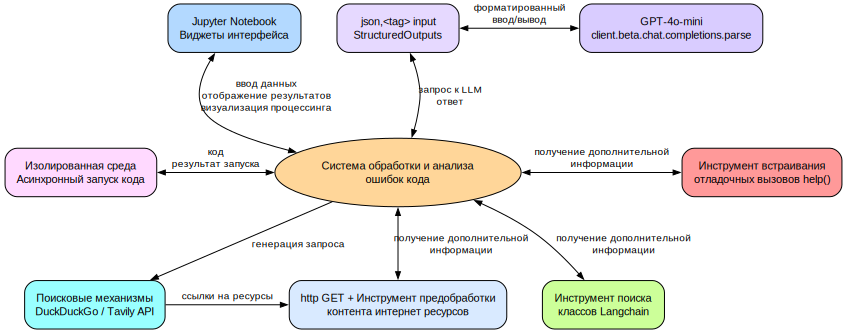

In [89]:
# pip install graphviz

import graphviz

def visualize_technical_implementation():
    # DOT-код диаграммы
    dot_code = """
digraph TechnicalImplementation {
        // Настройки графа для более чистого отображения
        rankdir = TB;
        nodesep = 0.5;
        ranksep = 0.7;
        fontname = "Arial";
        fontsize = 12;
        
        // Базовые стили для узлов и рёбер
        node [
            shape = box,
            style = "filled,rounded",
            fontname = "Arial",
            fontsize = 11,
            height = 0.5,
            width = 1.7,
            fillcolor = white,
            margin = 0.15
        ];
        
        edge [
            fontname = "Arial",
            fontsize = 10,
            arrowsize = 0.7,
        ];
        
        // Основные технологические компоненты
        UI [label = "Jupyter Notebook\\nВиджеты интерфейса", fillcolor = "#B3D9FF"];
        
        LLM [label = "GPT-4o-mini\\nclient.beta.chat.completions.parse", fillcolor = "#D9CCFF", width = 2.5];
        
        StructuredIO [label = "json,<tag> input\\nStructuredOutputs", fillcolor = "#E6D9FF"];
        
        IsolatedEnv [label = "Изолированная среда\\nАсинхронный запуск кода", fillcolor = "#FFD9FF"];
        
        // Инструменты поиска и анализа
        SearchTools [label = "Поисковые механизмы\\nDuckDuckGo / Tavily API", fillcolor = "#99FFFF"];
        
        
        bfInternet [label = "http GET + Инструмент предобработки\\nконтента интернет ресурсов", fillcolor = "#D9EAFF"];
        // Дополнительные инструменты
        LangchainScanner [label = "Инструмент поиска\\nклассов Langchain", fillcolor = "#CCFF99"];
        
        DebugTools [label = "Инструмент встраивания\\nотладочных вызовов help()", fillcolor = "#FF9999"];
        
        // Основной узел - система обработки
        ProcessingSystem [label = "Система обработки и анализа\\nошибок кода", fillcolor = "#FFD699", shape = "ellipse"];
        
        // Связи потока отладки
        IsolatedEnv -> ProcessingSystem [dir = both,label = "код\\nрезультат запуска"];
        
        // Вспомогательные инструменты
        ProcessingSystem -> DebugTools [dir = both, label = "получение дополнительной\\n информации"];

        ProcessingSystem -> SearchTools [ label = "генерация запроса"];
        SearchTools -> bfInternet [label = "ссылки на ресурсы"];
        bfInternet -> ProcessingSystem [ dir = both,label = "получение дополнительной\\n информации"];

        ProcessingSystem -> LangchainScanner [dir = both, label = "получение дополнительной\\n информации"];
        
        // Связи с LLM
        StructuredIO -> LLM [dir = both, label = "форматированный\\nввод/вывод"];
        ProcessingSystem -> StructuredIO [dir = both, label = "запрос к LLM\\nответ"];
        
        // Выход результатов
        ProcessingSystem -> UI [dir = both,label = "ввод данных\\nотображение результатов\\nвизуализация процессинга"];
        
        
        // Группировка компонентов
        {rank = same; UI;LLM; StructuredIO;}
        {rank = same;  IsolatedEnv;ProcessingSystem;DebugTools;}
        {rank = same;  bfInternet;SearchTools;LangchainScanner;}
        
        // Невидимые связи для центрирования ProcessingSystem
        edge [style = invis];
        UI -> ProcessingSystem [weight = 2];
        LLM -> ProcessingSystem [weight = 3];
        StructuredIO -> ProcessingSystem [weight = 2];

        // Дополнительные информационные потоки
        edge [style = dashed, color = "#666666"];
        

        // Заголовок диаграммы
        labelloc = "t";
        //label = "Техническая реализация системы отладки кода с помощью ИИ";
        fontsize = 16;
    }  
    """
    
    # Создаем объект графа из DOT-кода
    graph = graphviz.Source(dot_code)
    
    # Рендерим граф в различных форматах
    graph.render('tech_implementation', format='png', cleanup=True)
    graph.render('tech_implementation', format='pdf', cleanup=True)
    graph.render('tech_implementation', format='svg', cleanup=True)
    
    # Сохраняем исходный DOT-файл
    with open('tech_implementation.dot', 'w') as f:
        f.write(dot_code)
    
    print("Диаграмма технической реализации создана и сохранена в следующих форматах:")
    print("- tech_implementation.png (для веб и документации)")
    print("- tech_implementation.pdf (для презентаций)")
    print("- tech_implementation.svg (для веб и масштабируемых изображений)")
    print("- tech_implementation.dot (исходный DOT-файл)")
    
    return graph

# Вызываем функцию для создания и визуализации диаграммы
if __name__ == "__main__":
    graph = visualize_technical_implementation()
    # Для отображения в Jupyter Notebook, раскомментируйте:
    display(graph)

Упрощенная диаграмма создана и сохранена в следующих форматах:
- neuro_consultant_simplified.png (для веб и документации)
- neuro_consultant_simplified.pdf (для презентаций)
- neuro_consultant_simplified.dot (исходный DOT-файл)


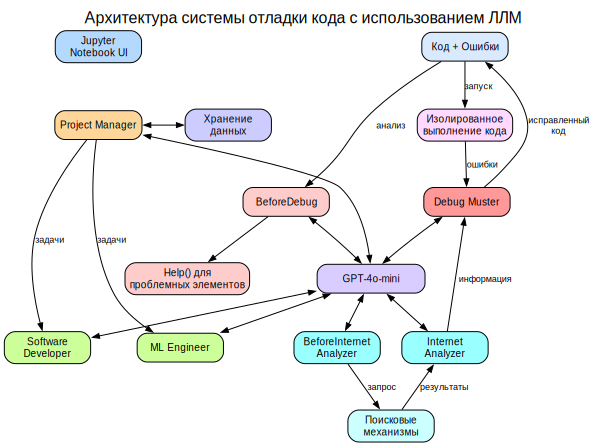

In [81]:
# pip install graphviz

import graphviz

def visualize_simplified_architecture():
    # Создаем объект графа из DOT-кода (копия кода из другого артефакта)
    dot_code = """
    digraph NeuroConsultantArchitecture {
        // Настройки графа для более компактного отображения
        rankdir = TB;
        nodesep = 0.3;
        ranksep = 0.5;
        fontname = "Helvetica";
        fontsize = 12;
        
        // Базовые стили для узлов и рёбер
        node [
            shape = rectangle,
            style = "filled,rounded",
            fontname = "Helvetica",
            fontsize = 10,
            height = 0.4,
            width = 1.2,
            fillcolor = white
        ];
        
        edge [
            fontname = "Helvetica",
            fontsize = 9,
            arrowsize = 0.7
        ];
        
        // Ключевые компоненты
        
        // Пользовательский интерфейс - упрощён
        UI [label = "Jupyter\\nNotebook UI", fillcolor = "#B3D9FF"];
        CodeInput [label = "Код + Ошибки", fillcolor = "#D9EAFF"];
        
        // Координация процесса
        Manager [label = "Project Manager", fillcolor = "#FFD699"];
        
        // Агентская система - только основные агенты
        Coder [label = "Software\\nDeveloper", fillcolor = "#CCFF99"];
        ML [label = "ML Engineer", fillcolor = "#CCFF99"];
        
        // Изолированная среда
        RunCode [label = "Изолированное\\nвыполнение кода", fillcolor = "#FFD9FF"];
        
        // Модуль отладки
        Debug [label = "Debug Muster", fillcolor = "#FF9999"];
        BeforeDebug [label = "BeforeDebug", fillcolor = "#FFCCCC"];
        HelpCode [label = "Help() для\\nпроблемных элементов", fillcolor = "#FFCCCC"];
        
        // Поиск информации
        BeforeInternet [label = "BeforeInternet\\nAnalyzer", fillcolor = "#99FFFF"];
        InternetAnalyzer [label = "Internet\\nAnalyzer", fillcolor = "#99FFFF"];
        SearchModule [label = "Поисковые\\nмеханизмы", fillcolor = "#CCFFFF"];
        
        // AI модель - максимально упрощена
        LLM [label = "GPT-4o-mini", fillcolor = "#D9CCFF", width = 1.5];
        
        // Хранение данных - упрощено до одного узла
        DataStorage [label = "Хранение\\nданных", fillcolor = "#CCCCFF"];
        
        // Ключевые связи между компонентами
        CodeInput -> RunCode [label = "запуск"];
        RunCode -> Debug [label = "ошибки"];
        CodeInput -> BeforeDebug [label = "анализ"];
        BeforeDebug -> HelpCode;
        
        BeforeInternet -> SearchModule [label = "запрос"];
        SearchModule -> InternetAnalyzer [label = "результаты"];
        InternetAnalyzer -> Debug [label = "информация"];
        
        // Связи с ЛЛМ - только ключевые
        LLM -> Manager [dir = both];
        LLM -> Debug [dir = both];
        LLM -> BeforeDebug [dir = both];
        LLM -> BeforeInternet [dir = both];
        LLM -> InternetAnalyzer [dir = both];
        LLM -> Coder [dir = both];
        LLM -> ML [dir = both];
        
        // Связи координации
        Manager -> Coder [label = "задачи"];
        Manager -> ML [label = "задачи"]; 
        Manager -> DataStorage [dir = both];
        Debug -> CodeInput [label = "исправленный\\nкод"];
        
        // Основной рабочий поток
        {rank = same; UI; CodeInput;}
        {rank = same; Manager; DataStorage;}
        {rank = same; Debug; BeforeDebug;}
        {rank = same; BeforeInternet; InternetAnalyzer;}
        
        // Аннотация потока обработки
        edge [color = "#FF6600", style = dashed, penwidth = 2];
        
        // Основной поток отладки
        CodeInput -> BeforeDebug -> LLM -> Debug -> CodeInput [style = invis];
        
        // Невидимые рёбра для улучшения компоновки
        UI -> Manager [style = invis];
        Manager -> BeforeDebug [style = invis];
        BeforeDebug -> BeforeInternet [style = invis];
        
        // Заголовок диаграммы
        labelloc = "t";
        label = "Архитектура системы отладки кода с использованием ЛЛМ";
        fontsize = 16;
    }
    """
    
    # Создаем объект графа из DOT-кода
    graph = graphviz.Source(dot_code)
    
    # Рендерим граф в формате PNG и PDF (для презентаций)
    graph.render('neuro_consultant_simplified', format='png', cleanup=True)
    graph.render('neuro_consultant_simplified', format='pdf', cleanup=True)
    
    # Сохраняем исходный DOT-файл
    with open('neuro_consultant_simplified.dot', 'w') as f:
        f.write(dot_code)
    
    print("Упрощенная диаграмма создана и сохранена в следующих форматах:")
    print("- neuro_consultant_simplified.png (для веб и документации)")
    print("- neuro_consultant_simplified.pdf (для презентаций)")
    print("- neuro_consultant_simplified.dot (исходный DOT-файл)")
    
    return graph

# Вызываем функцию для создания и визуализации диаграммы
if __name__ == "__main__":
    graph = visualize_simplified_architecture()
    # Для отображения в Jupyter Notebook, раскомментируйте:
    display(graph)

In [79]:
# pip install graphviz

import graphviz

def visualize_simplified_architecture():
    # Записываем определение упрощенного графа в строку
    dot_code = """
    digraph SimplifiedNeuroConsultantArchitecture {
        // Настройки графа
        rankdir = TB;  // Направление графа сверху вниз
        fontname = "Helvetica";
        fontsize = 12;
        margin = 0.2;
        
        // Стили узлов и рёбер
        node [
            shape = rectangle,
            style = "filled,rounded",
            fontname = "Helvetica",
            fontsize = 10,
            fillcolor = white,
            margin = "0.2,0.1"
        ];
        
        edge [
            fontname = "Helvetica",
            fontsize = 9,
            fontcolor = "#555555",
            arrowsize = 0.8
        ];
        
        // Основные компоненты системы
        
        // 1. Пользовательский интерфейс (упрощен)
        UI [label = "Jupyter Notebook\\nс интерактивными виджетами", fillcolor = "#B3D9FF"];
        
        // 2. Основные компоненты системы
        Manager [label = "Project Manager\\n(Координация процесса)", fillcolor = "#FFD699"];
        Debug [label = "Debug Muster\\n(Отладка кода)", fillcolor = "#FF9999"];
        SearchModule [label = "Поисковые механизмы\\n(DuckDuckGo/Tavily)", fillcolor = "#CCFFFF"];
        VEnvManager [label = "Изолированная среда\\nзапуска кода", fillcolor = "#FFCCFF"];
        CodeInput [label = "Ввод/вывод кода", fillcolor = "#D9EAFF"];
        ErrorInput [label = "Обработка ошибок", fillcolor = "#D9EAFF"];
        
        // 3. Ключевые агенты
        AgentBox [label = "Агентская система", shape = "box", style = "filled,rounded", fillcolor = "#E6FFCC"];
        
        // 4. ЛЛМ в центре
        LLM [label = "GPT-4o-mini\\n(Основная модель ИИ)", fillcolor = "#D9CCFF", shape = "ellipse"];
        
        // 5. Аналитические модули
        BeforeDebug [label = "BeforeDebug\\n(Генерация help-кода)", fillcolor = "#FFCCCC"];
        InternetAnalyzer [label = "Internet Analyzer\\n(Анализ результатов поиска)", fillcolor = "#99FFFF"];
        
        // 6. Хранение данных
        DataStorage [label = "Хранение данных\\n(Dataset, JSON FAQ, Plan)", fillcolor = "#CCCCFF"];
        
        // Базовые связи - минимальный набор для понимания архитектуры
        LLM -> Manager [dir = both, label = "  координация  "];
        LLM -> Debug [dir = both, label = "  анализ ошибок  "];
        LLM -> BeforeDebug [dir = both, label = "  help()  "];
        LLM -> InternetAnalyzer [dir = both, label = "  анализ результатов  "];
        LLM -> AgentBox [dir = both, label = "  профильные\\n  консультации  "];
        
        Manager -> AgentBox [label = "  запросы  "];
        
        // Цепочка отладки ошибок
        CodeInput -> VEnvManager [label = "  запуск  "];
        VEnvManager -> ErrorInput [label = "  ошибки  "];
        ErrorInput -> Debug [label = "  анализ  "];
        ErrorInput -> BeforeDebug [label = "  анализ  "];
        BeforeDebug -> VEnvManager [label = "  help()  "];
        
        // Цепочка поиска информации
        Debug -> SearchModule [dir = both, label = "  запрос  "];
        SearchModule -> InternetAnalyzer [label = "  результаты  "];
        
        // Вывод результатов
        Debug -> CodeInput [label = "  исправления  "];
        
        // Хранение информации
        Manager -> DataStorage [dir = both, label = "  хранение/\\n  извлечение  "];
        
        // Интерфейс
        UI -> CodeInput [style = dotted];
        UI -> ErrorInput [style = dotted];
    }
    """
    
    # Создаем объект графа из DOT-кода
    graph = graphviz.Source(dot_code)
    
    # Рендерим граф в формате PNG и сохраняем
    graph.render('simplified_architecture', format='png', cleanup=True)
    
    # Также можно сохранить в других форматах для презентации
    graph.render('simplified_architecture', format='svg', cleanup=True)
    graph.render('simplified_architecture', format='pdf', cleanup=True)
    
    print("Упрощенная диаграмма успешно создана и сохранена в нескольких форматах:")
    print("- simplified_architecture.png")
    print("- simplified_architecture.svg")
    print("- simplified_architecture.pdf")
    
    return graph

# Вызываем функцию для создания и визуализации диаграммы
if __name__ == "__main__":
    graph = visualize_simplified_architecture()
    # Для отображения диаграммы в Jupyter Notebook можно использовать
    # display(graph)

Упрощенная диаграмма успешно создана и сохранена в нескольких форматах:
- simplified_architecture.png
- simplified_architecture.svg
- simplified_architecture.pdf


In [78]:
# pip install graphviz

import graphviz

# Создаем DOT-диаграмму
def visualize_architecture():
    # Записываем определение графа в строку
    dot_code = """
    digraph NeuroConsultantArchitecture {
        // Настройки графа
        rankdir = TB;  // Направление графа сверху вниз
        fontname = "Helvetica";
        fontsize = 12;
        margin = 0.2;
        
        // Стили узлов и рёбер
        node [
            shape = rectangle,
            style = "filled,rounded",
            fontname = "Helvetica",
            fontsize = 10,
            fillcolor = white,
            margin = "0.2,0.1"
        ];
        
        edge [
            fontname = "Helvetica",
            fontsize = 9,
            fontcolor = "#555555",
            arrowsize = 0.8
        ];
        
        // Определение подграфов
        
        // Пользовательский интерфейс
        subgraph cluster_UI {
            label = "Пользовательский интерфейс";
            style = "filled,rounded";
            fillcolor = "#E8F5FF";
            fontsize = 14;
            
            UI [label = "Jupyter Notebook\\nс интерактивными виджетами", fillcolor = "#B3D9FF"];
            CodeInput [label = "Ввод кода", fillcolor = "#D9EAFF"];
            ErrorInput [label = "Ввод текста ошибки", fillcolor = "#D9EAFF"];
            UserQueryInput [label = "Ввод запроса пользователя", fillcolor = "#D9EAFF"];
            ResultDisplay [label = "Отображение результатов", fillcolor = "#D9EAFF"];
            QuestionVBox [label = "Виджет для вопросов\\nи ответов", fillcolor = "#D9EAFF"];
            SearchVBox [label = "Виджет для результатов\\nпоиска", fillcolor = "#D9EAFF"];
            
            UI -> CodeInput [style = dotted];
            UI -> ErrorInput [style = dotted];
            UI -> UserQueryInput [style = dotted];
            UI -> ResultDisplay [style = dotted];
            UI -> QuestionVBox [style = dotted];
            UI -> SearchVBox [style = dotted];
        }
        
        // Координация процесса
        subgraph cluster_Coordination {
            label = "Координация процесса";
            style = "filled,rounded";
            fillcolor = "#FFEBCC";
            fontsize = 14;
            
            Manager [label = "Project Manager", fillcolor = "#FFD699"];
            AgentCoord [label = "Распределение задач\\nмежду агентами", fillcolor = "#FFE6B3"];
            Plan [label = "План проекта", fillcolor = "#FFE6B3"];
            Tasks [label = "Задания для агентов", fillcolor = "#FFE6B3"];
            History [label = "История диалога", fillcolor = "#FFE6B3"];
            
            Manager -> AgentCoord [label = "координирует"];
            Manager -> Plan [label = "обновляет"];
            Manager -> Tasks [label = "создает"];
            Manager -> History [label = "суммаризирует"];
        }
        
        // Агентская система
        subgraph cluster_Agents {
            label = "Агентская система";
            style = "filled,rounded";
            fillcolor = "#E6FFCC";
            fontsize = 14;
            
            Coder [label = "Software Developer", fillcolor = "#CCFF99"];
            Analyst [label = "Business Analyst", fillcolor = "#CCFF99"];
            Expert [label = "Domain Expert", fillcolor = "#CCFF99"];
            DataEng [label = "Data Engineer", fillcolor = "#CCFF99"];
            ML [label = "ML Engineer", fillcolor = "#CCFF99"];
            QA [label = "QA Engineer", fillcolor = "#CCFF99"];
            DevOps [label = "DevOps Engineer", fillcolor = "#CCFF99"];
        }
        
        // Изолированная среда
        subgraph cluster_IsolatedEnv {
            label = "Изолированная среда";
            style = "filled,rounded";
            fillcolor = "#FFE6FF";
            fontsize = 14;
            
            VEnvManager [label = "Управление\\nвиртуальным окружением", fillcolor = "#FFCCFF"];
            CreateVEnv [label = "Создание venv", fillcolor = "#FFD9FF"];
            InstallLibs [label = "Установка библиотек", fillcolor = "#FFD9FF"];
            RunCode [label = "Асинхронный запуск кода", fillcolor = "#FFD9FF"];
            CaptureStreams [label = "Перехват stdout/stderr", fillcolor = "#FFD9FF"];
            
            VEnvManager -> CreateVEnv [style = dotted];
            VEnvManager -> InstallLibs [style = dotted];
            VEnvManager -> RunCode [style = dotted];
            VEnvManager -> CaptureStreams [style = dotted];
        }
        
        // Модуль отладки
        subgraph cluster_Debug {
            label = "Модуль отладки";
            style = "filled,rounded";
            fillcolor = "#FFCCCC";
            fontsize = 14;
            
            Debug [label = "Debug Muster", fillcolor = "#FF9999"];
            ErrorAnalysis [label = "Анализ ошибки", fillcolor = "#FFCCCC"];
            FixedCode [label = "Исправленный код", fillcolor = "#FFCCCC"];
            CodeChanges [label = "Изменения в коде", fillcolor = "#FFCCCC"];
            ExplanationToUser [label = "Пояснения для пользователя", fillcolor = "#FFCCCC"];
            
            BeforeDebug [label = "BeforeDebug", fillcolor = "#FFCCCC"];
            HelpCode [label = "Help() код для\\nпроблемного элемента", fillcolor = "#FFCCCC"];
            
            Debug -> ErrorAnalysis [style = dotted];
            Debug -> FixedCode [style = dotted];
            Debug -> CodeChanges [style = dotted];
            Debug -> ExplanationToUser [style = dotted];
            
            BeforeDebug -> HelpCode [label = "генерирует"];
        }
        
        // Поиск информации
        subgraph cluster_Search {
            label = "Поиск информации";
            style = "filled,rounded";
            fillcolor = "#E6FFFF";
            fontsize = 14;
            
            SearchModule [label = "Поисковые механизмы", fillcolor = "#CCFFFF"];
            DDG [label = "DuckDuckGo\\n(без ключа)", fillcolor = "#D9FFFF"];
            Tavily [label = "Tavily API", fillcolor = "#D9FFFF"];
            
            BeforeInternet [label = "BeforeInternetAnalizer", fillcolor = "#99FFFF"];
            InternetAnalyzer [label = "InternetAnalizer", fillcolor = "#99FFFF"];
            InternetRequest [label = "Поисковый запрос", fillcolor = "#D9FFFF"];
            SearchResults [label = "Обработка результатов\\nпоиска", fillcolor = "#D9FFFF"];
            
            SearchModule -> DDG [style = dotted];
            SearchModule -> Tavily [style = dotted];
            BeforeInternet -> InternetRequest [label = "формирует"];
            InternetAnalyzer -> SearchResults [label = "анализирует"];
        }
        
        // AI модели
        subgraph cluster_AI {
            label = "AI модели";
            style = "filled,rounded";
            fillcolor = "#F0E6FF";
            fontsize = 14;
            
            LLM [label = "GPT-4o-mini", fillcolor = "#D9CCFF"];
            CodeResponse [label = "Генерация кода", fillcolor = "#E6D9FF"];
            Queries [label = "Ответы на запросы", fillcolor = "#E6D9FF"];
            Errors [label = "Анализ ошибок", fillcolor = "#E6D9FF"];
            StructuredOutput [label = "Структурированные\\nвыводы", fillcolor = "#E6D9FF"];
            
            LLM -> CodeResponse [style = dotted];
            LLM -> Queries [style = dotted];
            LLM -> Errors [style = dotted];
            LLM -> StructuredOutput [style = dotted];
        }
        
        // Хранение данных
        subgraph cluster_Storage {
            label = "Хранение данных";
            style = "filled,rounded";
            fillcolor = "#E6E6FF";
            fontsize = 14;
            
            DataStorage [label = "Хранение данных", fillcolor = "#CCCCFF"];
            Dataset [label = "Question_dataset", fillcolor = "#D9D9FF"];
            FAQ [label = "JSON FAQ", fillcolor = "#D9D9FF"];
            PlanJson [label = "JSON Plan", fillcolor = "#D9D9FF"];
            NewQuestions [label = "JSON newquestions", fillcolor = "#D9D9FF"];
            
            DataStorage -> Dataset [style = dotted];
            DataStorage -> FAQ [style = dotted];
            DataStorage -> PlanJson [style = dotted];
            DataStorage -> NewQuestions [style = dotted];
        }
        
        // Связи между компонентами
        CodeInput -> RunCode [label = "запускает"];
        ErrorInput -> ErrorAnalysis [label = "передает для анализа"];
        UserQueryInput -> Queries [label = "передает запрос"];
        
        RunCode -> ErrorInput [label = "возвращает ошибки"];
        Debug -> FixedCode [label = "генерирует"];
        BeforeInternet -> InternetRequest [label = "формирует"];
        InternetRequest -> SearchModule [label = "передается в"];
        SearchModule -> SearchResults [label = "передает результаты"];
        SearchResults -> Debug [label = "используется для"];
        
        // Связи с ЛЛМ
        LLM -> Manager [dir = both, label = "обмен данными"];
        LLM -> Debug [dir = both, label = "обмен данными"];
        LLM -> BeforeDebug [dir = both, label = "обмен данными"];
        LLM -> BeforeInternet [dir = both, label = "обмен данными"];
        LLM -> InternetAnalyzer [dir = both, label = "обмен данными"];
        
        // Связи между координатором и агентами
        AgentCoord -> Coder [label = "назначает задачи"];
        AgentCoord -> Analyst [label = "назначает задачи"];
        AgentCoord -> Expert [label = "назначает задачи"];
        AgentCoord -> DataEng [label = "назначает задачи"];
        AgentCoord -> ML [label = "назначает задачи"];
        AgentCoord -> QA [label = "назначает задачи"];
        AgentCoord -> DevOps [label = "назначает задачи"];
        
        // Вывод результатов
        Manager -> ResultDisplay [label = "обновляет"];
        Debug -> ResultDisplay [label = "обновляет"];
        InternetAnalyzer -> SearchVBox [label = "обновляет"];
        FixedCode -> CodeInput [label = "обновляет"];
        
        // Вопросы от агентов
        AgentCoord -> QuestionVBox [label = "формирует вопросы"];
    }
    """
    
    # Создаем объект графа из DOT-кода
    graph = graphviz.Source(dot_code)
    
    # Рендерим граф в формате PNG и сохраняем
    graph.render('neuro_consultant_architecture', format='png', cleanup=True)
    
    # Также можно сохранить DOT-файл для дальнейшего использования
    with open('neuro_consultant_architecture.dot', 'w') as f:
        f.write(dot_code)
    
    print("Диаграмма успешно создана и сохранена как 'neuro_consultant_architecture.png'")
    print("DOT-файл сохранен как 'neuro_consultant_architecture.dot'")
    
    return graph

# Вызываем функцию для создания и визуализации диаграммы
if __name__ == "__main__":
    graph = visualize_architecture()
    # Для отображения диаграммы в Jupyter Notebook
    # display(graph)

Диаграмма успешно создана и сохранена как 'neuro_consultant_architecture.png'
DOT-файл сохранен как 'neuro_consultant_architecture.dot'


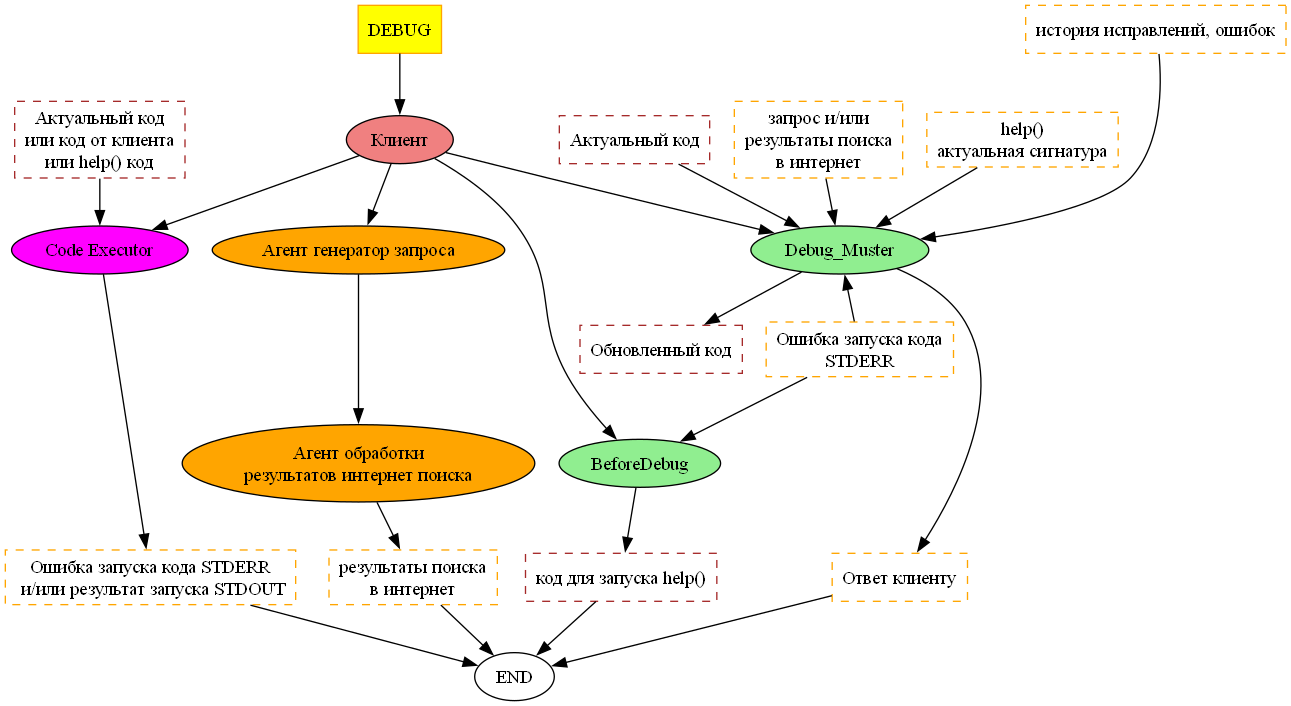

In [ ]:
import graphviz as gv
def visualize_with_graphviz(isstandard=True):
    dot = gv.Digraph(format='png')

    # Режимы
    if isstandard:
        dot.node("Standard", label="СТАНДАРТ", style="filled", shape="box", color="orange", fillcolor="yellow")
        # Агенты
        dot.node("Project_Manager", label="Project Manager", style="filled", fillcolor="lightblue")
        dot.node("Client1", label="Клиент", style="filled", fillcolor="lightcoral")
        dot.node("Coder", label="Агент Разработчик кода", style="filled", fillcolor="lightgreen")
        dot.node("Nocoder", label="Агент Не работает с кодом", style="filled", fillcolor="white")
        # входные данные и результаты
        dot.node("Request1", label="запрос", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("Questions", label="Вопросы по проекту", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("PlanD", label="План,\nИстория диалога", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("PDialog", label="Обновление плана и\n суммаризация диалога", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("Task", label="задание агенту,\nобновленный план", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("actualCode", label="Актуальный код", style="dashed", shape="box", color="brown", fillcolor="yellow")
        dot.node("Code", label="Обновленный код", style="dashed", shape="box", color="brown", fillcolor="yellow")
        dot.node("Response1", label="Ответ клиенту", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.edge("Standard", "Client1")

        dot.edge("Client1", "Request1")
        dot.edge("Request1", "Project_Manager")
        dot.edge("PlanD", "Project_Manager")
        dot.edge("Project_Manager","PDialog" )
        dot.edge("Project_Manager", "Task")
        dot.edge("Task", "Coder")
        dot.edge("Task", "Nocoder")
        dot.edge("Project_Manager", "Coder")
        dot.edge("Project_Manager", "Coder")
        dot.edge("Project_Manager", "Coder")
        dot.edge("Project_Manager", "Nocoder")
        dot.edge("Project_Manager", "Nocoder")
        dot.edge("Project_Manager", "Nocoder")
        dot.edge("actualCode", "Coder")
        dot.edge("Coder", "Response1")
        dot.edge("Coder", "Questions")
        dot.edge("Coder", "Code")
        dot.edge("Nocoder", "Response1")
        dot.edge("Nocoder", "Questions")
        dot.edge("Response1", "END")
        with dot.subgraph() as s:
            s.attr(rank='same')
            s.node('PDialog')
            s.node('Project_Manager')
    else:
        dot.node("Debug", label="DEBUG", style="filled", shape="box", color="orange", fillcolor="yellow")

        dot.node("actualCode", label="Актуальный код", style="dashed", shape="box", color="brown", fillcolor="yellow")
        dot.node("Client2", label="Клиент", style="filled", fillcolor="lightcoral")
        dot.node("Coderunner", label="Code Executor", style="filled", fillcolor="magenta")
        dot.node("BeforeInternet", label="Агент генератор запроса", style="filled", fillcolor="orange")
        dot.node("Internetanalizer", label="Агент обработки\nрезультатов интернет поиска", style="filled", fillcolor="orange")
        dot.node("BeforeDebug",  style="filled", fillcolor="lightgreen")
        dot.node("Debug_Muster",  style="filled", fillcolor="lightgreen")
        dot.node("Request2", label="запрос и/или\nрезультаты поиска\nв интернет", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("Error", label="Ошибка запуска кода\nSTDERR", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("actualCode2", label="Актуальный код\nили код от клиента\nили help() код", style="dashed", shape="box", color="brown")
        dot.node("Code", label="Обновленный код", style="dashed", shape="box", color="brown", fillcolor="yellow")
        dot.node("Response2", label="Ответ клиенту", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("helpcode", label="код для запуска help()", style="dashed", shape="box", color="brown", fillcolor="yellow")
        dot.node("help", label="help()\nактуальная сигнатура", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("history", label="история исправлений, ошибок", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("runresult", label="Ошибка запуска кода STDERR\n и/или результат запуска STDOUT", style="dashed", shape="box", color="orange", fillcolor="yellow")
        dot.node("internetresult", label="результаты поиска\nв интернет", style="dashed", shape="box", color="orange", fillcolor="yellow")

        with dot.subgraph() as s:
            s.attr(rank='min')
            s.node('history')
        with dot.subgraph() as s:
            s.attr(rank='same')
            s.node('helpcode')
            s.node('Response2')
            s.node('internetresult')
            s.node('runresult')
        with dot.subgraph() as s:
            s.attr(rank='same')
            s.node('Error')
            s.node('Code')
        # Добавляем рёбра между узлами
        # dot.edge("", "")
        dot.edge("Debug", "Client2")
        dot.edge("Client2", "BeforeInternet")
        dot.edge("BeforeInternet", "Internetanalizer")
        dot.edge("Internetanalizer", "internetresult")
        dot.edge("internetresult", "END")
        dot.edge("Client2", "Coderunner")
        dot.edge("actualCode2", "Coderunner")
        dot.edge("Coderunner", "runresult")
        dot.edge("runresult", "END")
        dot.edge("Client2", "BeforeDebug")
        dot.edge("Error", "BeforeDebug")
        dot.edge("Error", "Debug_Muster")
        dot.edge("BeforeDebug", "helpcode")
        dot.edge("helpcode", "END")
        dot.edge("help", "Debug_Muster")
        dot.edge("Client2", "Debug_Muster")
        dot.edge("Request2", "Debug_Muster")
        dot.edge("history", "Debug_Muster")
        dot.edge("actualCode", "Debug_Muster")
        dot.edge("Debug_Muster", "Response2")
        dot.edge("Debug_Muster", "Code")
        dot.edge("Response2", "END")



    # Отображаем граф
    graph_data = dot.pipe(format='png')
    display(Image(graph_data))

# Запуск визуализации
visualize_with_graphviz(False)

# диаграмма стандарт

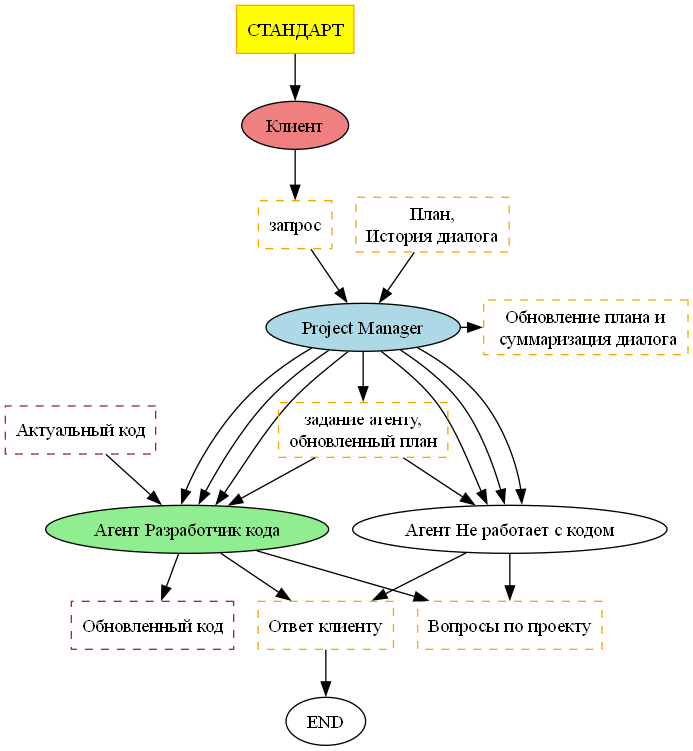

In [ ]:
visualize_with_graphviz()

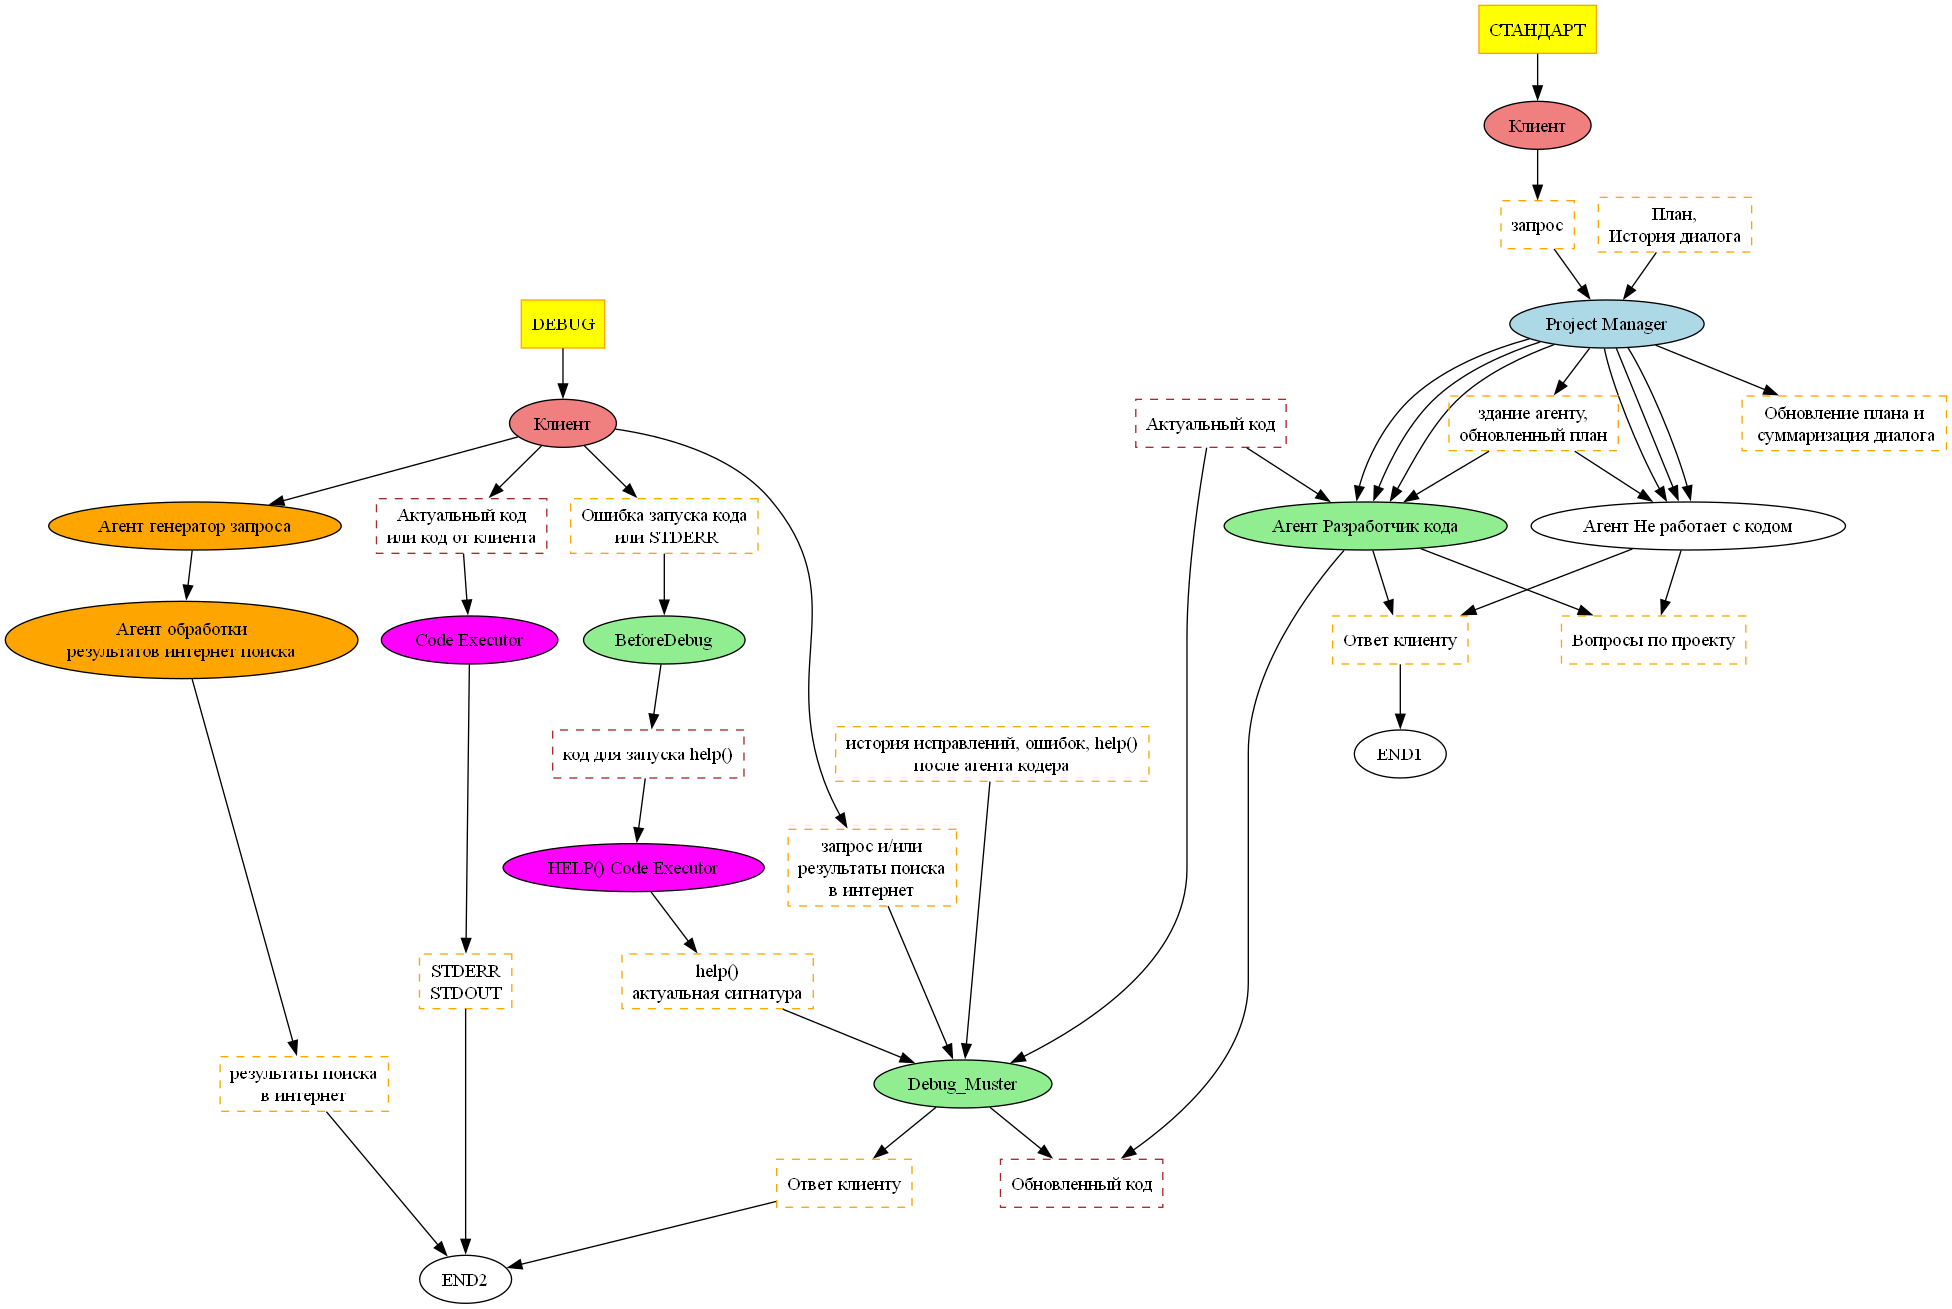

In [ ]:
def visualize_with_graphviz(isstandard=True):
    dot = gv.Digraph(format='png')

    # Режимы
    dot.node("Debug", label="DEBUG", style="filled", shape="box", color="orange", fillcolor="yellow")
    dot.node("Standard", label="СТАНДАРТ", style="filled", shape="box", color="orange", fillcolor="yellow")

    # Агенты
    dot.node("Project_Manager", label="Project Manager", style="filled", fillcolor="lightblue")
    dot.node("Client1", label="Клиент", style="filled", fillcolor="lightcoral")
    dot.node("Client2", label="Клиент", style="filled", fillcolor="lightcoral")
    dot.node("Coder", label="Агент Разработчик кода", style="filled", fillcolor="lightgreen")
    dot.node("Nocoder", label="Агент Не работает с кодом", style="filled", fillcolor="white")
    dot.node("Coderunner", label="Code Executor", style="filled", fillcolor="magenta")
    dot.node("Coderunner2", label="HELP() Code Executor", style="filled", fillcolor="magenta")
    dot.node("BeforeInternet", label="Агент генератор запроса", style="filled", fillcolor="orange")
    dot.node("Internetanalizer", label="Агент обработки\nрезультатов интернет поиска", style="filled", fillcolor="orange")

    dot.node("BeforeDebug",  style="filled", fillcolor="lightgreen")
    dot.node("Debug_Muster",  style="filled", fillcolor="lightgreen")

    # входные данные и результаты
    dot.node("Request1", label="запрос", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("Request2", label="запрос и/или\nрезультаты поиска\nв интернет", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("Error", label="Ошибка запуска кода\n или STDERR", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("actualCode", label="Актуальный код", style="dashed", shape="box", color="brown", fillcolor="yellow")
    dot.node("actualCode2", label="Актуальный код\nили код от клиента", style="dashed", shape="box", color="brown")
    dot.node("Code", label="Обновленный код", style="dashed", shape="box", color="brown", fillcolor="yellow")
    dot.node("Response1", label="Ответ клиенту", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("PlanD", label="План,\nИстория диалога", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("PDialog", label="Обновление плана и\n суммаризация диалога", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("Task", label="здание агенту,\nобновленный план", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("Response2", label="Ответ клиенту", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("Questions", label="Вопросы по проекту", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("helpcode", label="код для запуска help()", style="dashed", shape="box", color="brown", fillcolor="yellow")
    dot.node("help", label="help()\nактуальная сигнатура", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("history", label="история исправлений, ошибок, help()\nпосле агента кодера", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("runresult", label="STDERR\nSTDOUT", style="dashed", shape="box", color="orange", fillcolor="yellow")
    dot.node("internetresult", label="результаты поиска\nв интернет", style="dashed", shape="box", color="orange", fillcolor="yellow")

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('PDialog')
        s.node('Client2')
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('history')
        s.node('helpcode')
    # Добавляем рёбра между узлами
    # dot.edge("", "")
    dot.edge("Debug", "Client2")
    dot.edge("Client2", "BeforeInternet")
    dot.edge("BeforeInternet", "Internetanalizer")
    dot.edge("Internetanalizer", "internetresult")
    dot.edge("internetresult", "END2")
    # dot.edge("Client2", "internetresult")
    # dot.edge("internetresult", "Debug_Muster")
    # dot.edge("runresult", "Error")
    dot.edge("Client2", "Error")
    dot.edge("Client2", "actualCode2")
    dot.edge("actualCode2", "Coderunner")
    dot.edge("Coderunner", "runresult")
    dot.edge("runresult", "END2")
    dot.edge("Error", "BeforeDebug")
    dot.edge("BeforeDebug", "helpcode")
    dot.edge("helpcode", "Coderunner2")
    dot.edge("Coderunner2", "help")
    dot.edge("help", "Debug_Muster")
    dot.edge("Client2", "Request2")
    dot.edge("Request2", "Debug_Muster")
    dot.edge("history", "Debug_Muster")
    dot.edge("actualCode", "Debug_Muster")
    dot.edge("Debug_Muster", "Response2")
    dot.edge("Debug_Muster", "Code")
    dot.edge("Response2", "END2")

    dot.edge("Standard", "Client1")

    dot.edge("Client1", "Request1")
    dot.edge("Request1", "Project_Manager")
    dot.edge("PlanD", "Project_Manager")
    dot.edge("Project_Manager","PDialog" )
    dot.edge("Project_Manager", "Task")
    dot.edge("Task", "Coder")
    dot.edge("Task", "Nocoder")
    dot.edge("Project_Manager", "Coder")
    dot.edge("Project_Manager", "Coder")
    dot.edge("Project_Manager", "Coder")
    dot.edge("Project_Manager", "Nocoder")
    dot.edge("Project_Manager", "Nocoder")
    dot.edge("Project_Manager", "Nocoder")
    dot.edge("actualCode", "Coder")
    dot.edge("Coder", "Response1")
    dot.edge("Coder", "Questions")
    dot.edge("Coder", "Code")
    dot.edge("Nocoder", "Response1")
    dot.edge("Nocoder", "Questions")
    dot.edge("Response1", "END1")


    # Отображаем граф
    graph_data = dot.pipe(format='png')
    display(Image(graph_data))

# Запуск визуализации
visualize_with_graphviz()

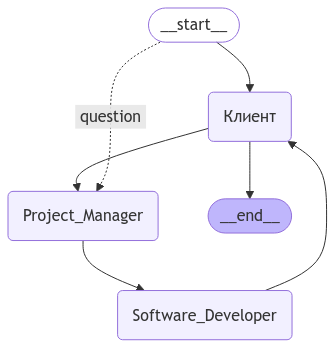

In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from typing import Annotated, List
from typing_extensions import TypedDict

# Определяем тип состояния
class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
        messages: list of messages
        baza: baza
    """

    question: str
    generation: str
    documents: List[str]
    messages: Annotated[list, add_messages]
    baza: str

# Определяем функции для каждого узла
def Project_Manager(state: GraphState):
    # Логика для узла "Project Manager"
    print("Handling Project Manager state")
    pass

def Software_Developer(state: GraphState):
    # Логика для узла "Software Developer"
    print("Handling Software Developer state")
    pass

def Cli_ent(state: GraphState):
    # Логика для узла "Клиент"
    print("Handling Client state")
    pass
def Cli_ent(state: GraphState):
    # Логика для узла "Клиент"
    print("Handling Client state")
    pass
def DEBUG(state: GraphState):
    pass
def BeforeDebug(state: GraphState):
    pass
def Debug_Muster(state: GraphState):
    pass

# Инициализация графа
workflow = StateGraph(GraphState)

# Функция маршрутизации вопросов
def route_question(state: GraphState):
    # Логика маршрутизации, например, на основе состояния вопроса
    question = state["question"]

    # Пример простого условия для маршрутизации
    if "Project Manager" in question:
        return "Project_Manager"
    elif "Developer" in question:
        return "Software_Developer"
    else:
        return "Клиент"

# Добавляем узлы в граф
workflow.add_node("Project_Manager", Project_Manager)
workflow.add_node("Software_Developer", Software_Developer)
workflow.add_node("Клиент", Cli_ent)
workflow.add_node("DEBUG", DEBUG)
workflow.add_node("BeforeDebug", BeforeDebug)
workflow.add_node("Debug_Muster", Debug_Muster)

# Строим граф с условными рёбрами
workflow.add_edge(START, "Клиент")  # Просто подключаем к "Клиенту", если не связано с Project_Manager
workflow.add_conditional_edges(
    Cli_ent,
    route_question,
    {
        "запрос": "Project_Manager",
        "запрос и/или ошибка\nРЕЖИМ ОТЛАДКИ": "DEBUG",
    },
)
workflow.add_edge("Клиент", "Project_Manager")
# Добавляем простые рёбра
workflow.add_edge("Project_Manager", "Software_Developer")
workflow.add_edge("Software_Developer", "Клиент")
workflow.add_edge("Клиент", END)

# Настройка памяти
memory = MemorySaver()

# Компиляция графа
app = workflow.compile(checkpointer=memory)
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [ ]:
%pip install pydantic==2.9.2
# %pip show openai
%pip show pydantic

In [ ]:
os.environ.get("OPENAI_API_KEY")

In [36]:
from pydantic import BaseModel, Field
os.environ["HTTP_PROXY"] = "http://127.0.0.1:2090"  # Порт Nekobox
os.environ["HTTPS_PROXY"] = "http://127.0.0.1:2090"


class Step(BaseModel):
    explanation: str= Field(...,
        description="Рассуждения на русском языке и решение"
    )
    output: str

class MathReasoning(BaseModel):
    steps: list[Step]
    final_answer: Optional[str]

completion = client.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful math tutor. Guide the user through the solution step by step."},
        {"role": "user", "content": "how can I solve 8x + 7 = -23"}
    ],
    response_format=MathReasoning,
)

math_reasoning = completion.choices[0].message.parsed
math_reasoning

MathReasoning(steps=[Step(explanation='Мы хотим найти значение x в уравнении 8x + 7 = -23. Начнем с того, чтобы изолировать 8x. Для этого вычтем 7 из обеих сторон уравнения.', output='8x + 7 - 7 = -23 - 7')], final_answer='8x = -30')

In [33]:
import os
import requests

os.environ["HTTP_PROXY"] = "http://127.0.0.1:2090"
os.environ["HTTPS_PROXY"] = "http://127.0.0.1:2090"

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
print(requests.get("https://api.ipify.org", headers=headers).text)

194.180.188.248
